La idea de este play ground es explorar la información de algunos dataset de este link:https://exoplanetarchive.ipac.caltech.edu/bulk_data_download/?fbclid=IwAR1GDR1g9FTuhdx1K7oOGO0Vh0I3QFGDyTSwOF15rF0hLnZuznXaj86XEr0

para asi ver cuales sirve y cuales no. Tambien se explorara la aplicación de transformaciones para dejar las curvas de luz bonitas.

In [2]:
import numpy as np
#from astrobase import periodbase, checkplot
#from astrobase.hatsurveys import hatlc
from IPython.display import display, Image
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

# Funciones Genericas

In [3]:
import glob

def generate_path_list(path,extension):    
    fits_list = []
    for fits in glob.glob(path+'*.' + extension):
        fits_list.append(fits)
    print('Se encontraron %i %s'%(len(fits_list),extension))
    return fits_list

# SuperWasp

In [10]:
from astropy.io import ascii
path_list = generate_path_list('./SW_play_data_100_fits/Confirmed/','tbl')
dat = ascii.read(path_list[2])  
df = dat.to_pandas()
df.head()

Se encontraron 45 tbl


TMID     FLUX2  FLUX2_ERR  TAMFLUX2  TAMFLUX2_ERR             IMAGEID  \
0  73846493  63.05703   0.226659  65.21658      0.226659  225200605041657460   
1  87698420  71.71421   0.531362  72.51269      3.216098  225200610120039230   
2  87698458  67.96204   0.529877  67.03036      3.258072  225200610120040010   
3  87701929  71.74068   0.294483  72.67685      1.090011  225200610120137510   
4  87705407  74.38524   0.316353  74.15955      1.863968  225200610120235500   

    CCDX   CCDY  FLAG           HJD      MAG2  MAG2_ERR   TAMMAG2  TAMMAG2_ERR  
0  28317  18695    32  2.453860e+06  10.50067  0.003903  10.46410     0.003773  
1  28469  17317    32  2.454021e+06  10.36099  0.008045  10.34896     0.048155  
2  28468  17318    32  2.454021e+06  10.41933  0.008465  10.43432     0.052773  
3  28444  17467    32  2.454021e+06  10.36059  0.004457  10.34651     0.016284  
4  28425  17614    32  2.454021e+06  10.32128  0.004618  10.32458     0.027290

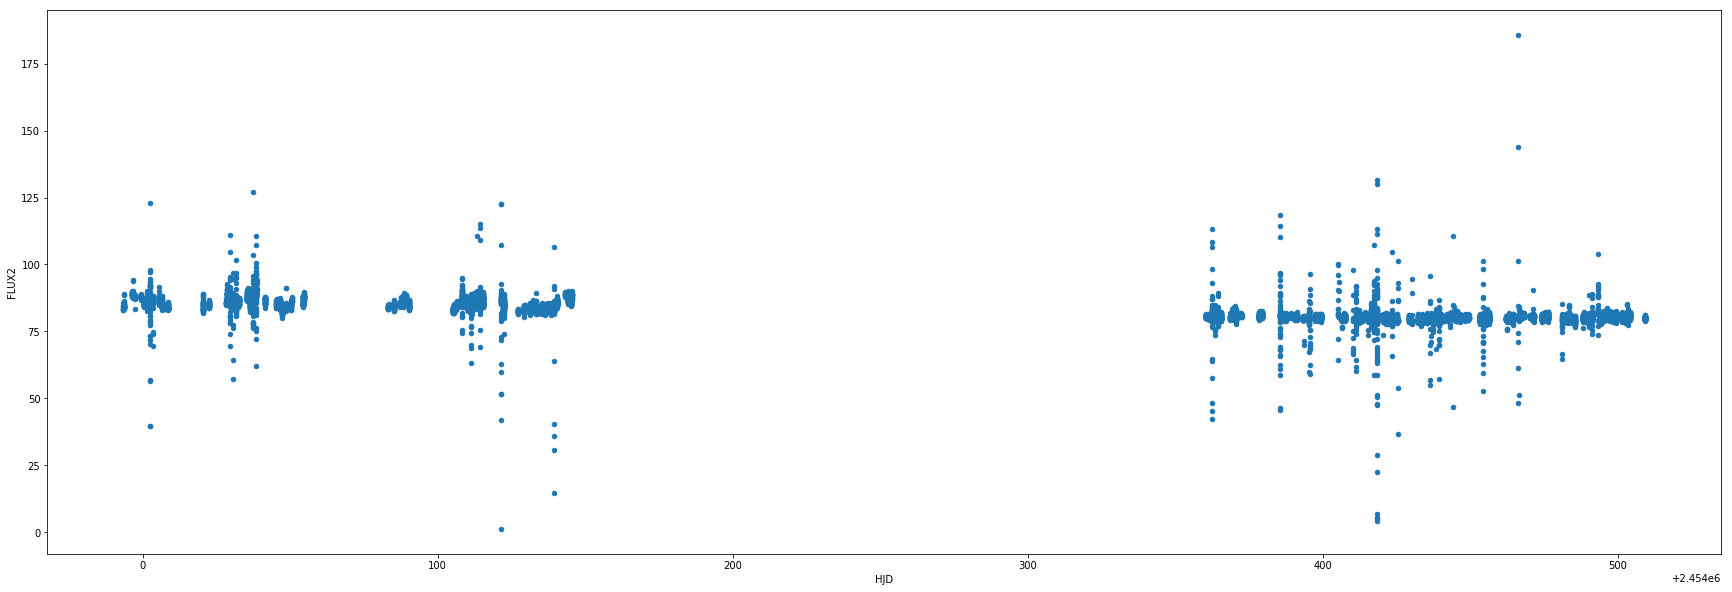

In [18]:
df.plot.scatter(x='HJD',y='FLUX2',figsize=(30,10))
plt.show()

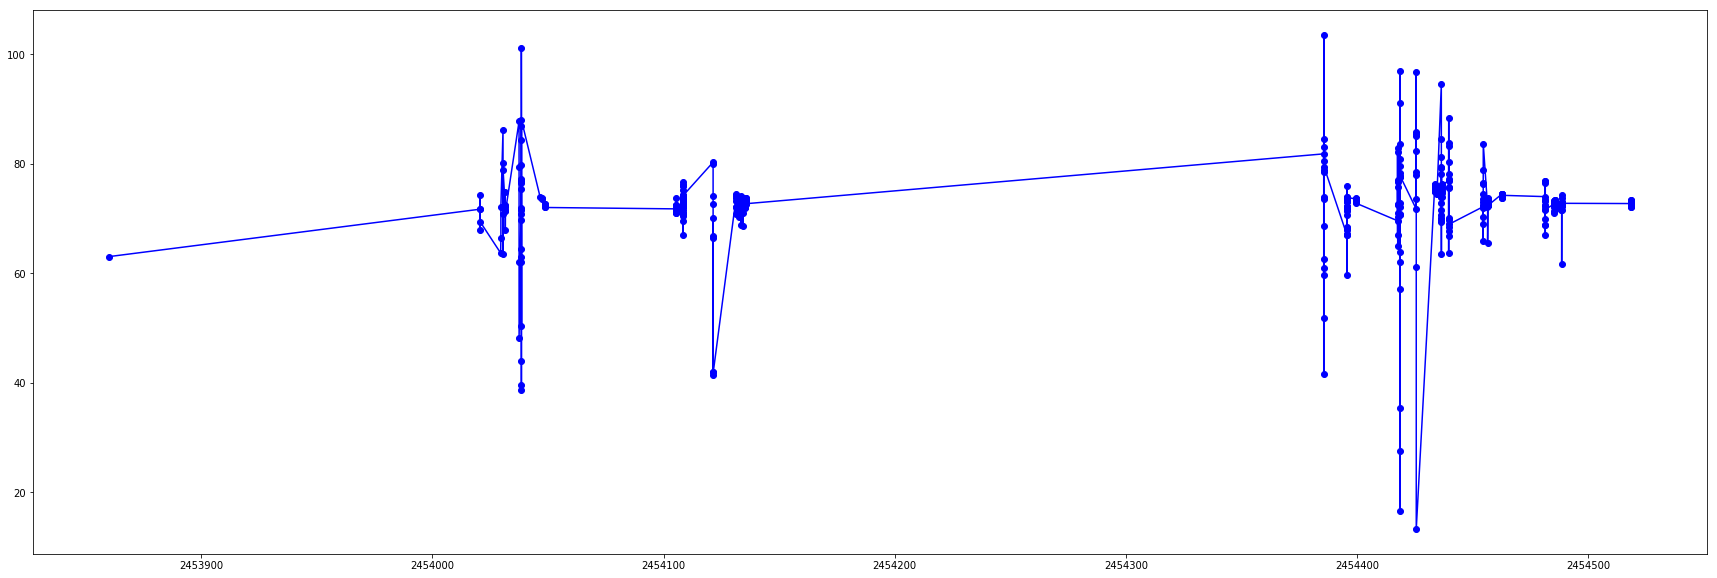

In [11]:
plt.figure(figsize=(30,10))
plt.plot(df['HJD'], df["FLUX2"],'bo-')
plt.show()

In [6]:
from astropy.time import TimeDelta
time = df["HJD"].values #barycentric??

sample_rate = [ TimeDelta(time[i+1] -time[i], format='jd', scale='tai') for i in range(time.shape[0]-1) if not np.isnan(time[i+1] -time[i]) ]
sample_rate = [value.sec/60 for value in sample_rate] #in minutes

print("Sample rate (in min): ", np.median(sample_rate))
sample_rate

Mean sample rate (in min):  3.667680099606514


[0.6336001306772232,
 10.716479793190956,
 0.6336001306772232,
 15.315839946269989,
 0.6336001306772232,
 8.916480168700218,
 0.6667200475931168,
 11.83391958475113,
 0.6321604549884796,
 9.63359959423542,
 0.6336001306772232,
 10.000800043344498,
 0.6321597844362259,
 9.184320196509361,
 0.6163199990987778,
 9.766079932451248,
 0.6336001306772232,
 11.867040172219276,
 0.6336001306772232,
 8.7494395673275,
 0.6336001306772232,
 7.250399887561798,
 0.6321604549884796,
 8.099999651312828,
 0.6336001306772232,
 27.516959980130196,
 0.6336001306772232,
 8.832959532737732,
 0.6336001306772232,
 8.11584010720253,
 0.6508802622556686,
 7.683839499950409,
 0.6163199990987778,
 5.81616036593914,
 0.6336001306772232,
 1261.8993600457907,
 0.6335994601249695,
 15.916320160031319,
 0.6508802622556686,
 11.35007992386818,
 0.6336001306772232,
 10.582559779286385,
 0.6508802622556686,
 9.29951973259449,
 0.5328000336885452,
 9.184320196509361,
 0.4996801167726517,
 9.44927953183651,
 0.633600130677

In [12]:
from astropy.time import Time
time = df["HJD"].values #barycentric??

print("Start measurment: ",Time(time[0], format='jd', scale='tai').iso)
print("End measurment: ",Time(time[-1], format='jd', scale='tai').iso)

Start measurment:  2006-05-04 16:54:52.992
End measurment:  2008-02-21 21:50:01.968


# Keppler

In [13]:
from astropy.io import ascii
path_list = generate_path_list('./KL_play_data_100_fits/confirmed/','tbl')
dat = ascii.read(path_list[0])  
df = dat.to_pandas()
df.head()

Se encontraron 45 tbl


TIME      TIME_BJD  TIMECORR  CADENCENO   SAP_FLUX  SAP_FLUX_ERR  \
0  906.845850  2.455740e+06  0.002418    39049.0  6221.1709      2.936647   
1  906.866285  2.455740e+06  0.002418    39050.0  6224.4214      2.938397   
2  906.886719  2.455740e+06  0.002419    39051.0  6222.7754      2.938230   
3  906.907153  2.455740e+06  0.002419    39052.0  6222.2651      2.936787   
4  906.927587  2.455740e+06  0.002420    39053.0  6227.6060      2.937384   

     SAP_BKG  SAP_BKG_ERR  PDCSAP_FLUX  PDCSAP_FLUX_ERR    ...      \
0  548.82263     0.200992          NaN              NaN    ...       
1  548.71643     0.200814    6488.0962         3.605785    ...       
2  548.51996     0.200986    6486.5137         3.608700    ...       
3  548.90167     0.200741    6486.0801         3.606802    ...       
4  548.56885     0.200889    6492.6372         3.608524    ...       

   PSF_CENTR1  PSF_CENTR1_ERR  PSF_CENTR2  PSF_CENTR2_ERR  MOM_CENTR1  \
0         NaN             NaN         NaN             NaN   664.15177   
1         NaN             NaN         NaN             NaN   664.15111   
2         NaN             NaN         NaN             NaN   664.15153   
3         NaN             NaN         NaN             NaN   664.15240   
4         NaN             NaN         NaN             NaN   664.15217   

   MOM_CENTR1_ERR  MOM_CENTR2  MOM_CENTR2_ERR  POS_CORR1  POS_CORR2  
0        0.000441   649.39538        0.000273   0.017886   0.081809  
1        0.000441   649.39565        0.000273   0.018179   0.081815  
2        0.000441   649.39528        0.000273   0.018553   0.081872  
3        0.000441   649.39636        0.000273   0.019068   0.082142  
4        0.000441   649.39617        0.000273   0.019221   0.082139  

[5 rows x 21 columns]

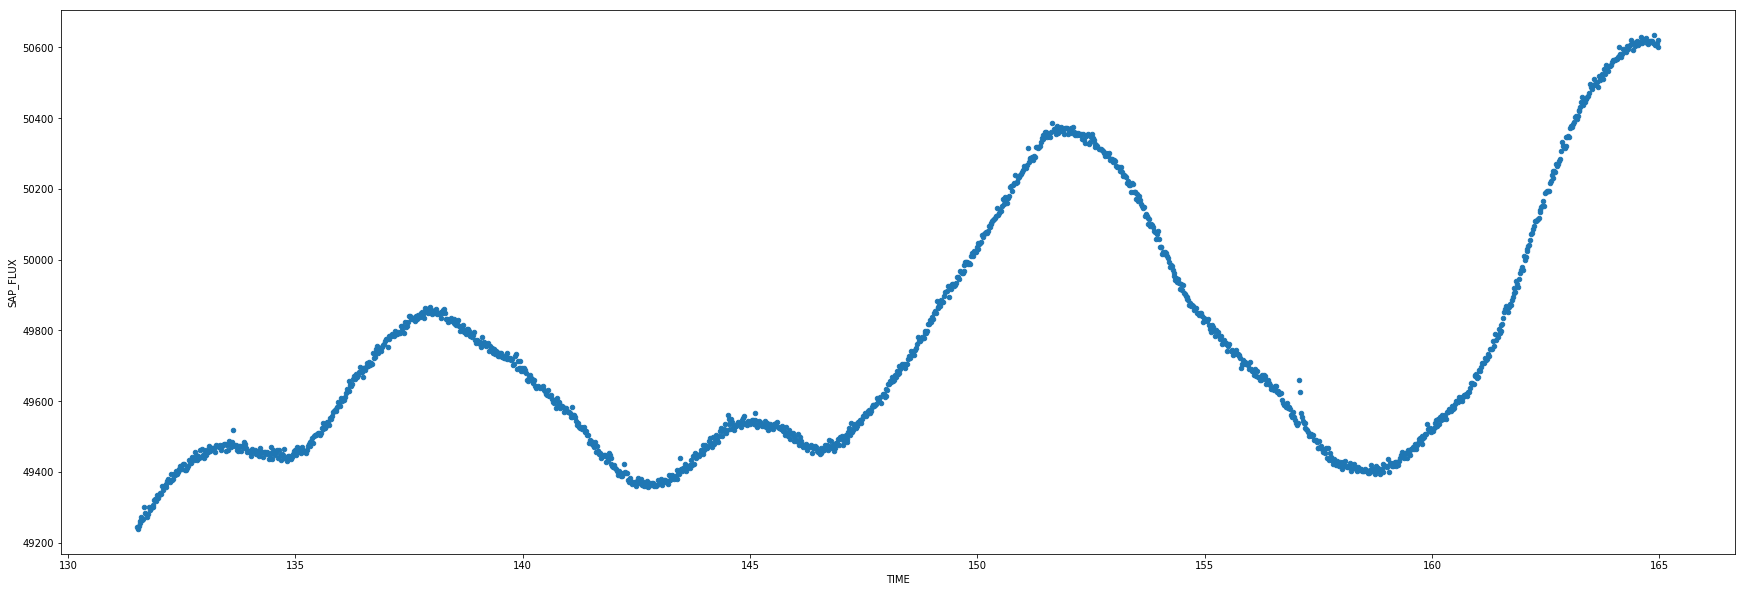

In [9]:
df.plot.scatter(x='TIME',y='SAP_FLUX',figsize=(30,10))
plt.show()

In [22]:
from astropy.time import TimeDelta
time = df["TIME_BJD"].values #barycentric??
#time = time - df["TIMECORR"].values

sample_rate = [ TimeDelta(time[i+1] -time[i], format='jd', scale='tai') for i in range(time.shape[0]-1) if not np.isnan(time[i+1] -time[i]) ]
sample_rate = [value.sec/60 for value in sample_rate] #in minutes

print("sample rate (in min): ", np.median(sample_rate))
sample_rate

Mean sample rate (in min):  29.42436593579736


[29.425247758626938,
 29.42510426044464,
 29.425247758626938,
 29.42496009171009,
 29.425103589892387,
 29.42524842917919,
 29.42496009171009,
 29.42496009171009,
 29.425247758626938,
 29.42496009171009,
 29.425103589892387,
 29.42524842917919,
 29.42496009171009,
 29.425103589892387,
 29.42524842917919,
 29.424959421157837,
 29.42510426044464,
 29.42510426044464,
 29.425103589892387,
 29.42524842917919,
 29.424959421157837,
 29.42510426044464,
 29.425247758626938,
 29.424816593527794,
 29.425103589892387,
 29.42524842917919,
 29.424959421157837,
 29.42524842917919,
 29.42496009171009,
 29.42496009171009,
 29.425247758626938,
 29.42496009171009,
 29.425103589892387,
 29.42524842917919,
 29.42496009171009,
 29.425103589892387,
 29.42510426044464,
 29.42496009171009,
 29.425247758626938,
 29.42510426044464,
 29.425103589892387,
 29.42510426044464,
 29.42496009171009,
 29.425103589892387,
 29.42510426044464,
 29.42510426044464,
 29.425103589892387,
 29.42510426044464,
 29.42496009171009,


In [26]:
sample_rate = [ TimeDelta(time[i+1] -time[i], format='jd', scale='tai').value for i in range(time.shape[0]-1) if not np.isnan(time[i+1] -time[i]) ]
np.mean(sample_rate)

0.020433587455414834

In [14]:
from astropy.time import Time
time = df["TIME_BJD"].values #barycentric??

print("Start measurment: ",Time(time[0], format='jd', scale='tai').iso)
print("End measurment: ",Time(time[-1], format='jd', scale='tai').iso)

Start measurment:  2011-06-27 08:18:01.475
End measurment:  2011-09-28 18:26:13.551


# KELT

In [16]:
path_list = generate_path_list('./KELT/','tbl')
dat = ascii.read(path_list[1])  
df = dat.to_pandas()
df.head()

Se encontraron 91 tbl


TIME       MAG  MAG_ERR
0  2.454035e+06  11.16915  0.00134
1  2.454035e+06  11.15807  0.00122
2  2.454035e+06  11.18003  0.00130
3  2.454035e+06  11.15035  0.00123
4  2.454035e+06  11.15413  0.00119

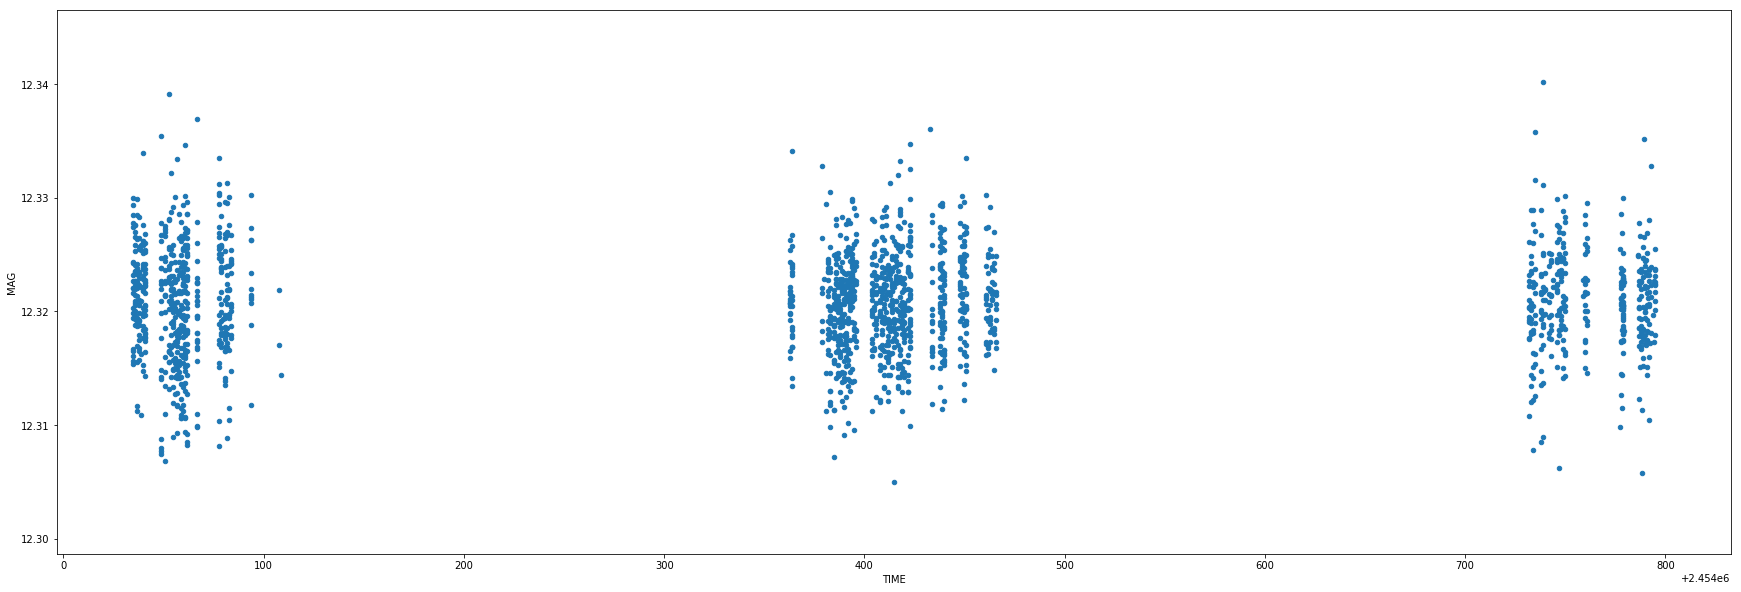

In [17]:
df.plot.scatter(x='TIME',y='MAG',figsize=(30,10))
plt.show()

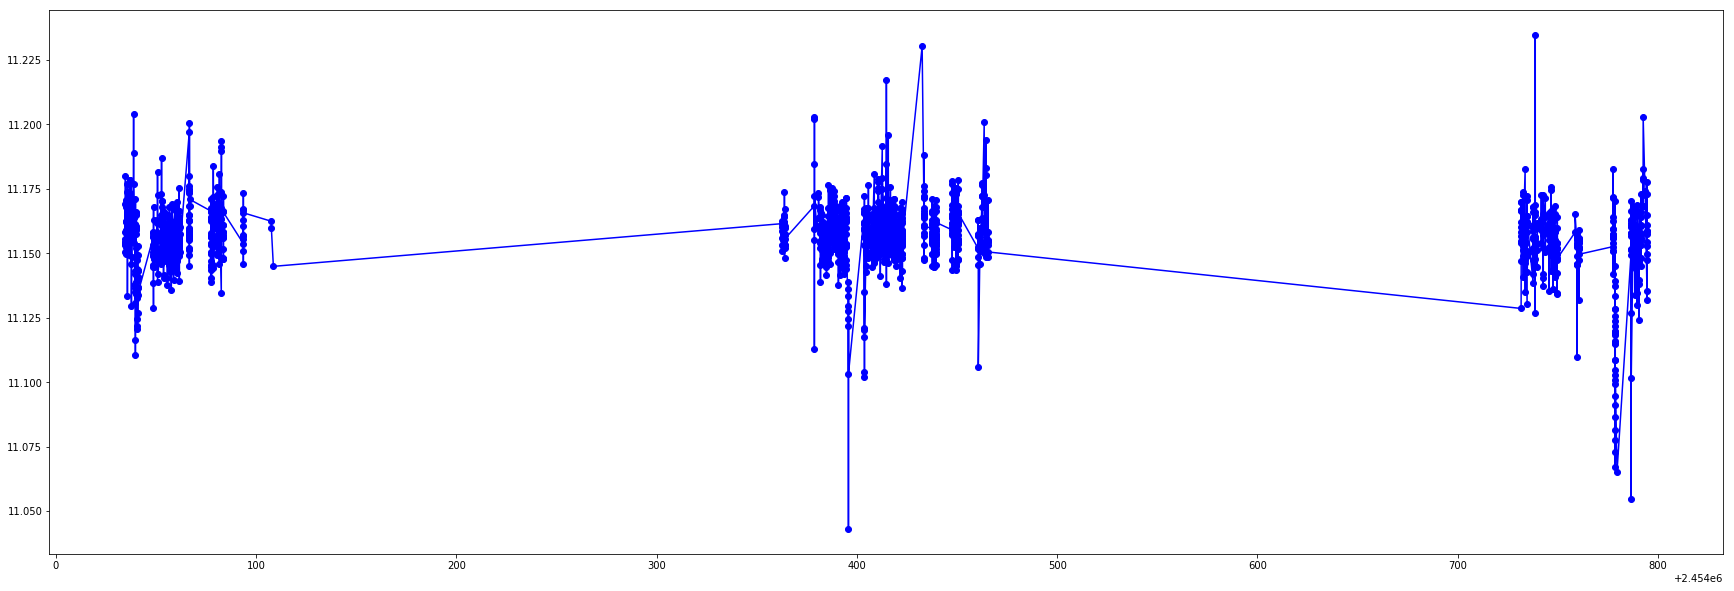

In [46]:
plt.figure(figsize=(30,10))
plt.plot(df['TIME'], df["MAG"],'bo-')
plt.show()

In [17]:
from astropy.time import TimeDelta
time = df["TIME"].values

sample_rate = [ TimeDelta(time[i+1] -time[i], format='jd', scale='tai') for i in range(time.shape[0]-1) if not np.isnan(time[i+1] -time[i]) ]
sample_rate = [value.sec/60 for value in sample_rate] #in minutes

print("sample rate (in min): ", np.median(sample_rate))
sample_rate

sample rate (in min):  6.773759946227074


[6.657120063900948,
 6.655680388212204,
 6.652799695730209,
 6.654240041971207,
 7.868160232901573,
 7.866719886660576,
 3.150719851255417,
 6.654240041971207,
 6.651360020041466,
 6.652799695730209,
 6.654240041971207,
 6.652800366282463,
 6.652799695730209,
 6.651360020041466,
 6.654240041971207,
 6.652800366282463,
 6.652799695730209,
 19.9526397138834,
 6.652800366282463,
 1292.2847997397184,
 6.652800366282463,
 6.65567971765995,
 6.652800366282463,
 6.65567971765995,
 6.652800366282463,
 7.863839864730835,
 3.150719851255417,
 6.654240041971207,
 6.65567971765995,
 6.657120063900948,
 6.655680388212204,
 6.652799695730209,
 6.652800366282463,
 6.654239371418953,
 6.655680388212204,
 6.652799695730209,
 6.652800366282463,
 6.652799695730209,
 6.654240041971207,
 6.654240041971207,
 6.655680388212204,
 6.652799695730209,
 1296.4780801534653,
 6.651360020041466,
 6.654240041971207,
 6.652799695730209,
 6.652800366282463,
 7.8681595623493195,
 7.865280210971832,
 3.150719851255417,
 

In [18]:
from astropy.time import Time
time = df["TIME"].values #barycentric??

print("Start measurment: ",Time(time[0], format='jd', scale='tai').iso)
print("End measurment: ",Time(time[-1], format='jd', scale='tai').iso)

Start measurment:  2006-10-26 04:44:09.312
End measurment:  2008-11-24 04:44:47.501


# PHOTOMETRIC

Se encontraron 92 tbl


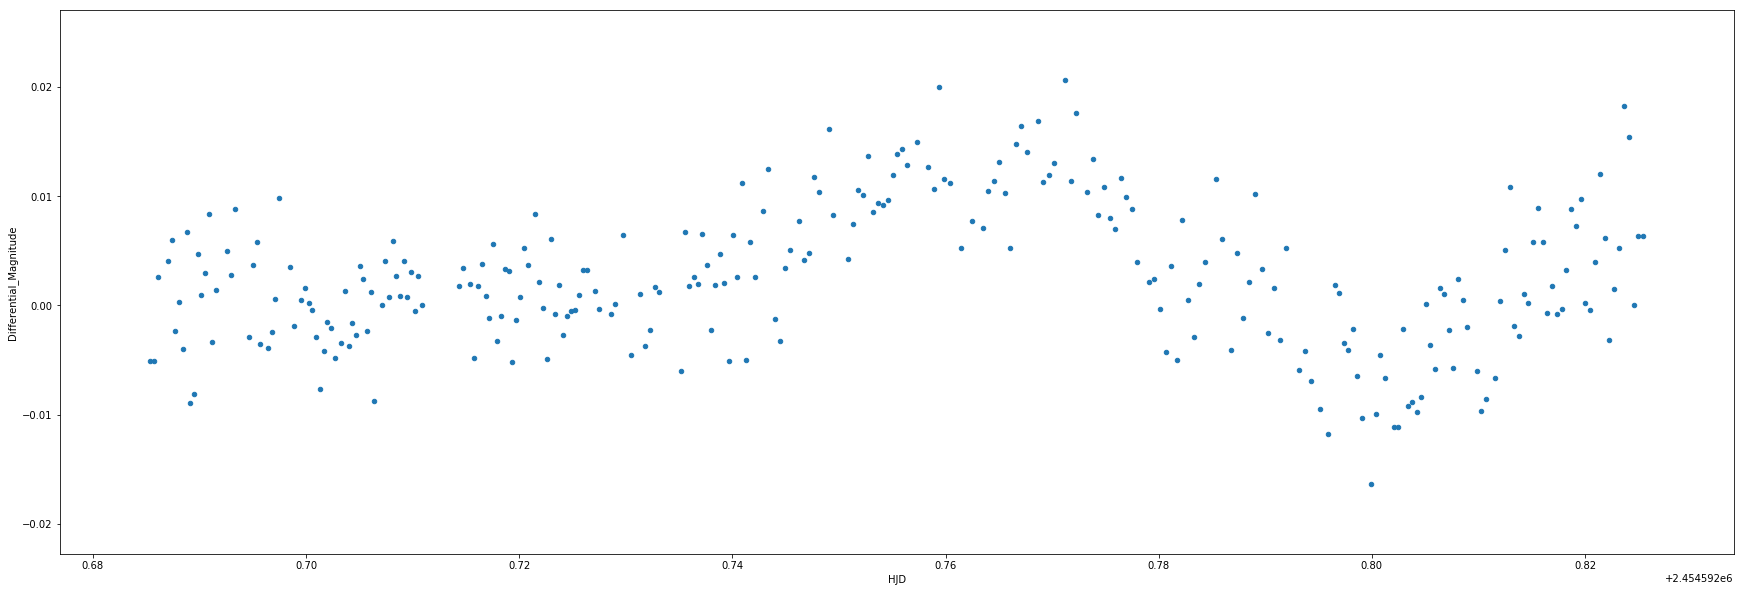

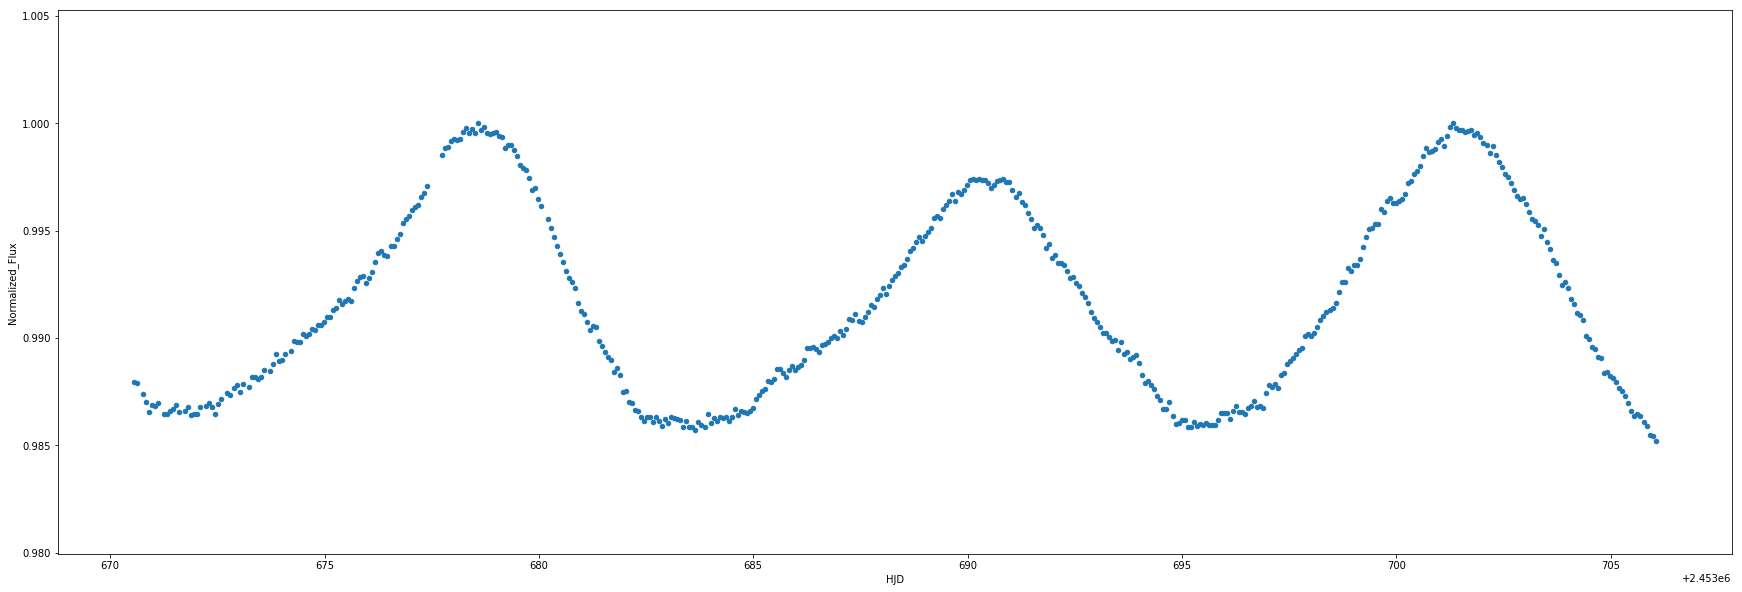

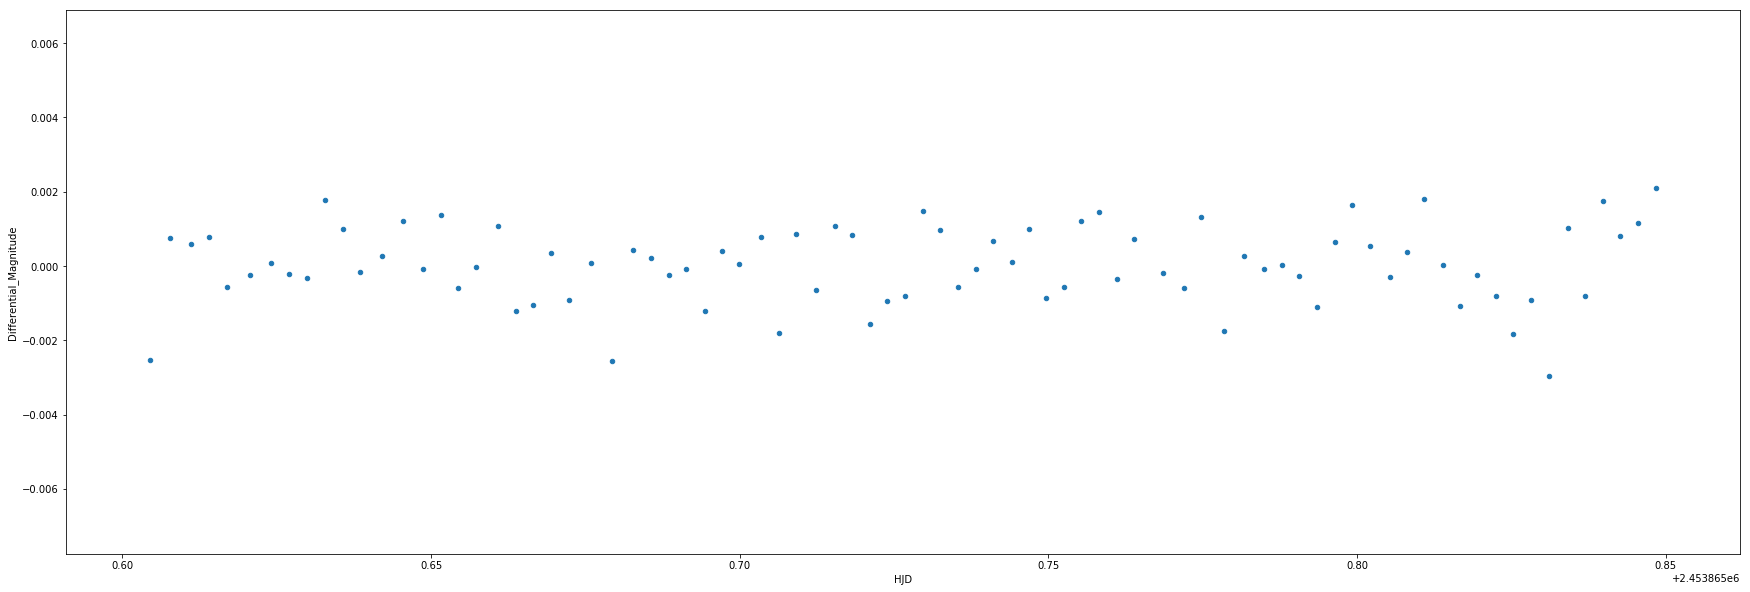

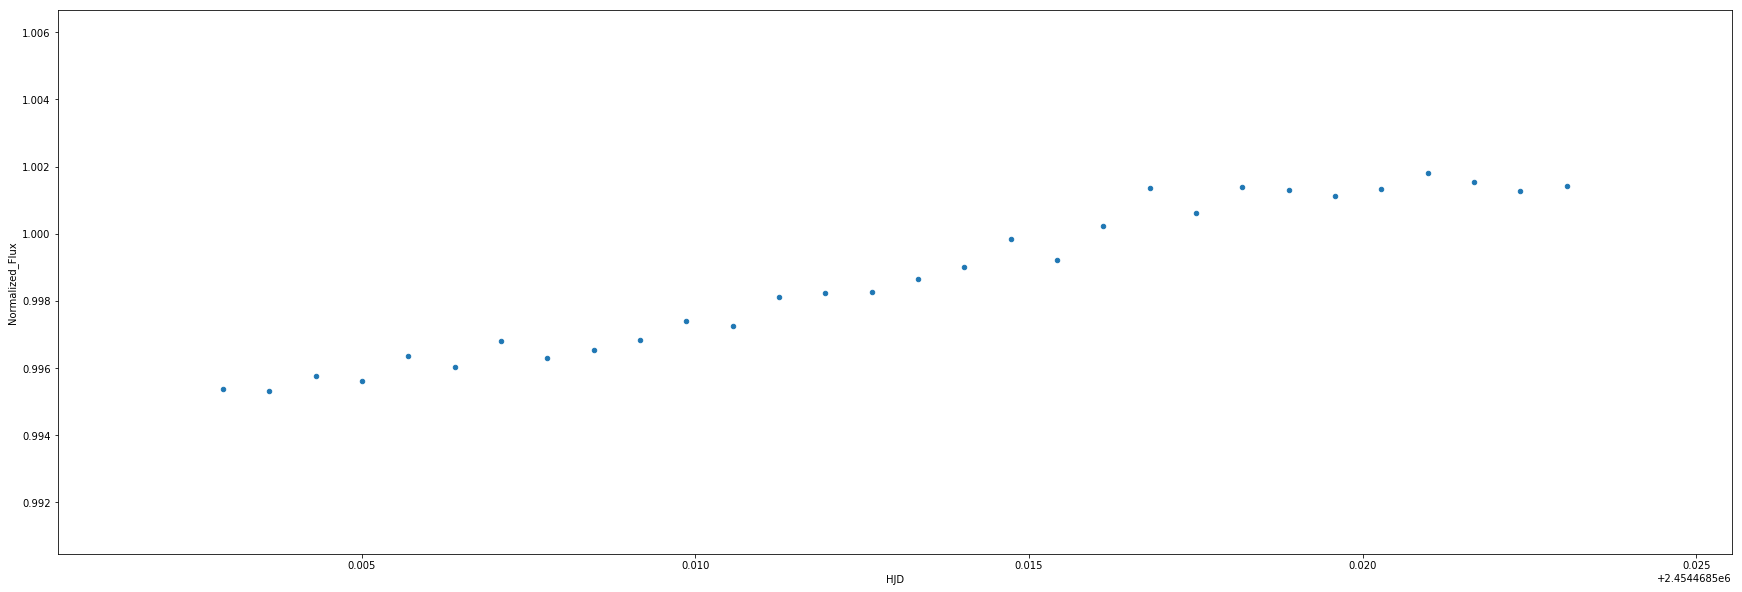

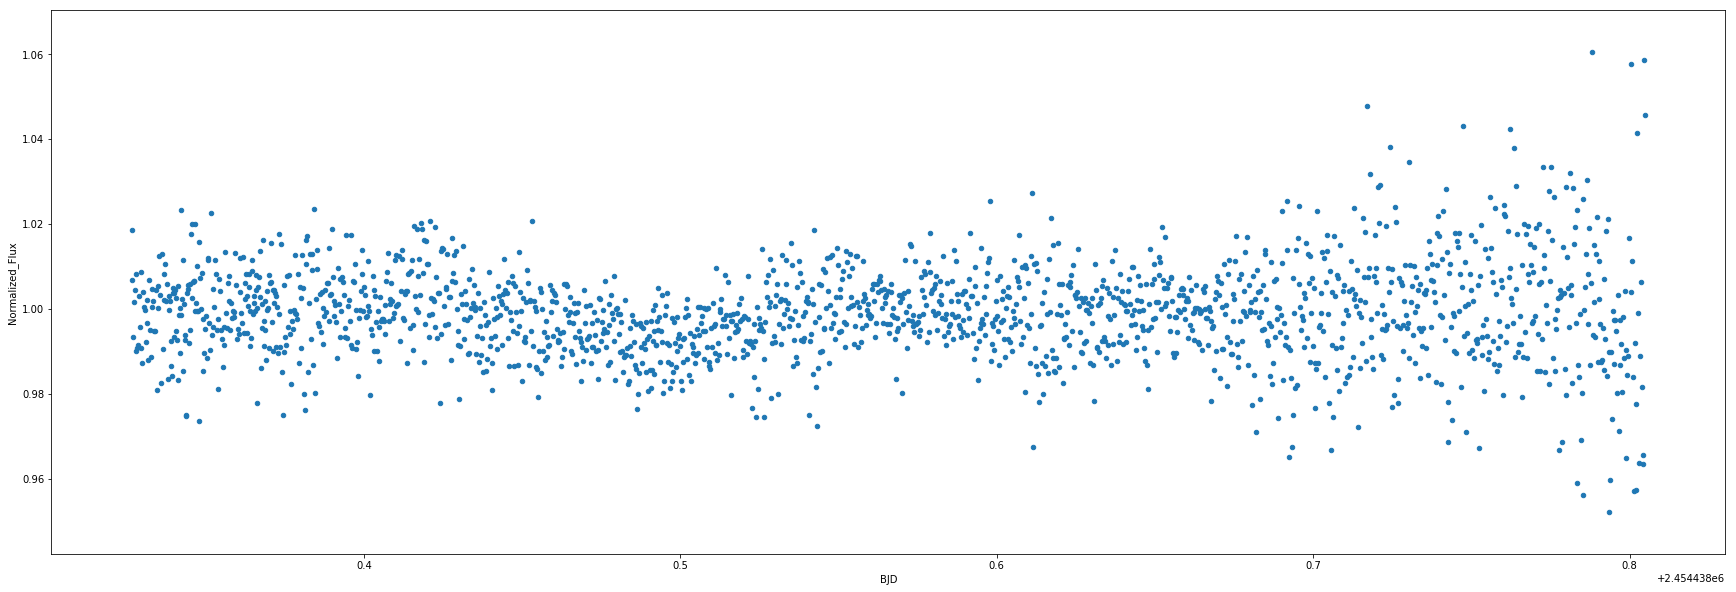

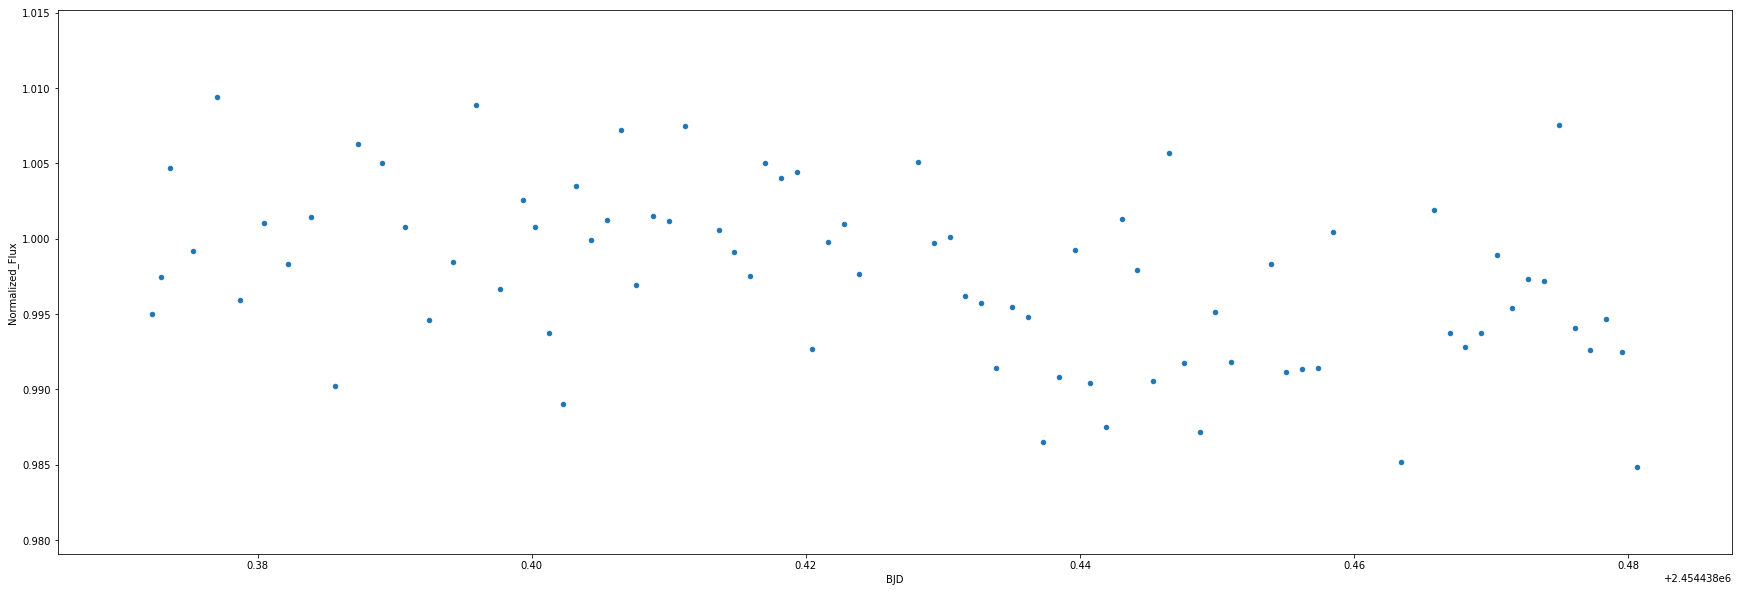

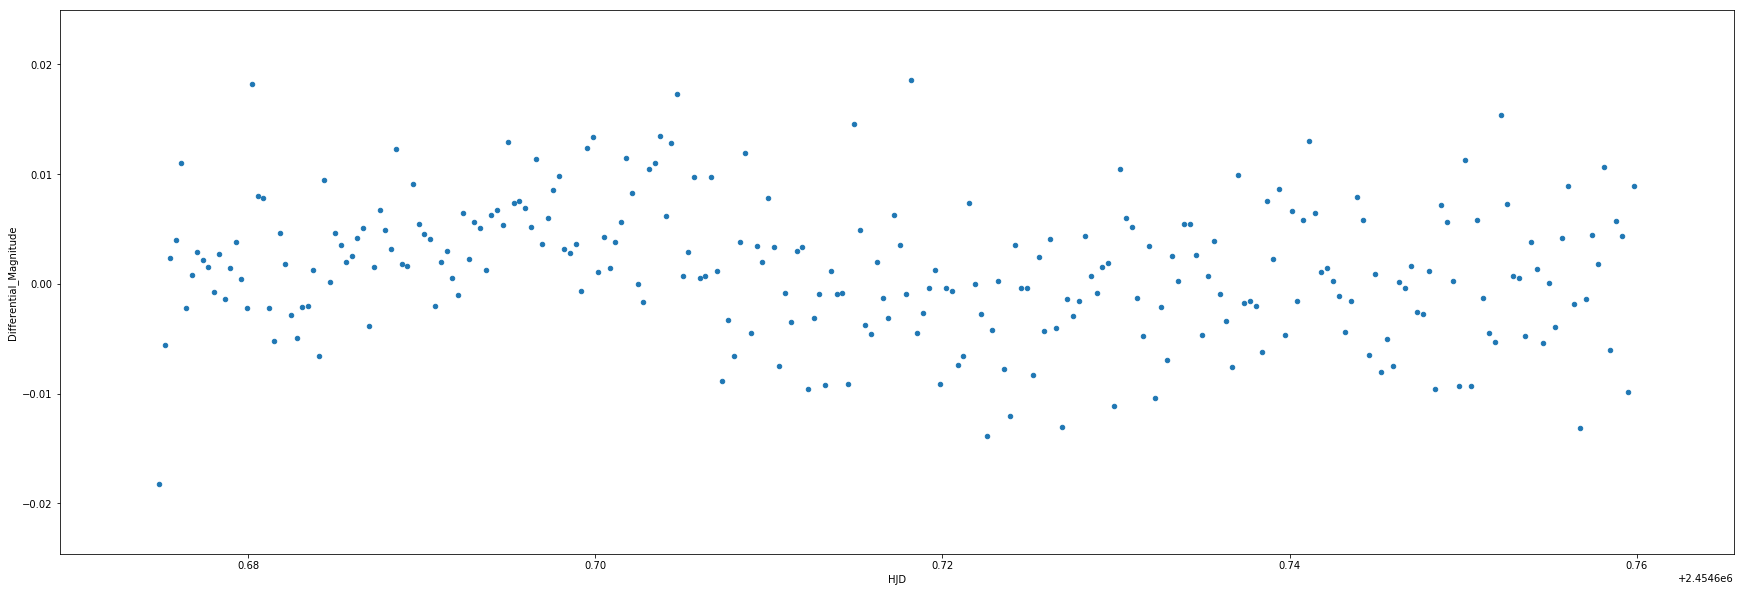

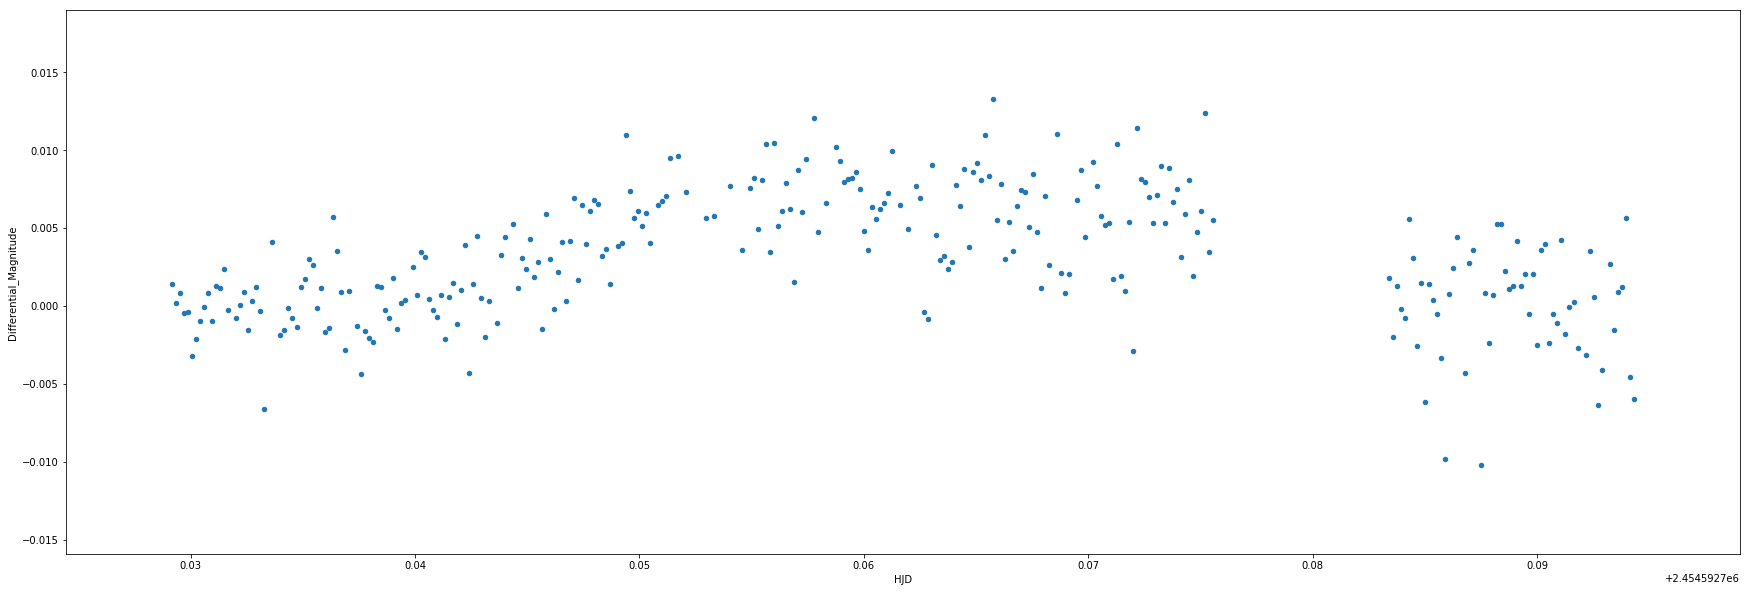

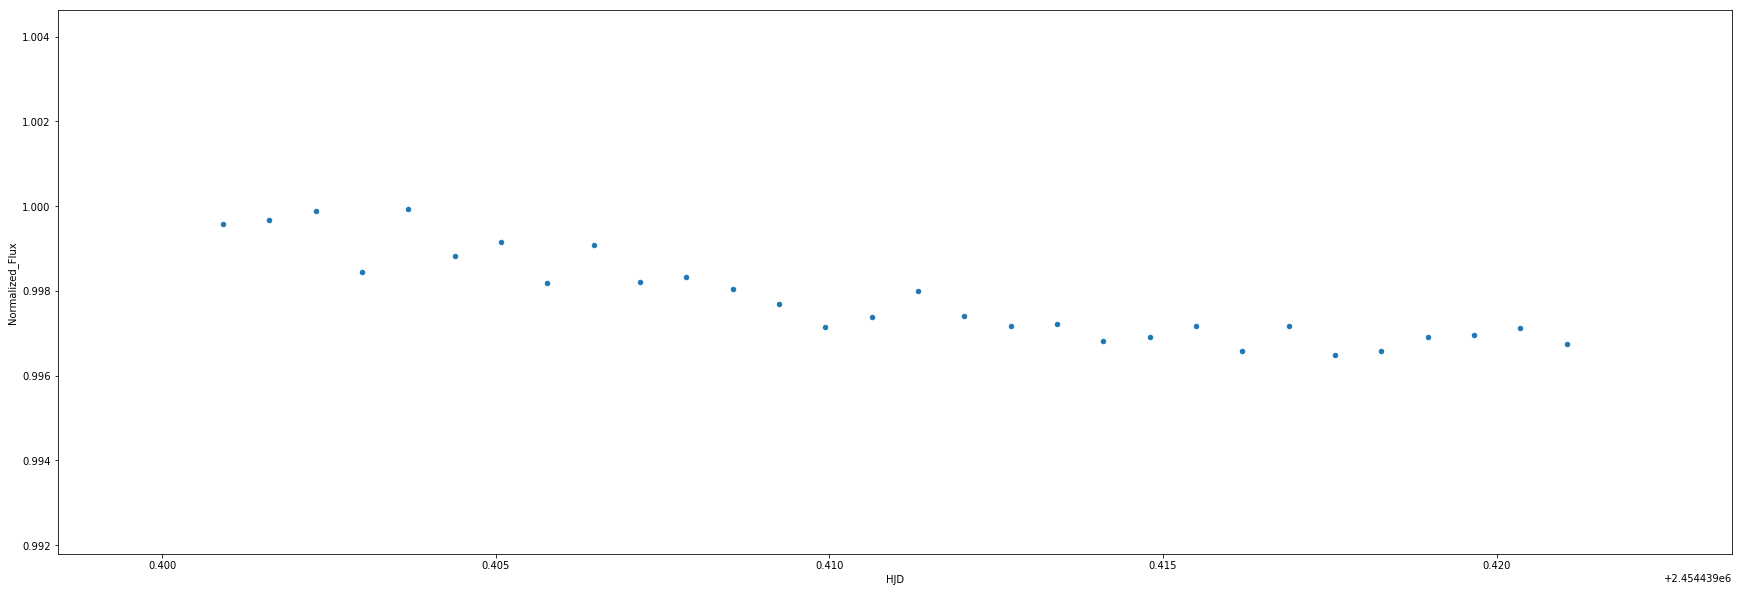

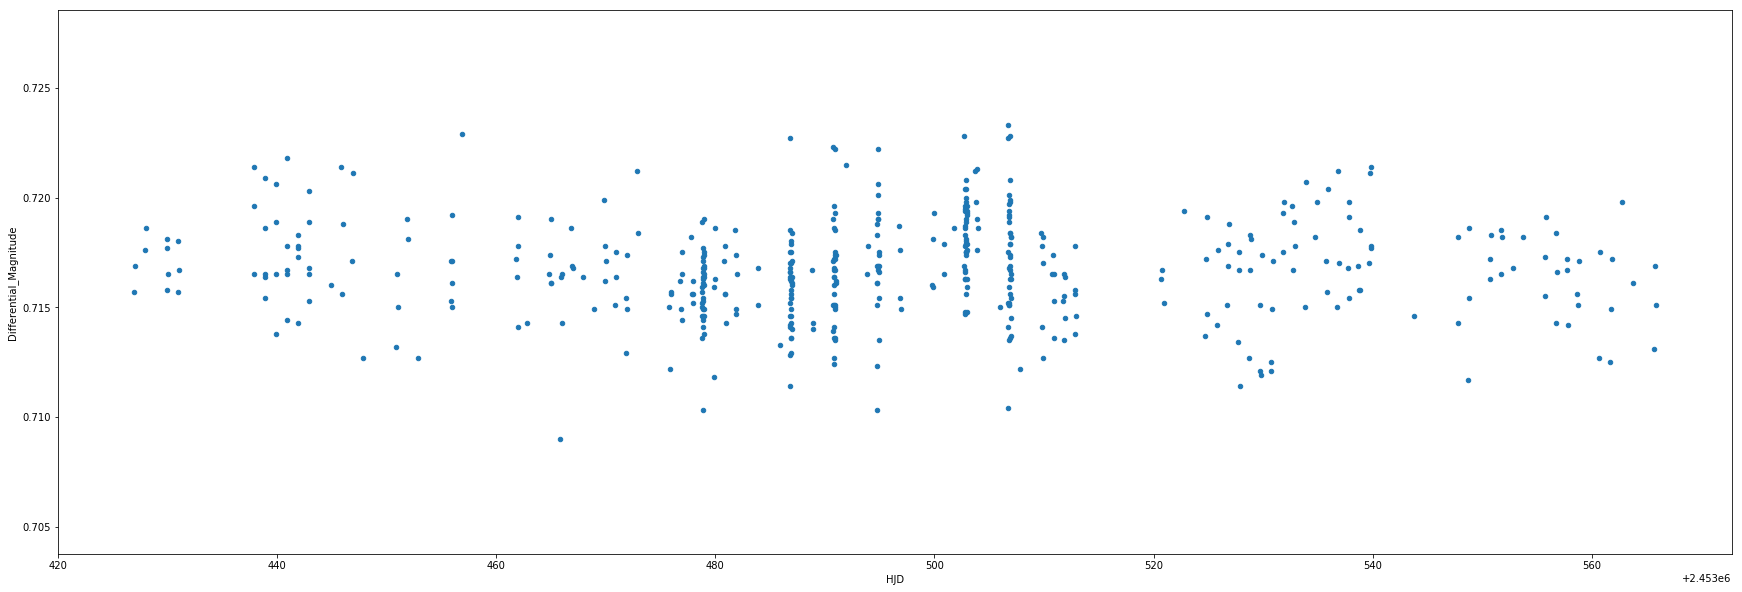

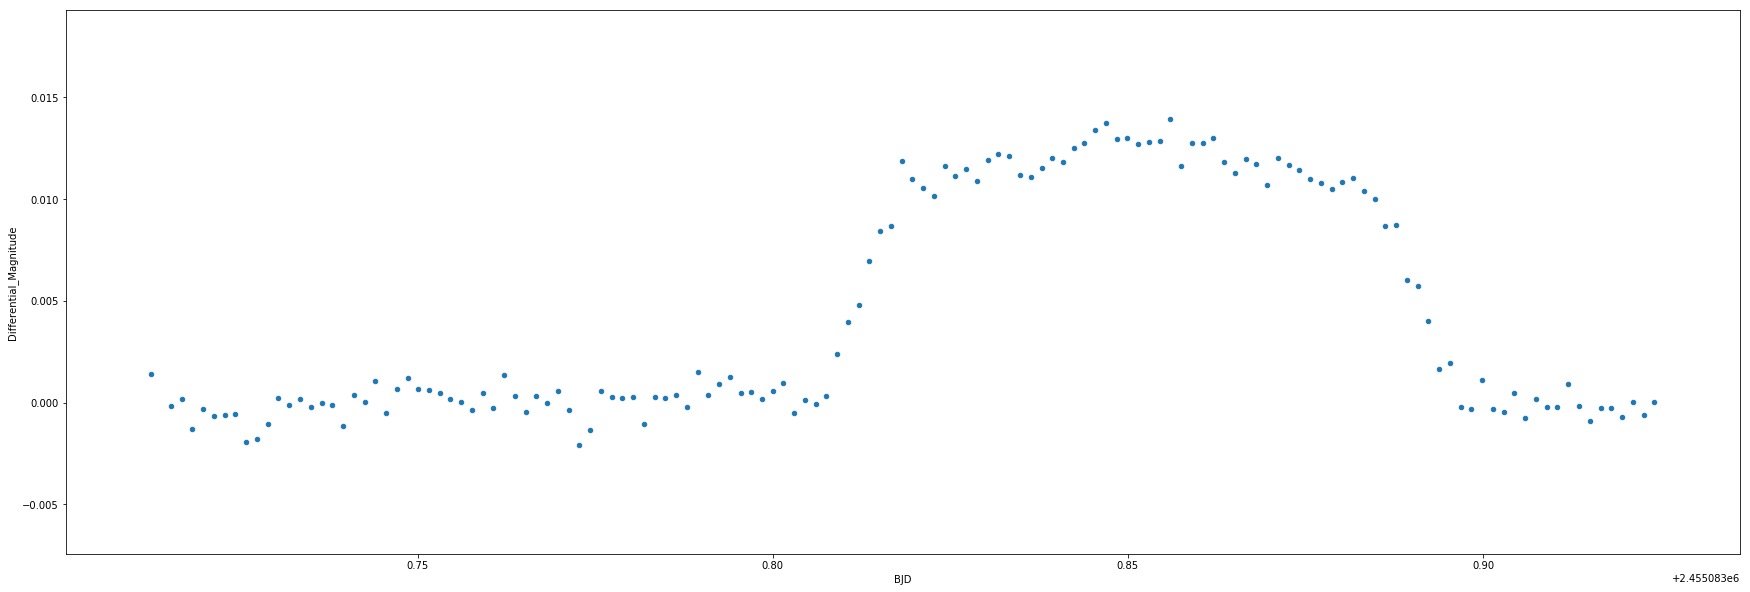

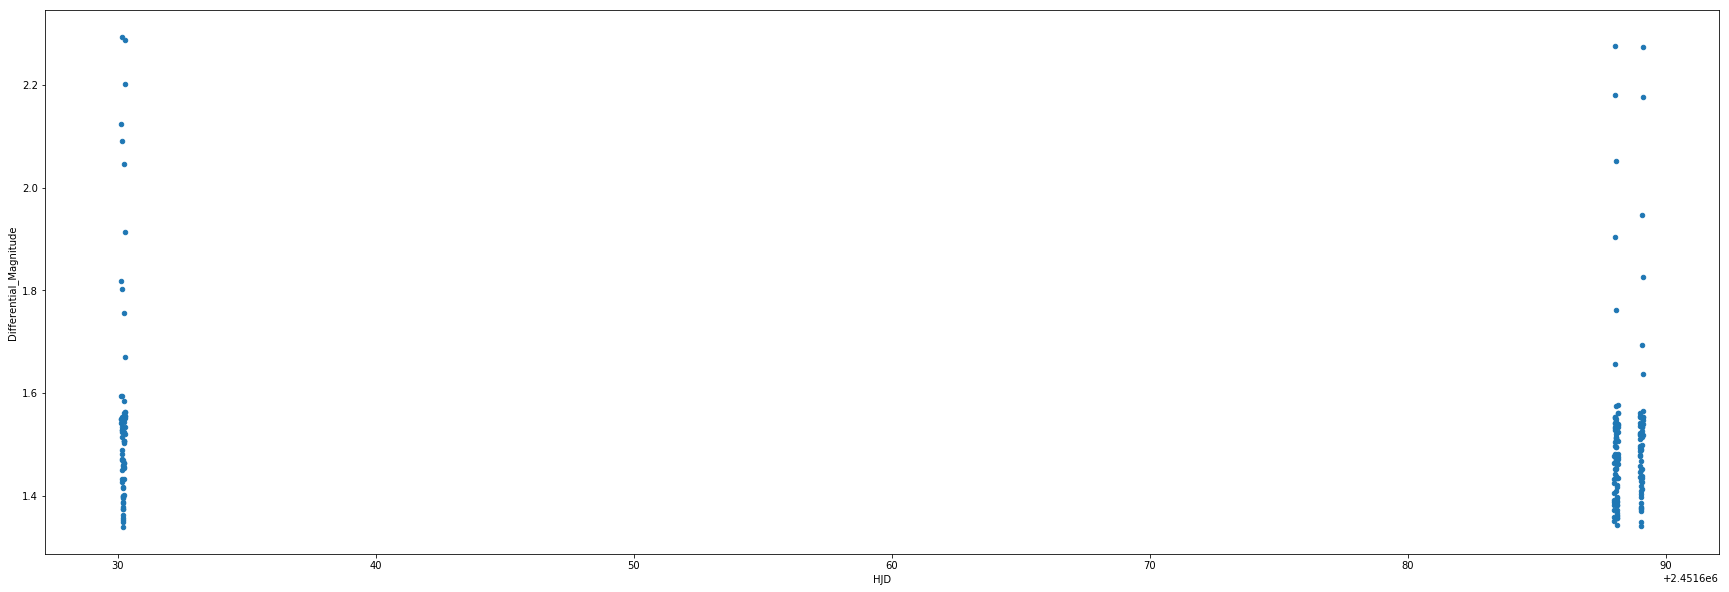

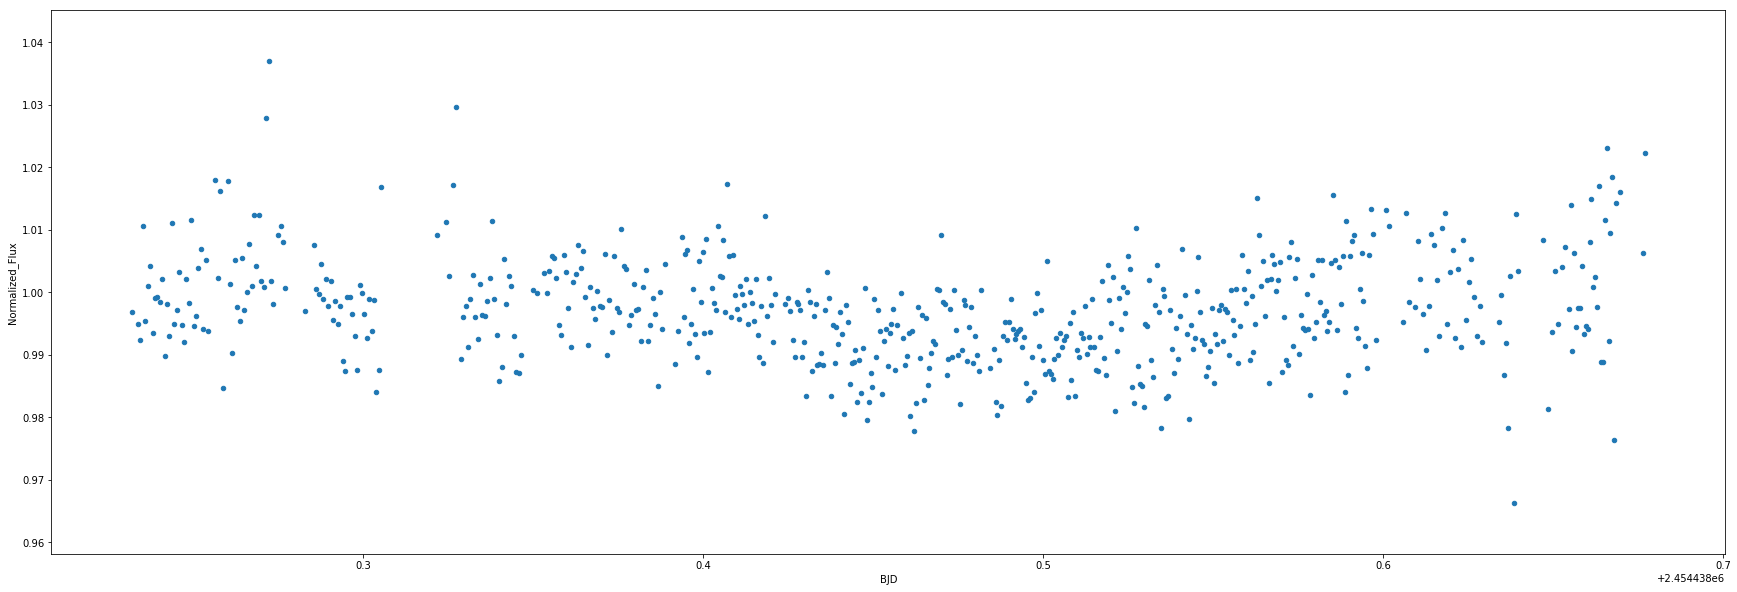

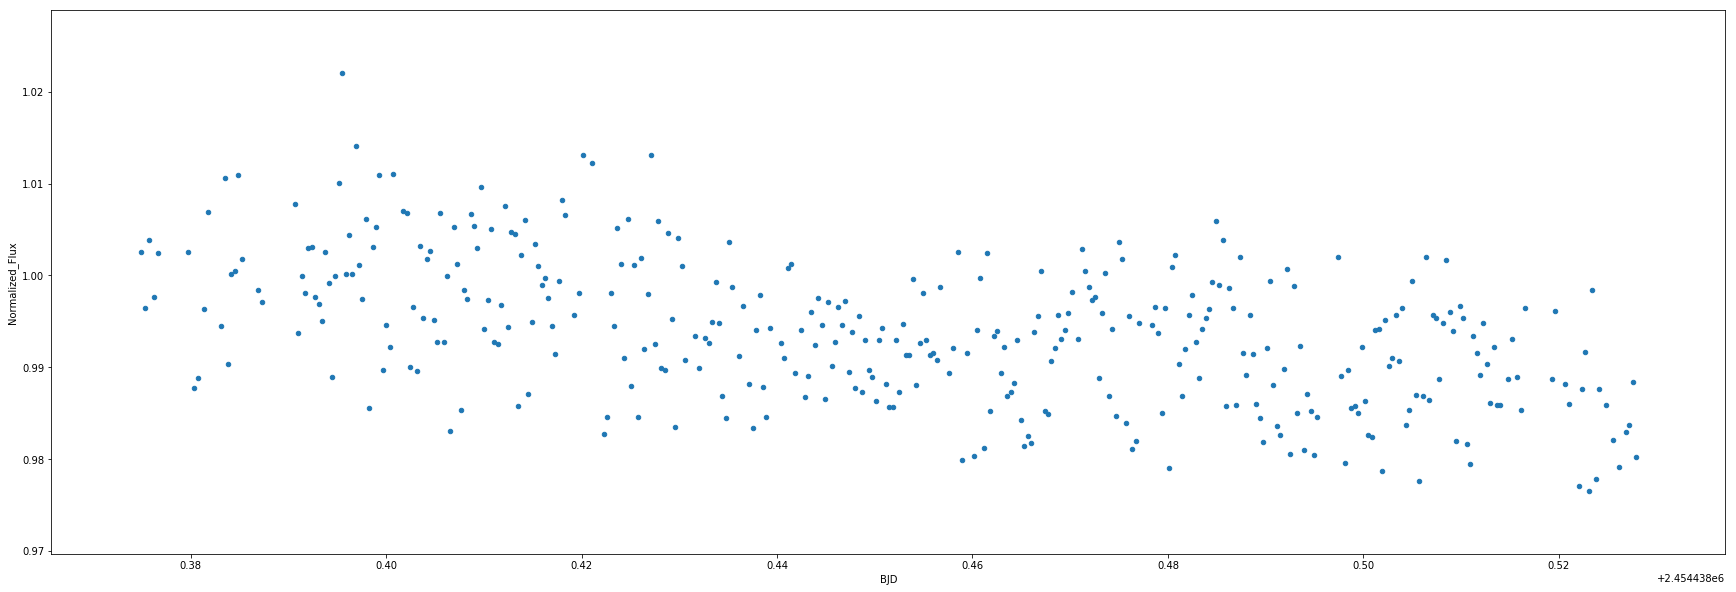

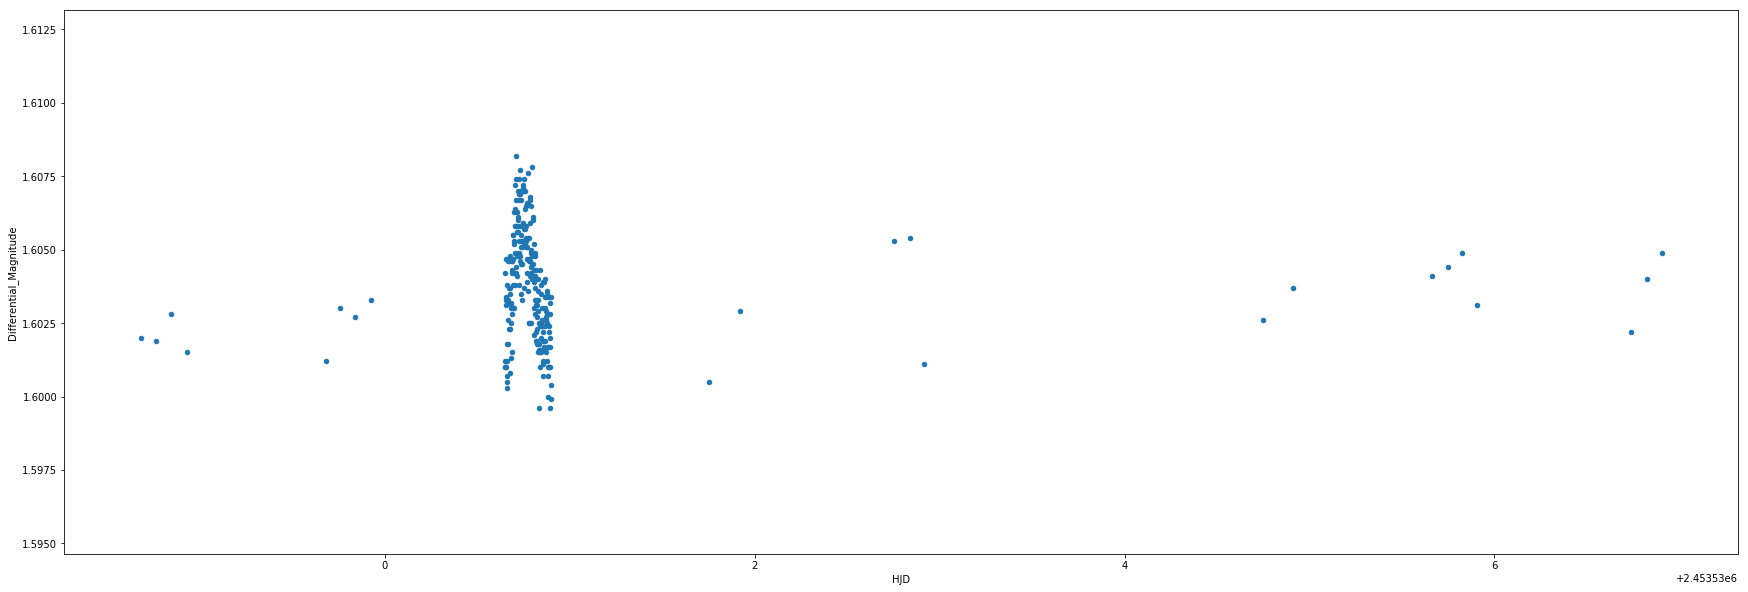

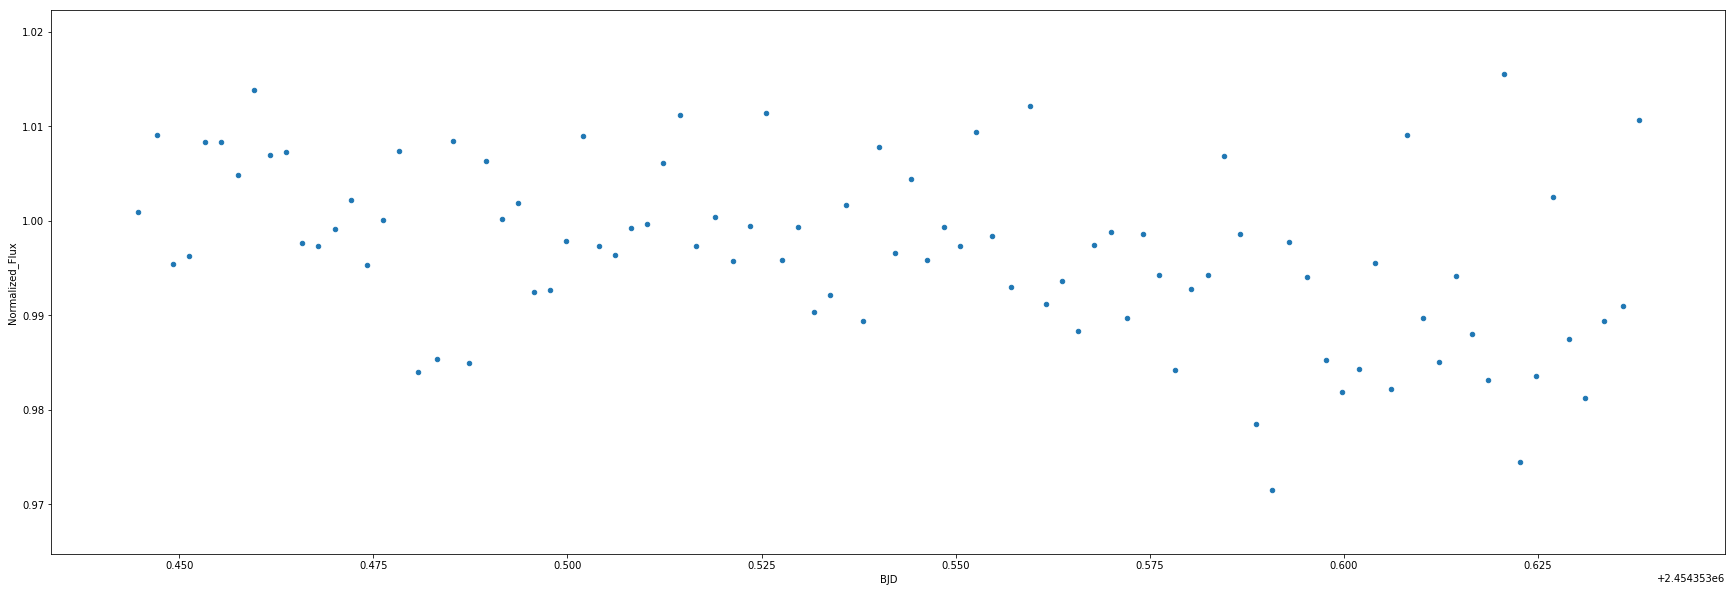

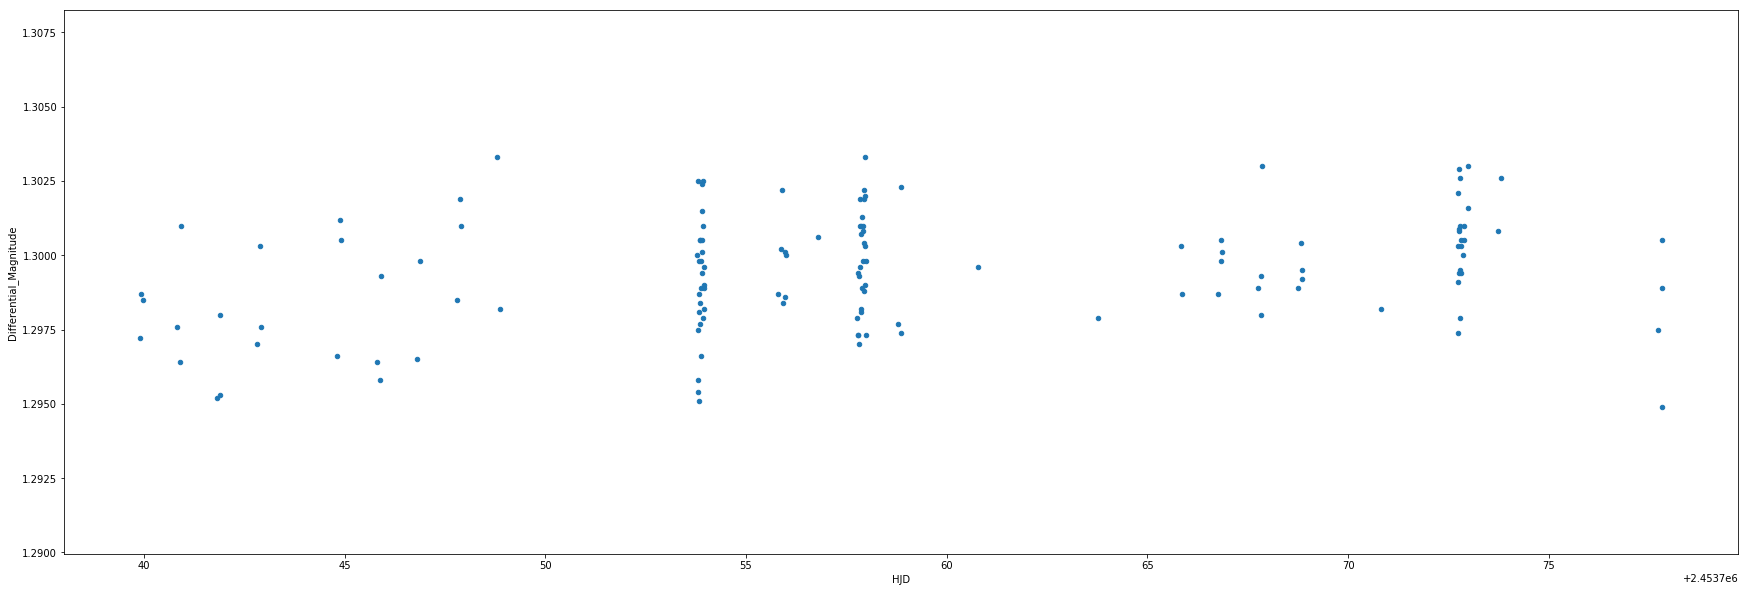

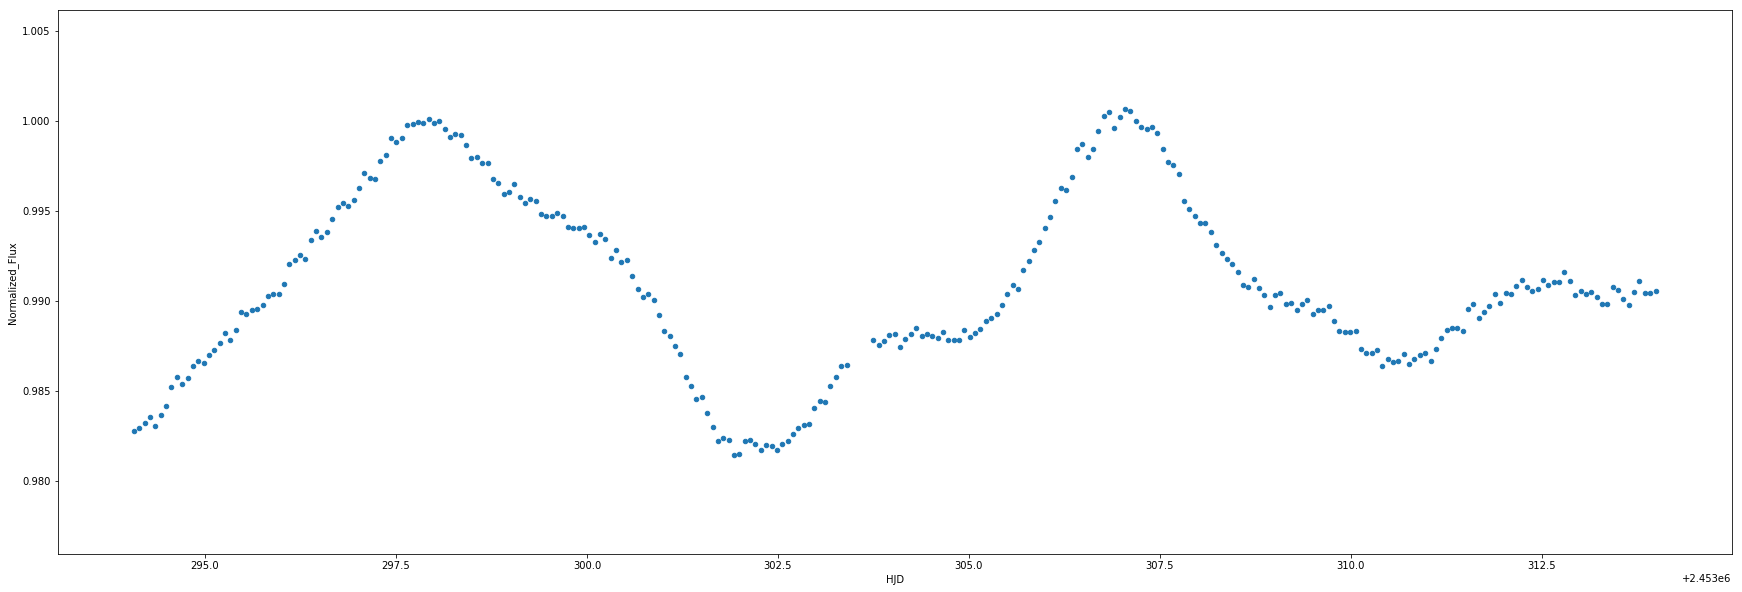

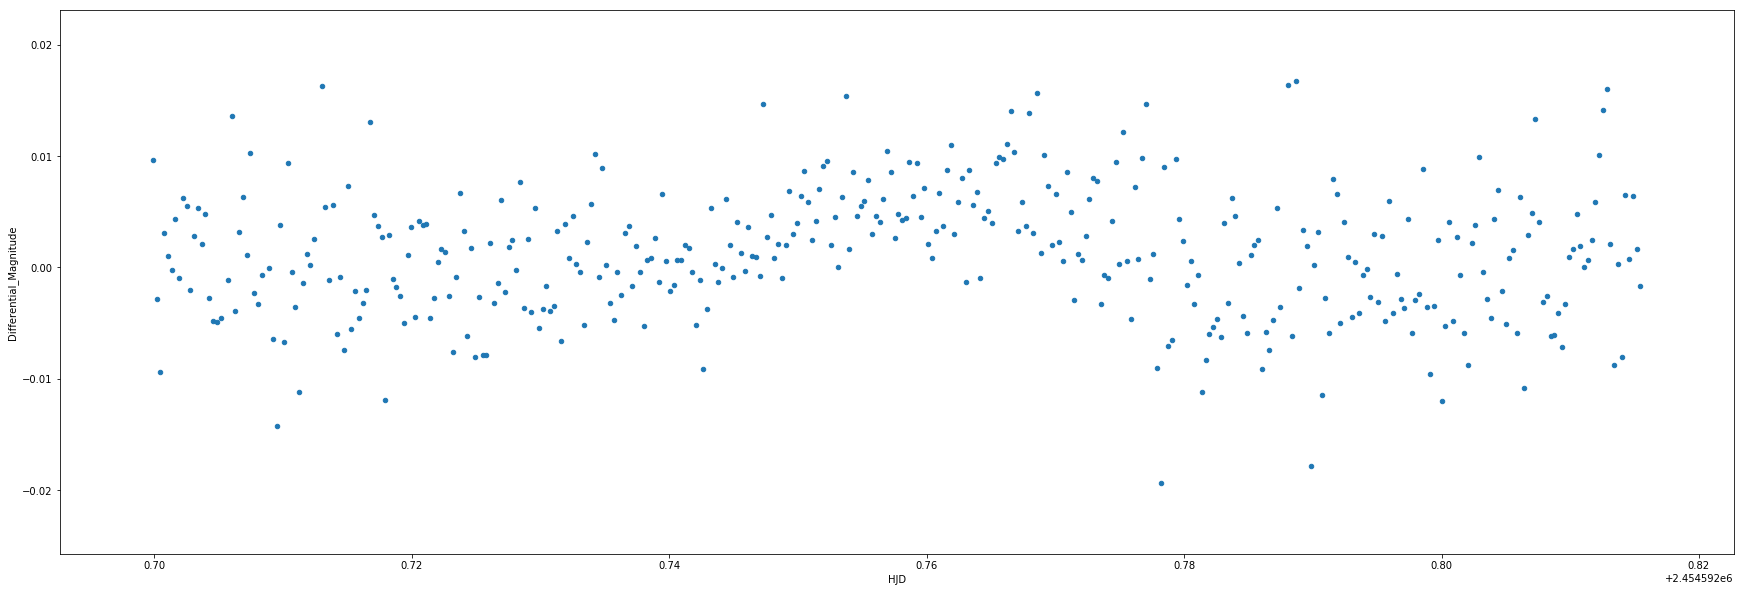

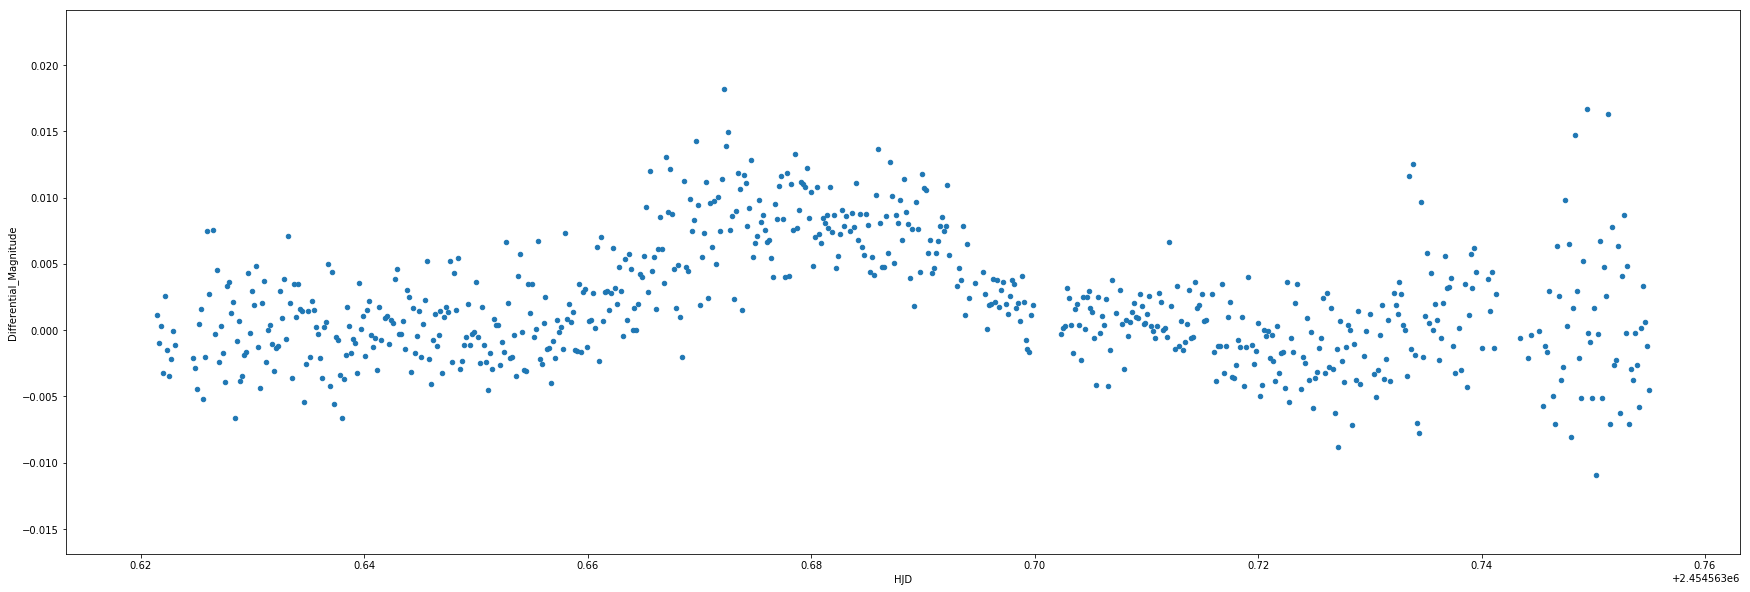

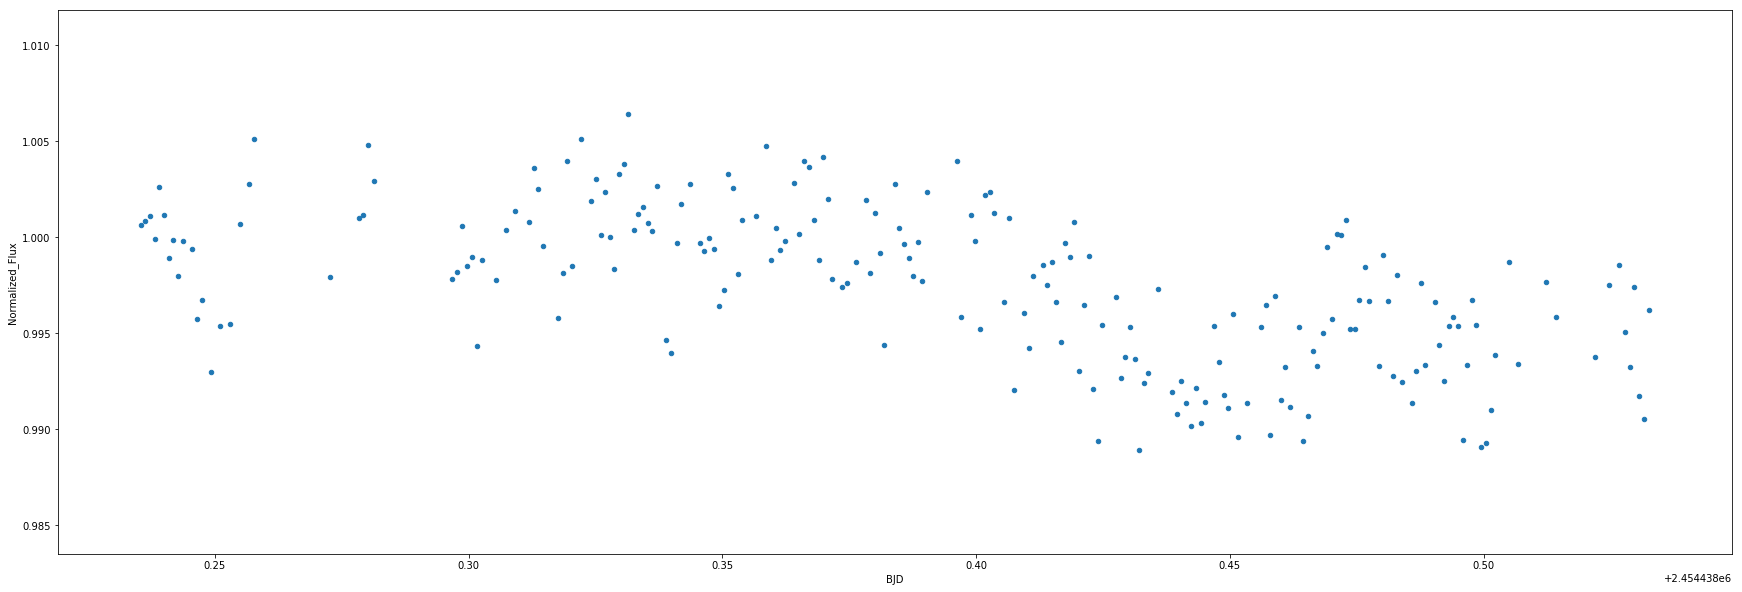

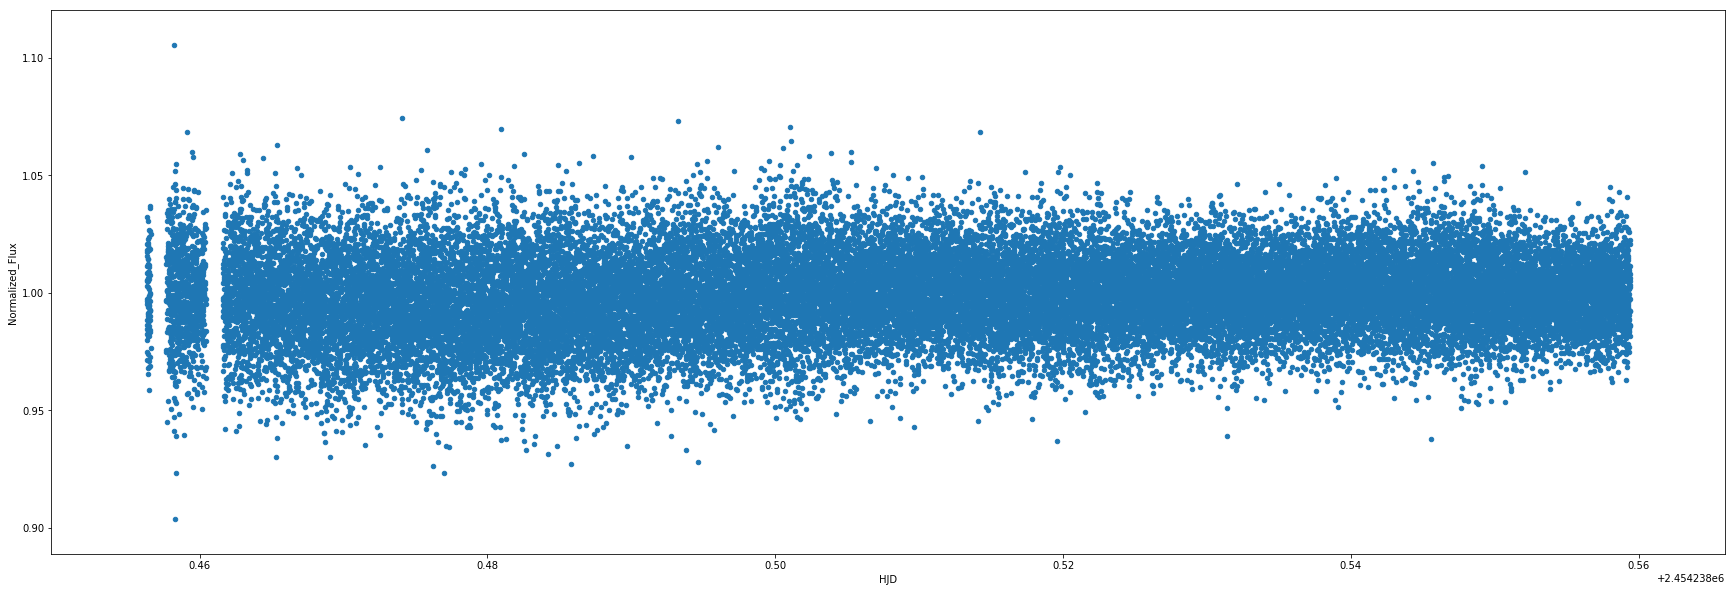

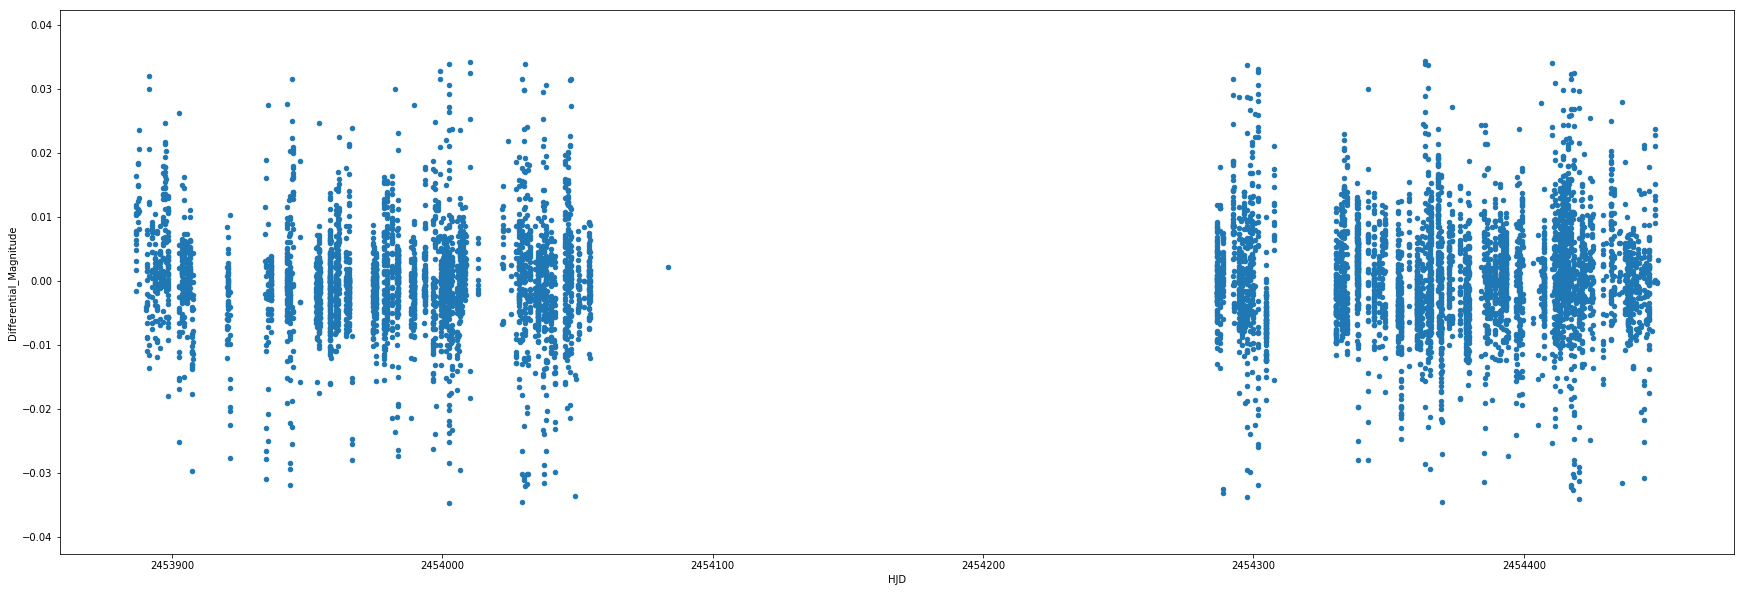

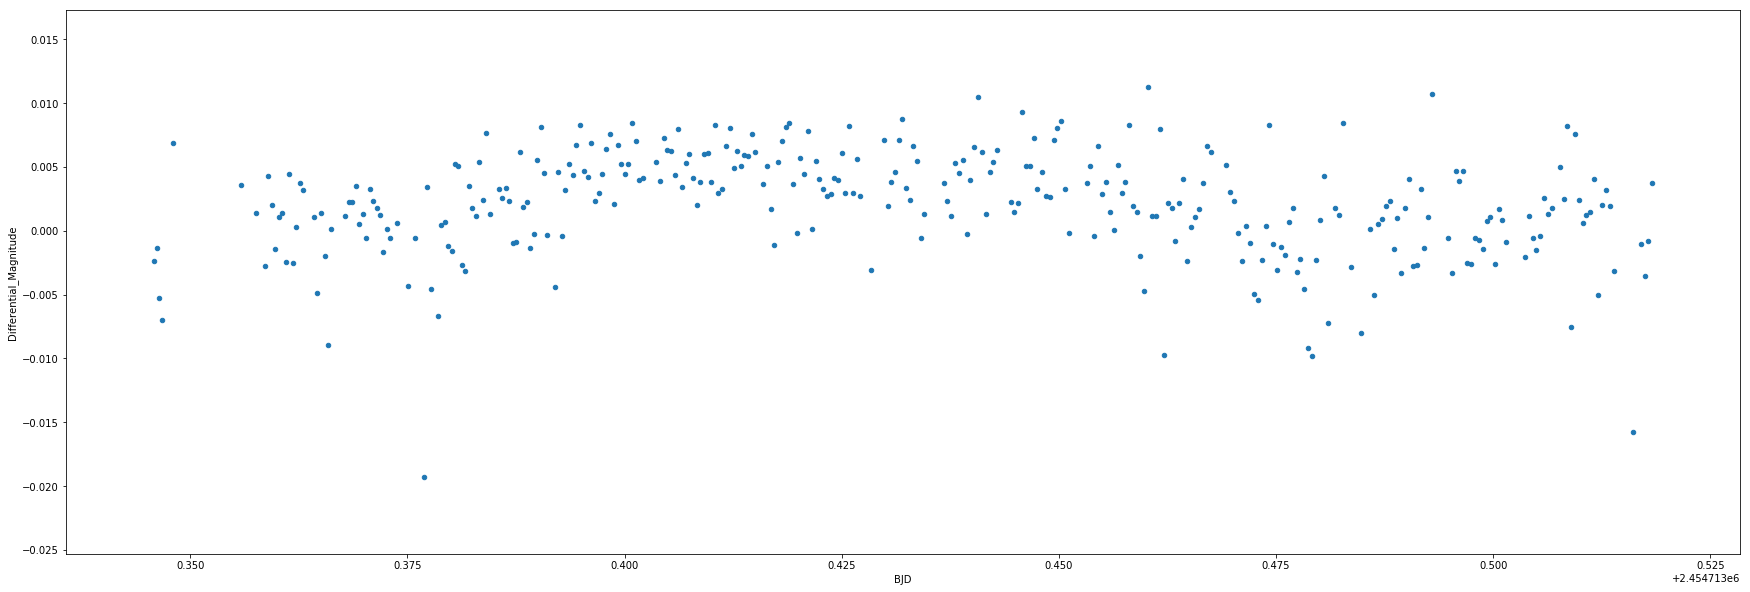

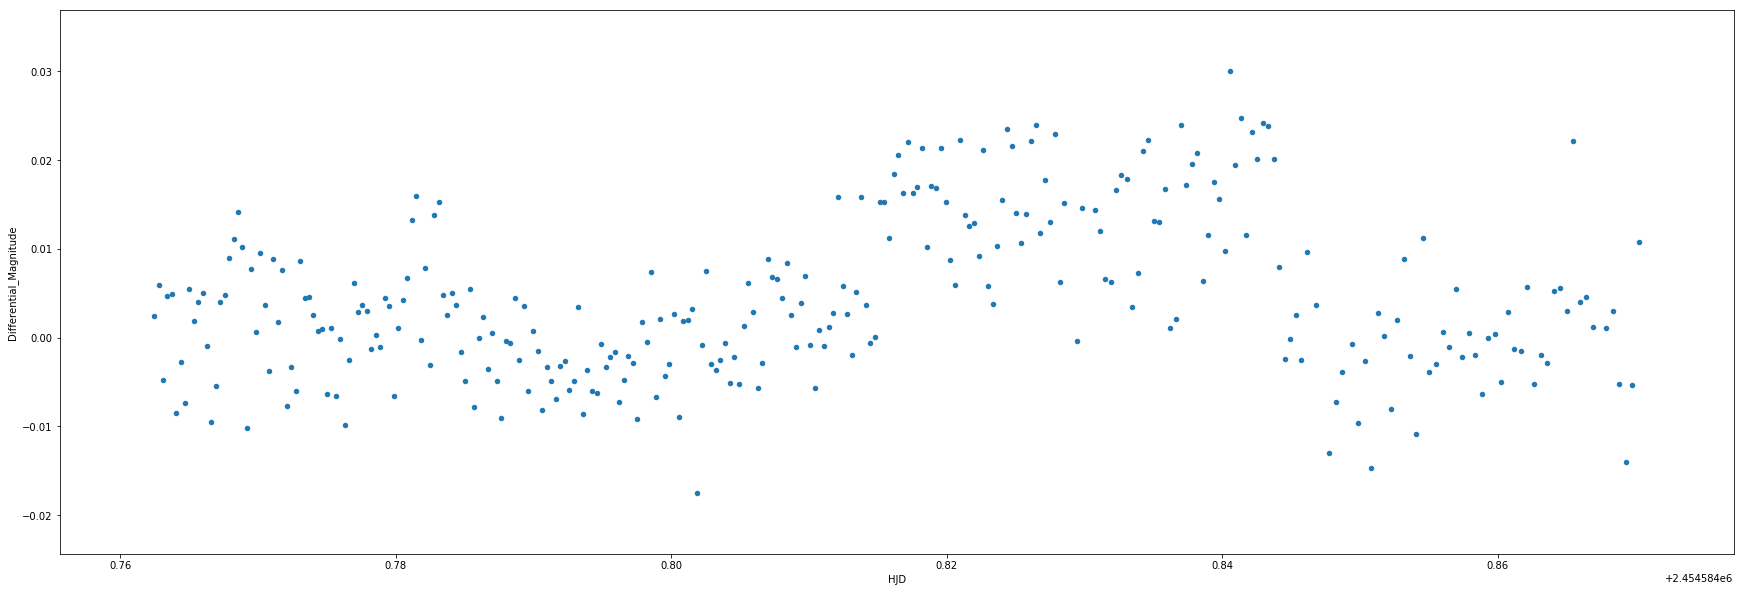

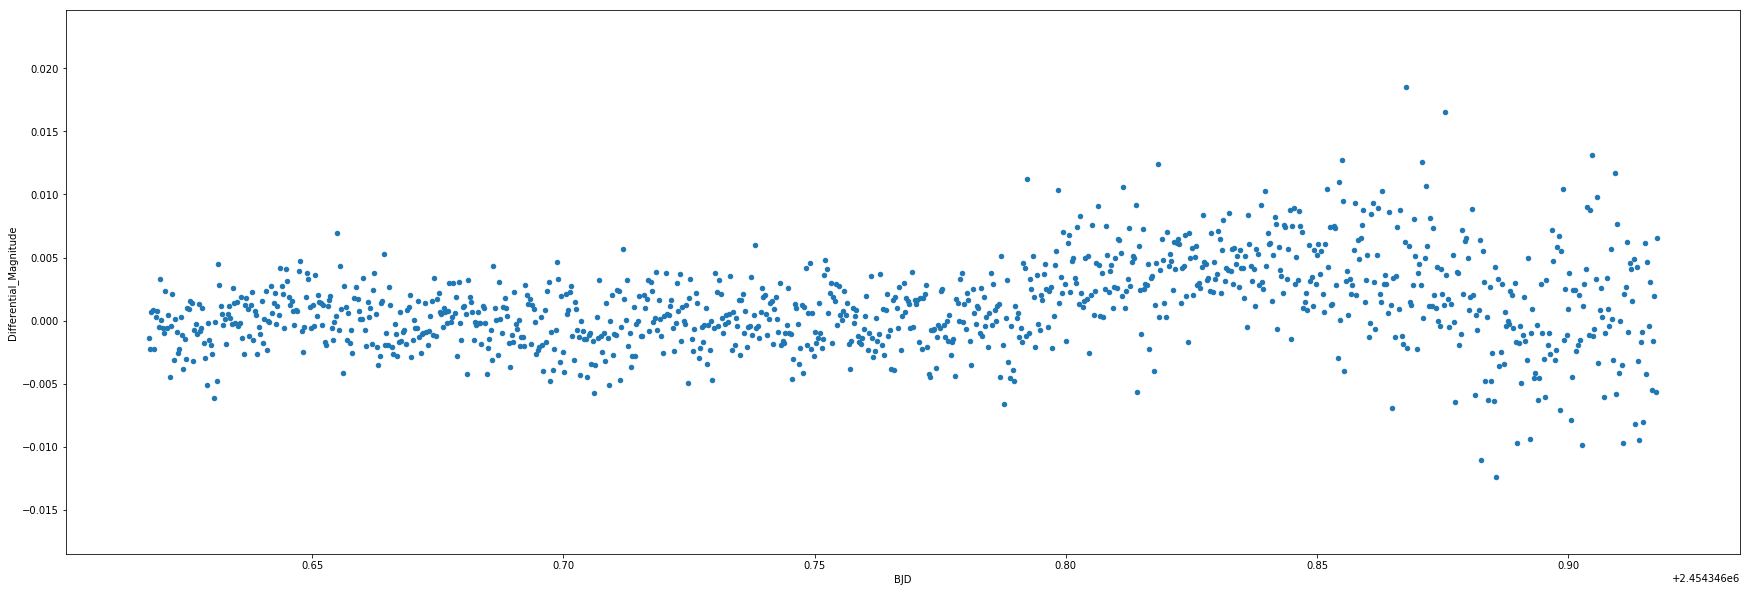

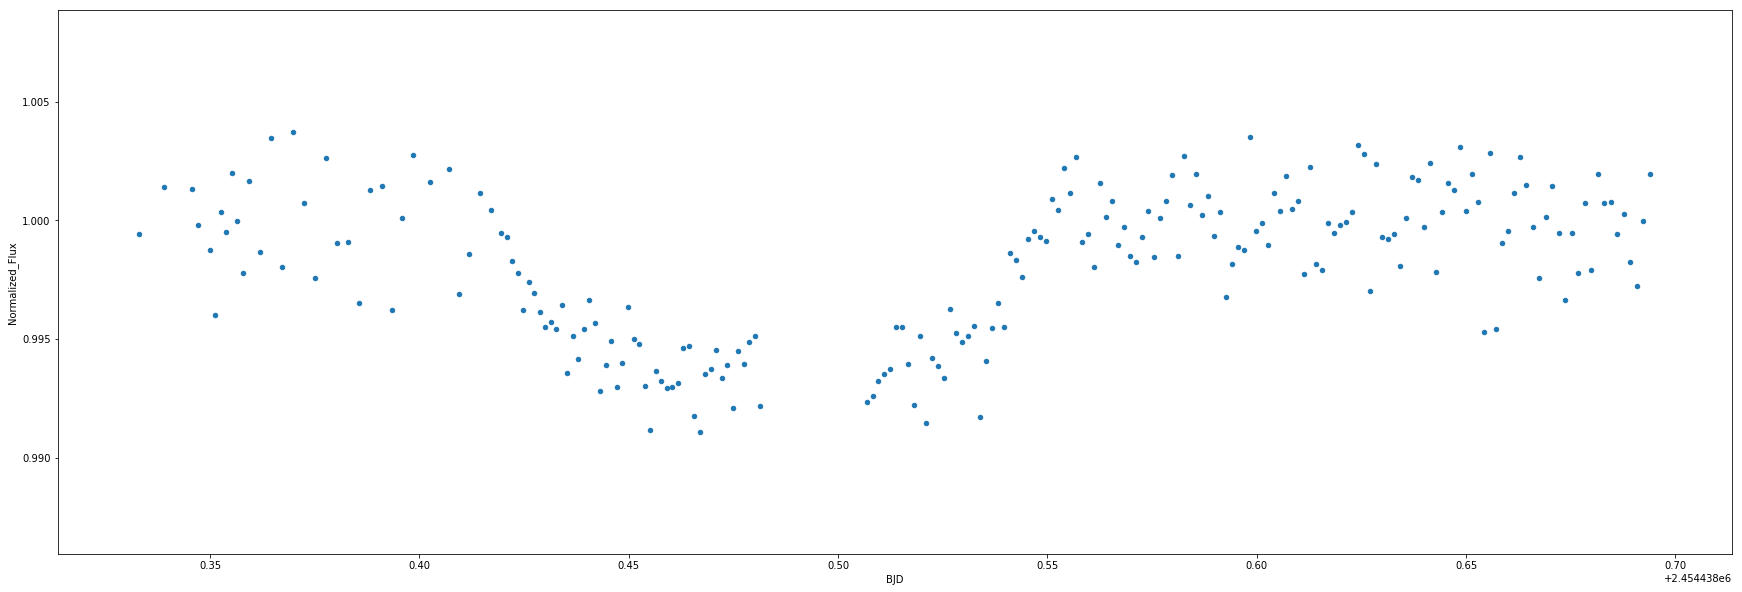

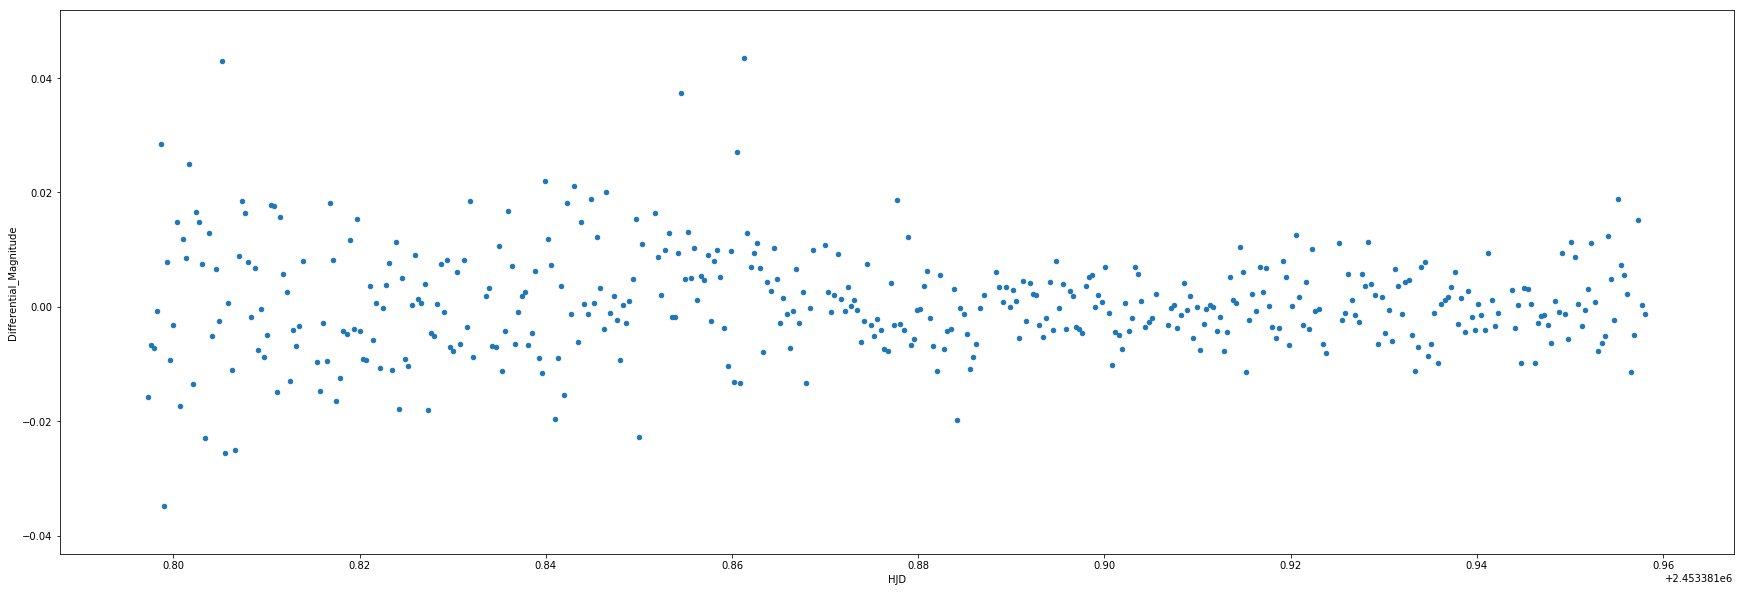

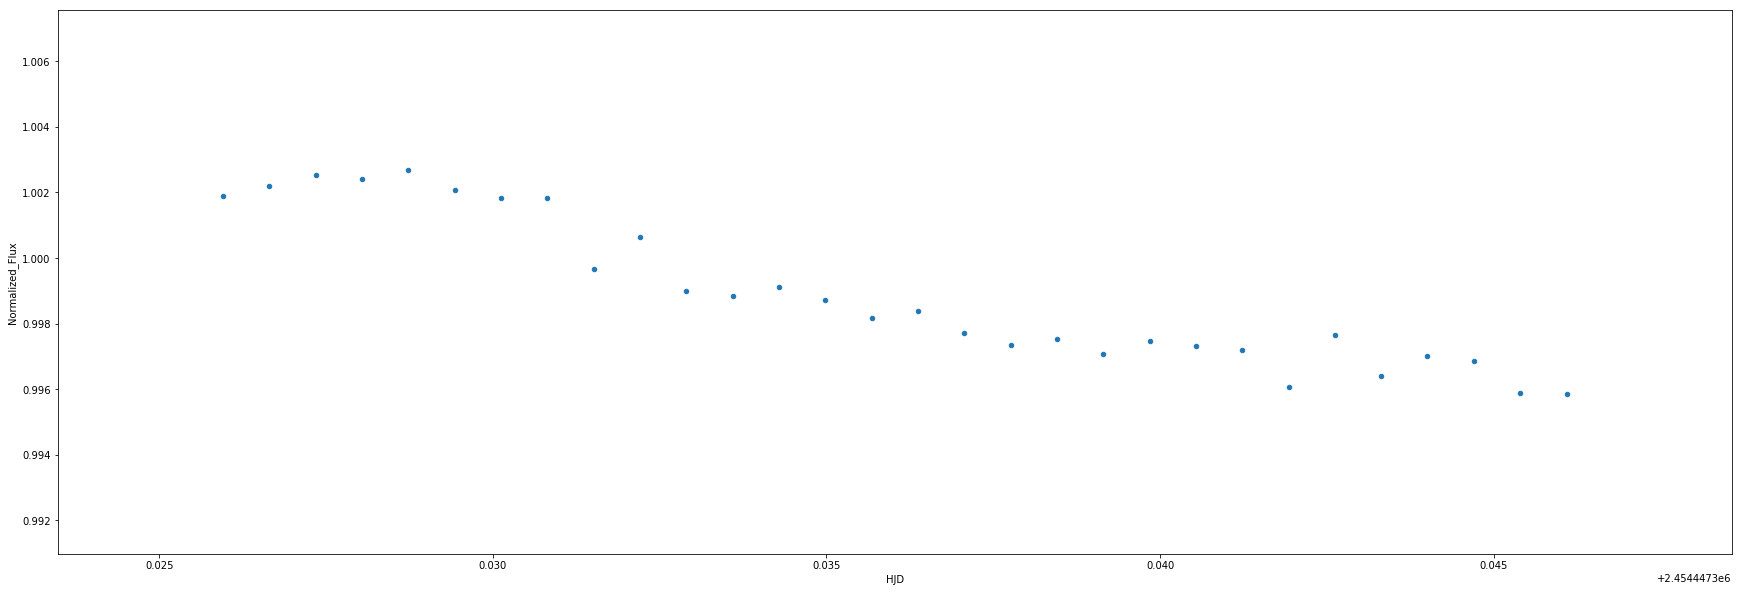

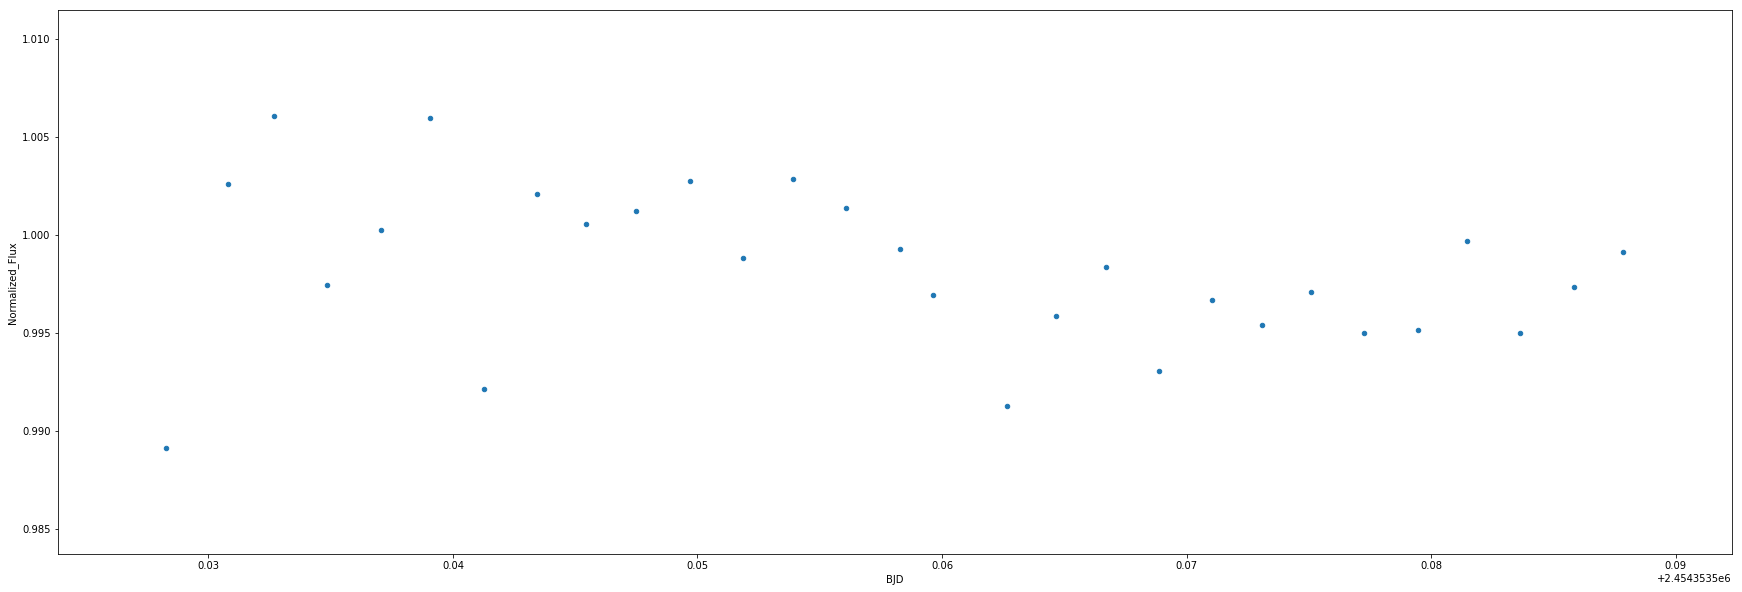

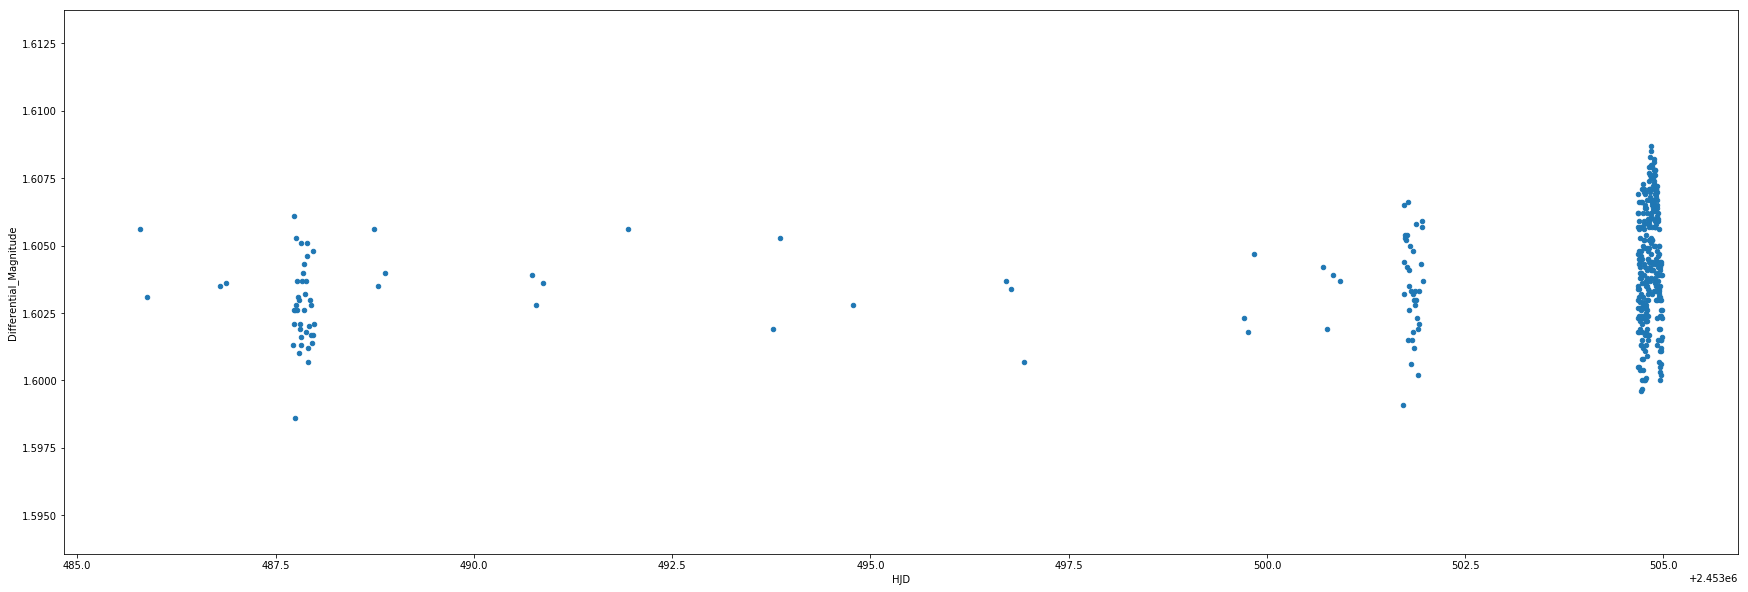

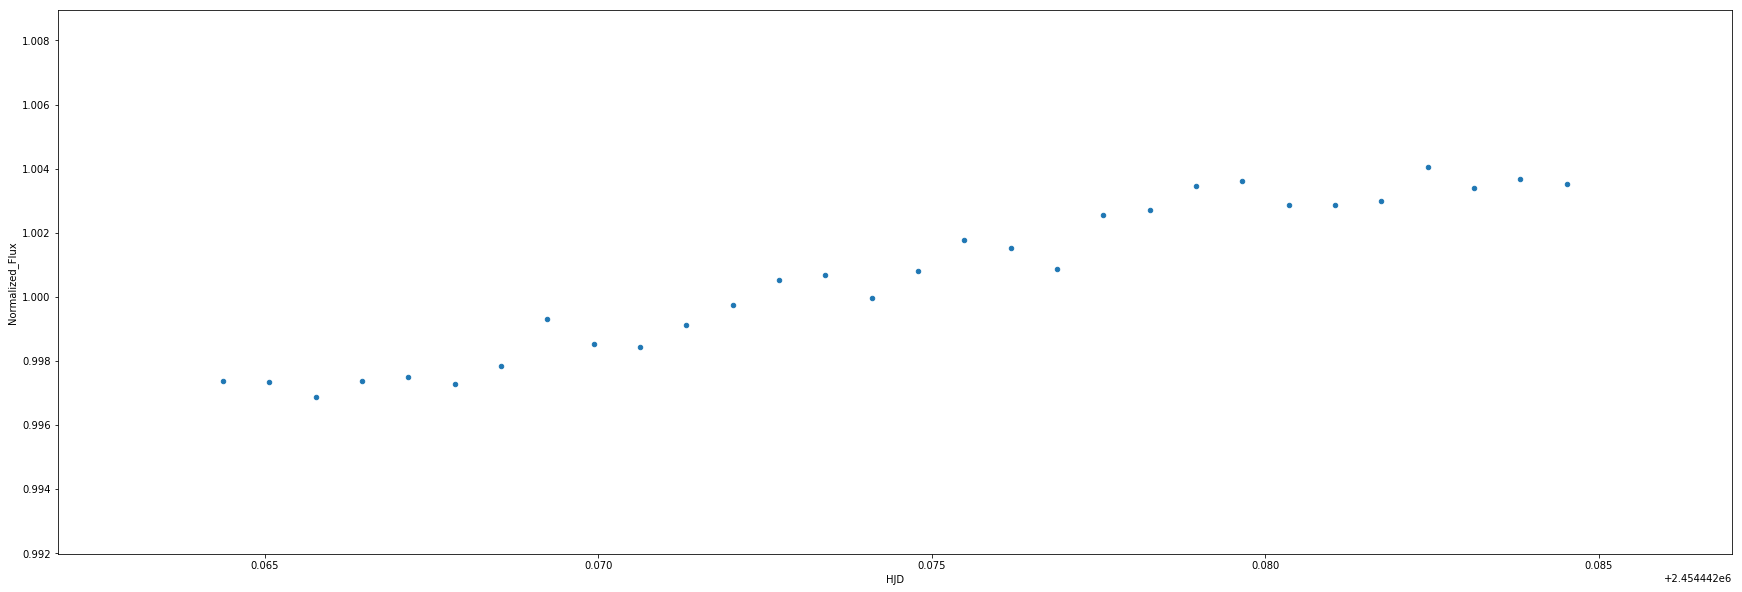

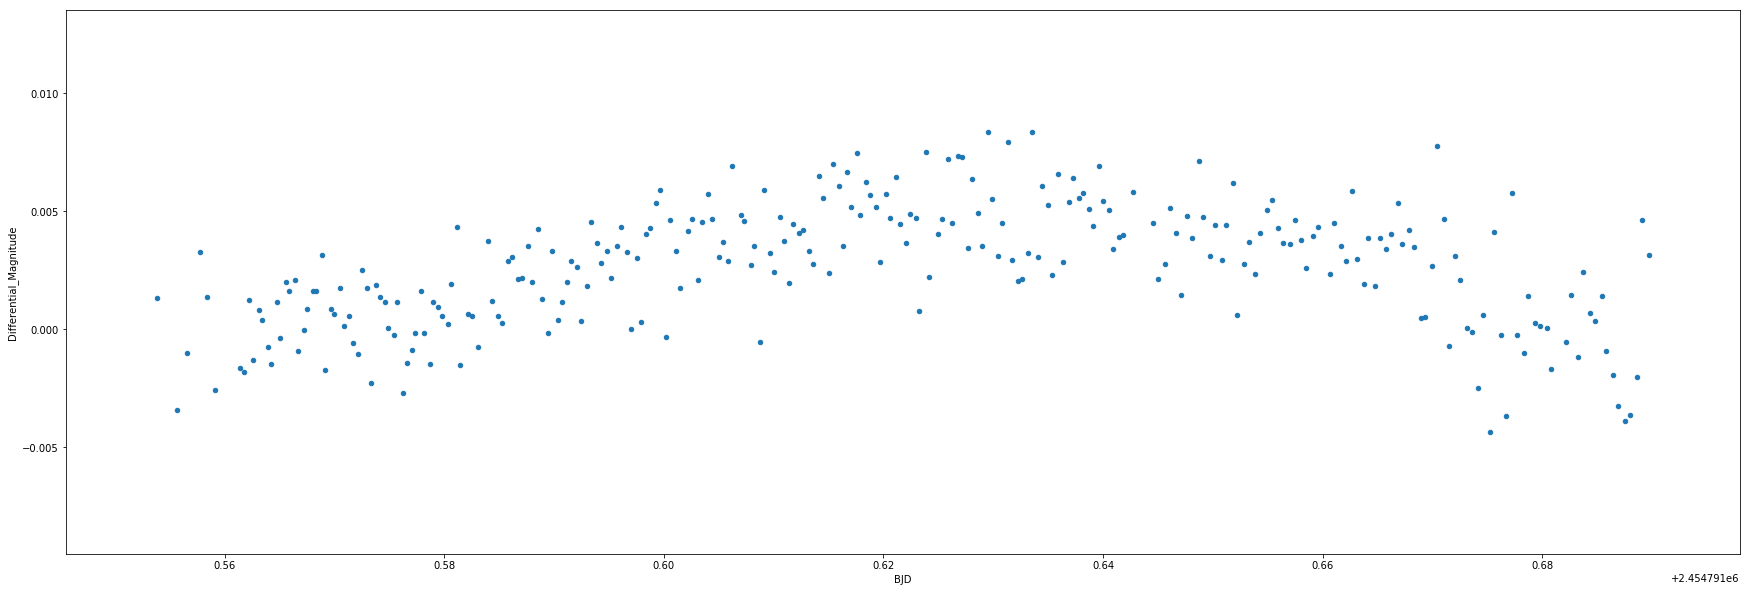

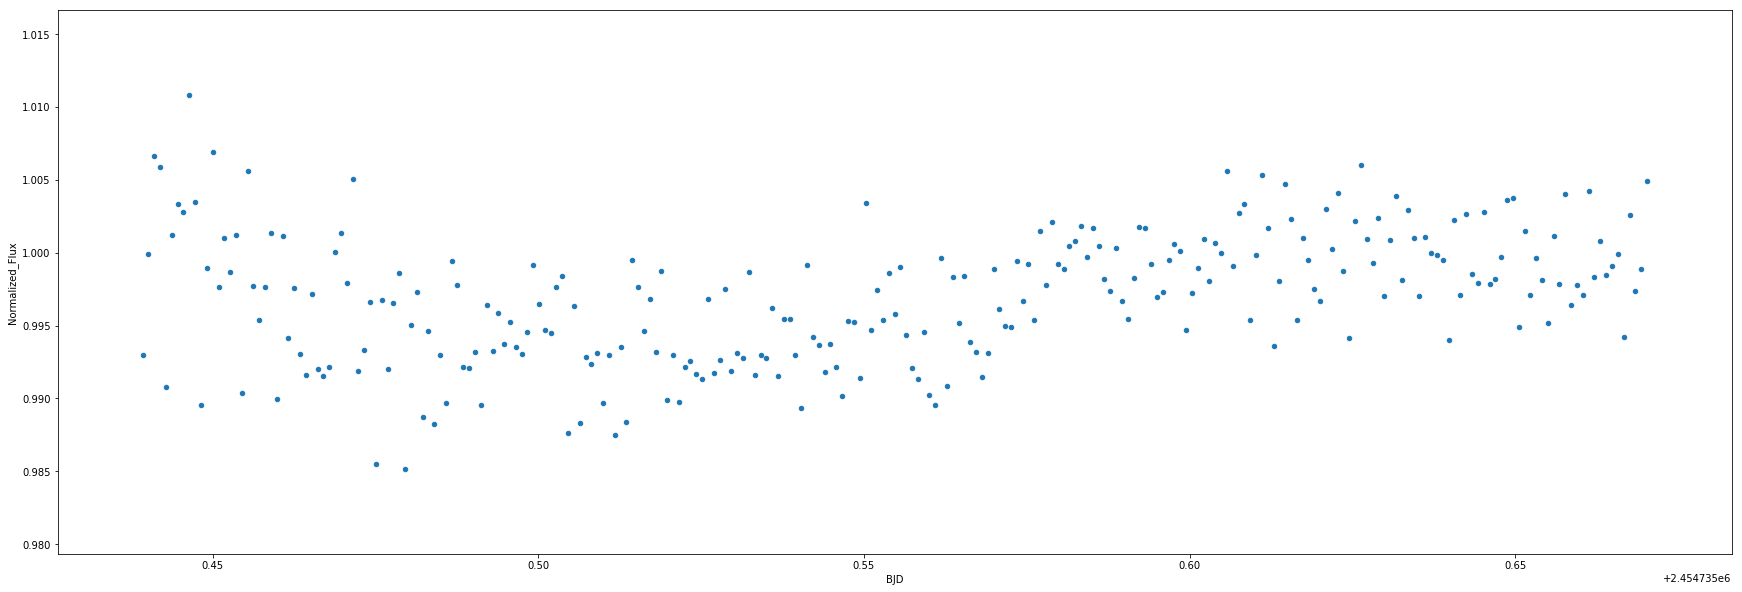

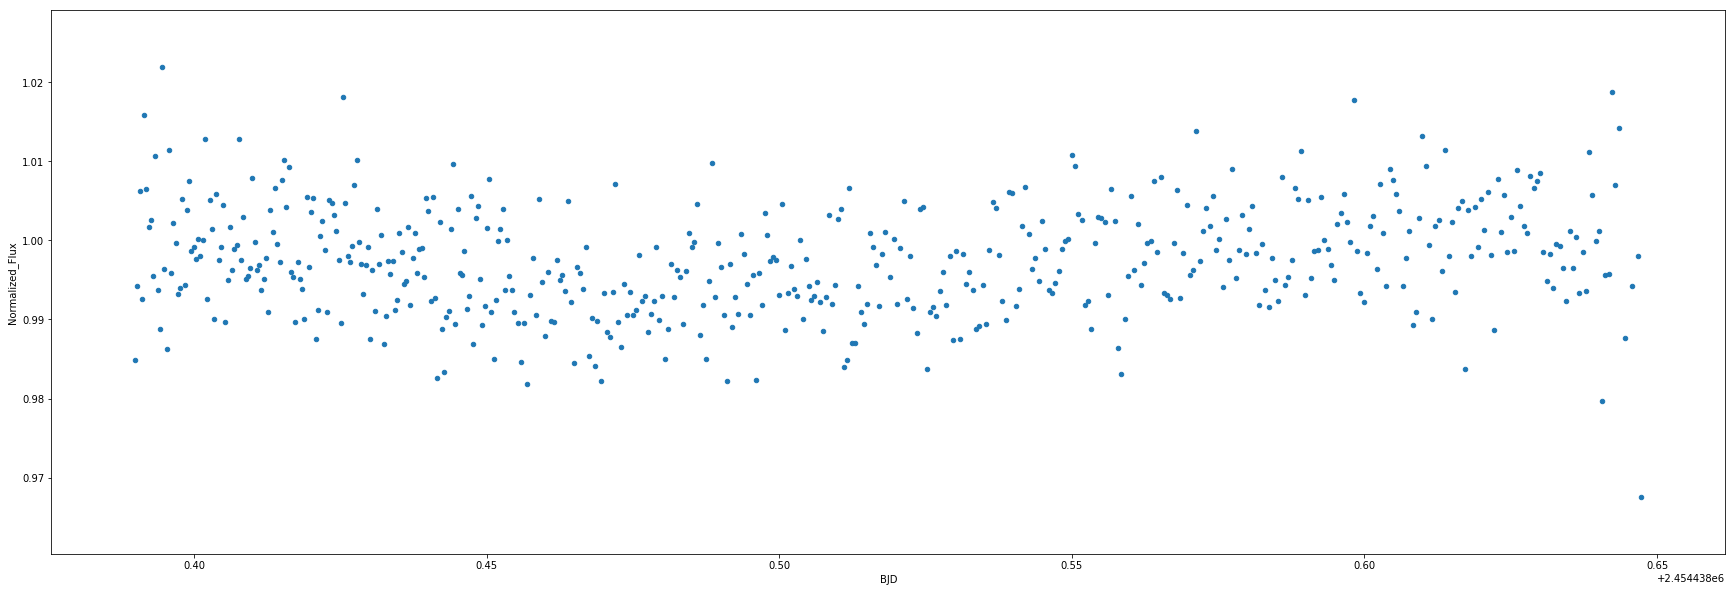

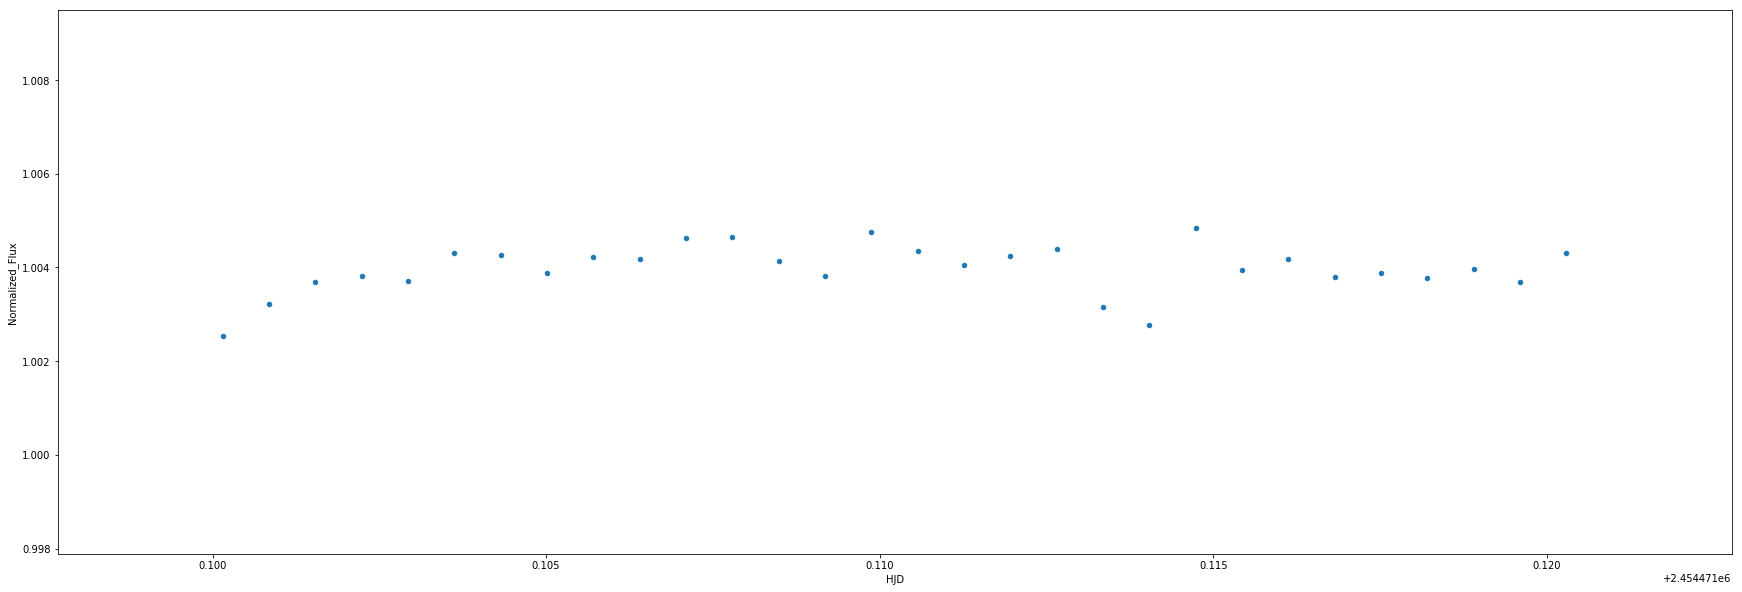

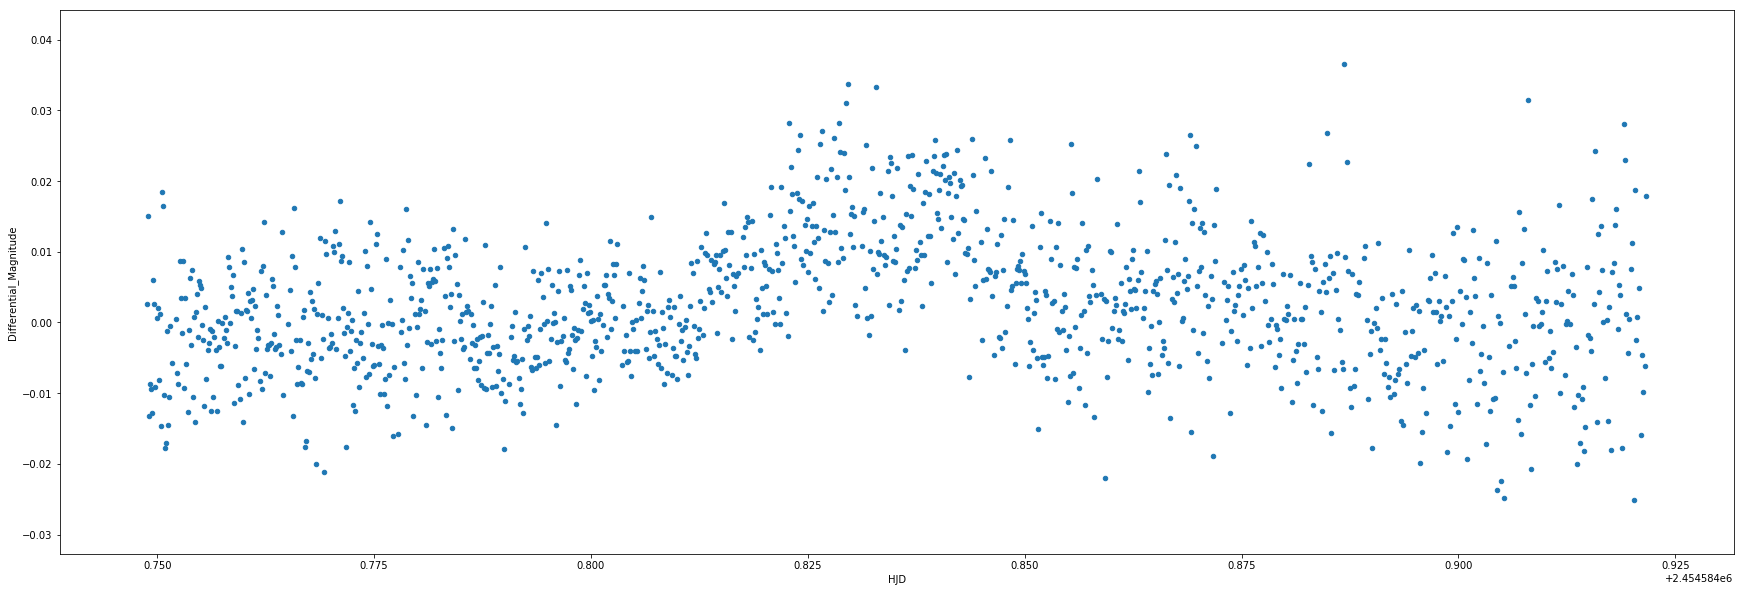

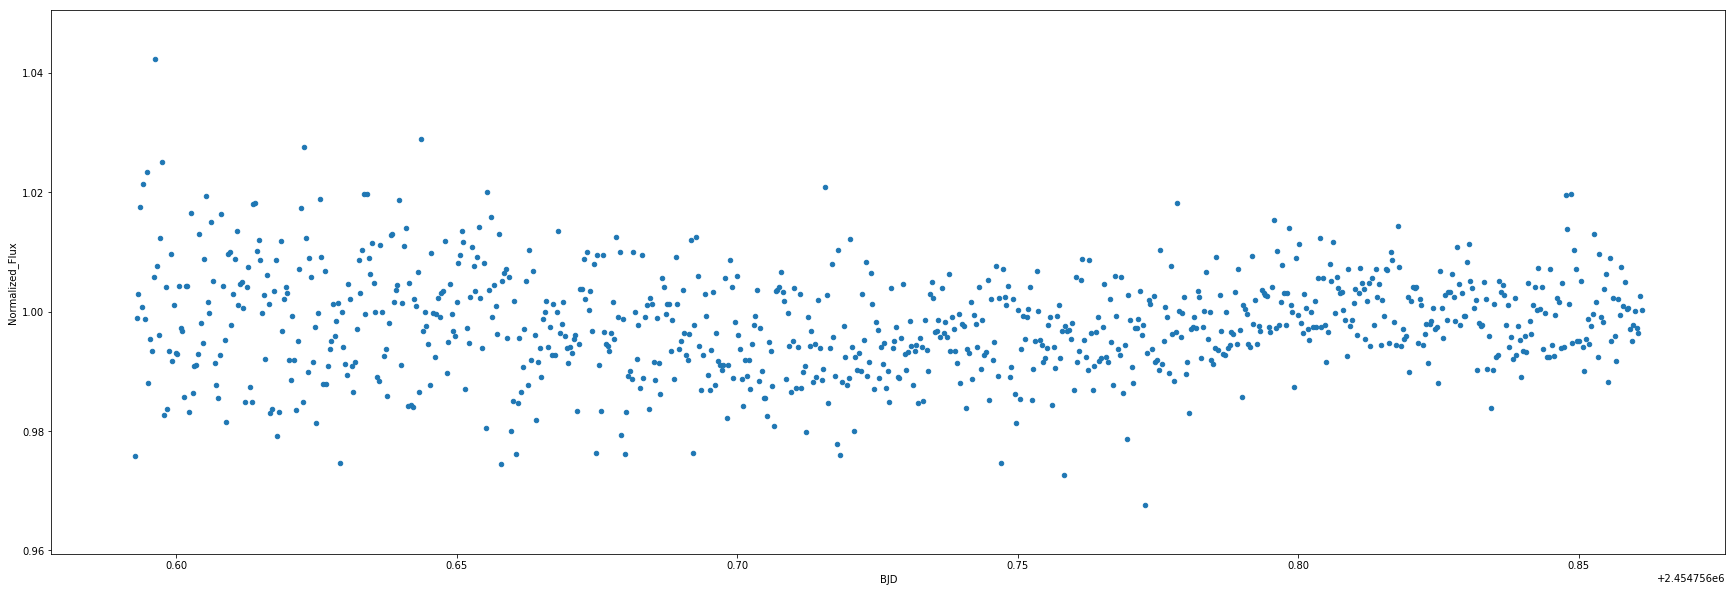

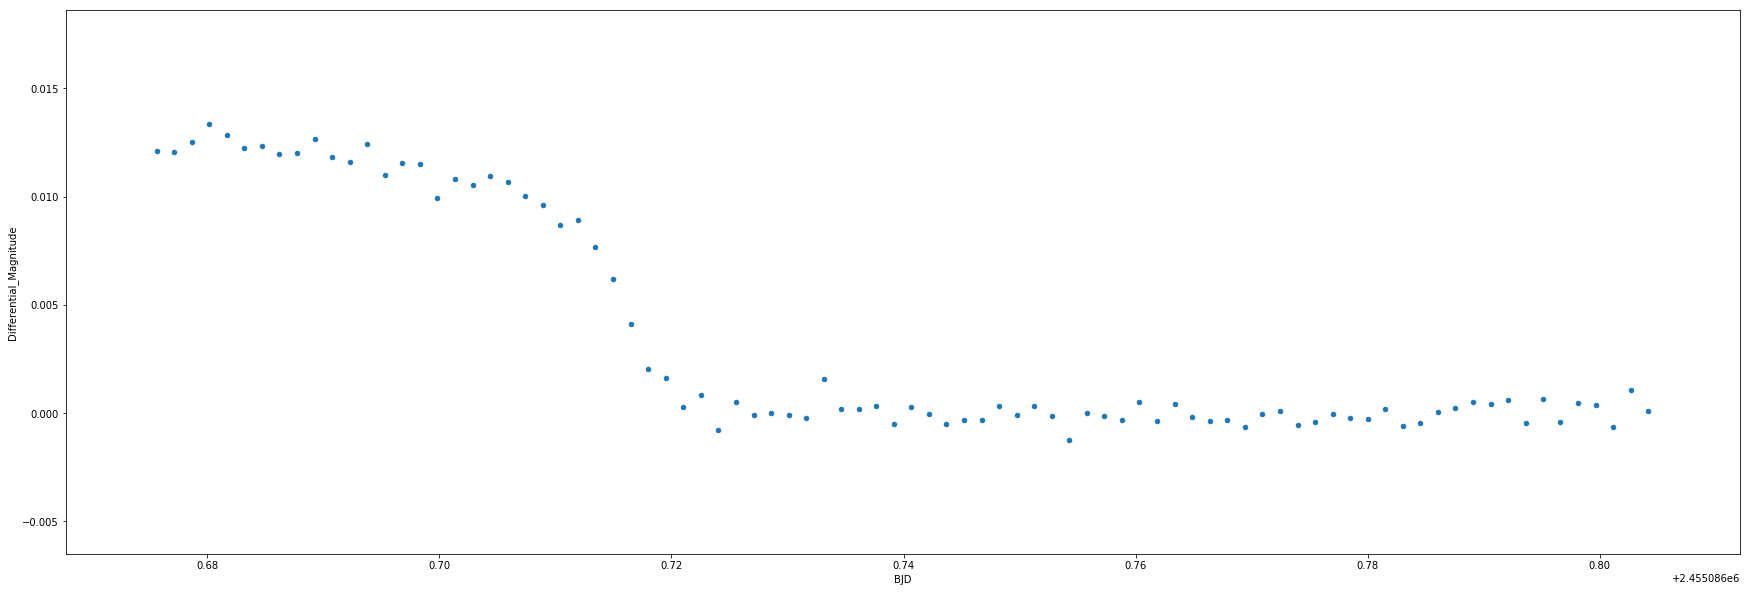

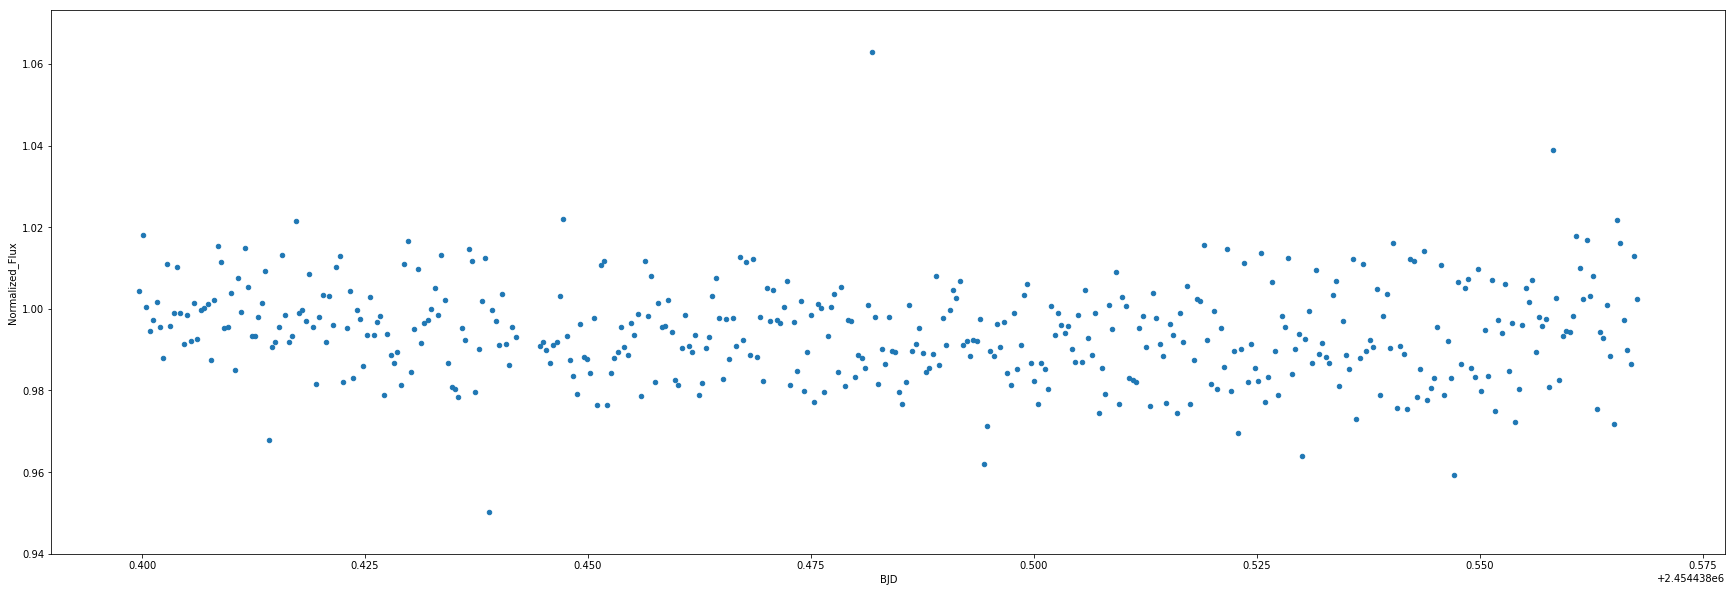

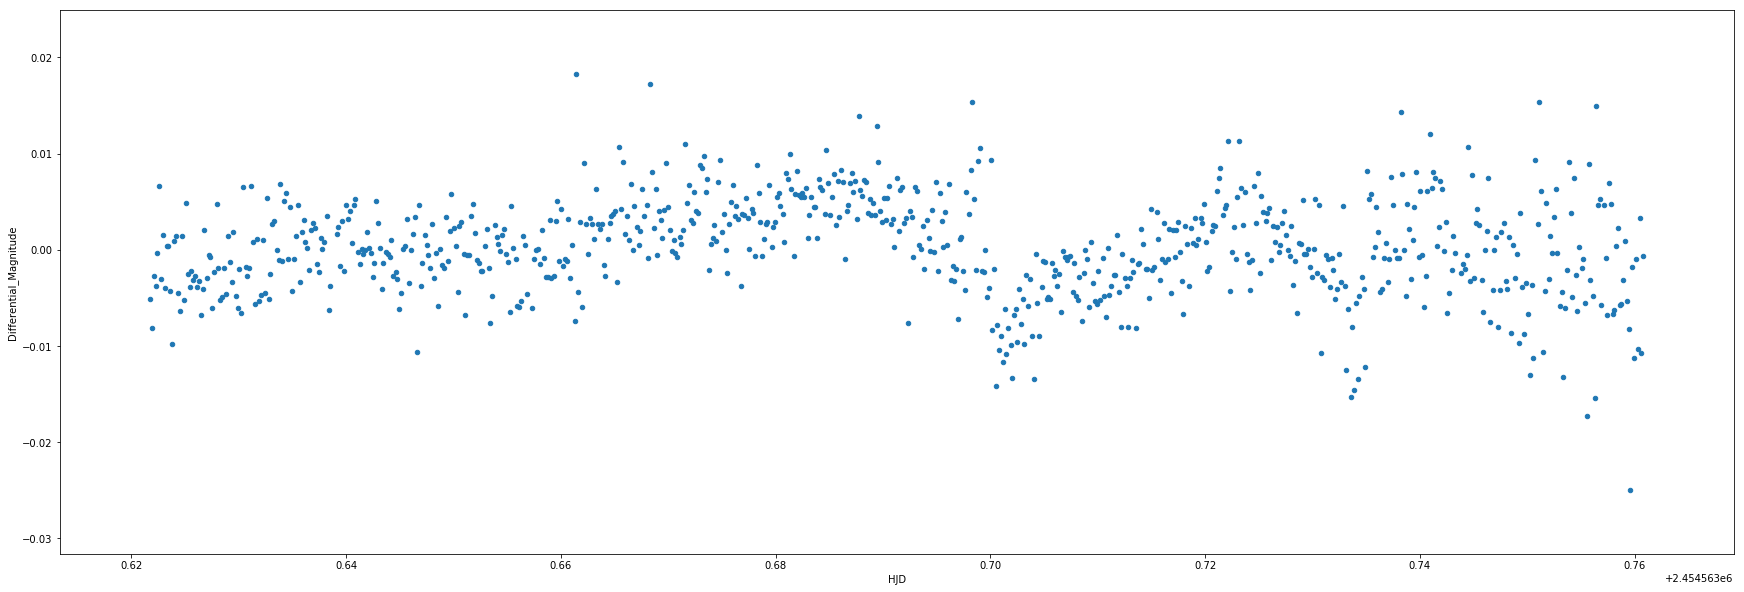

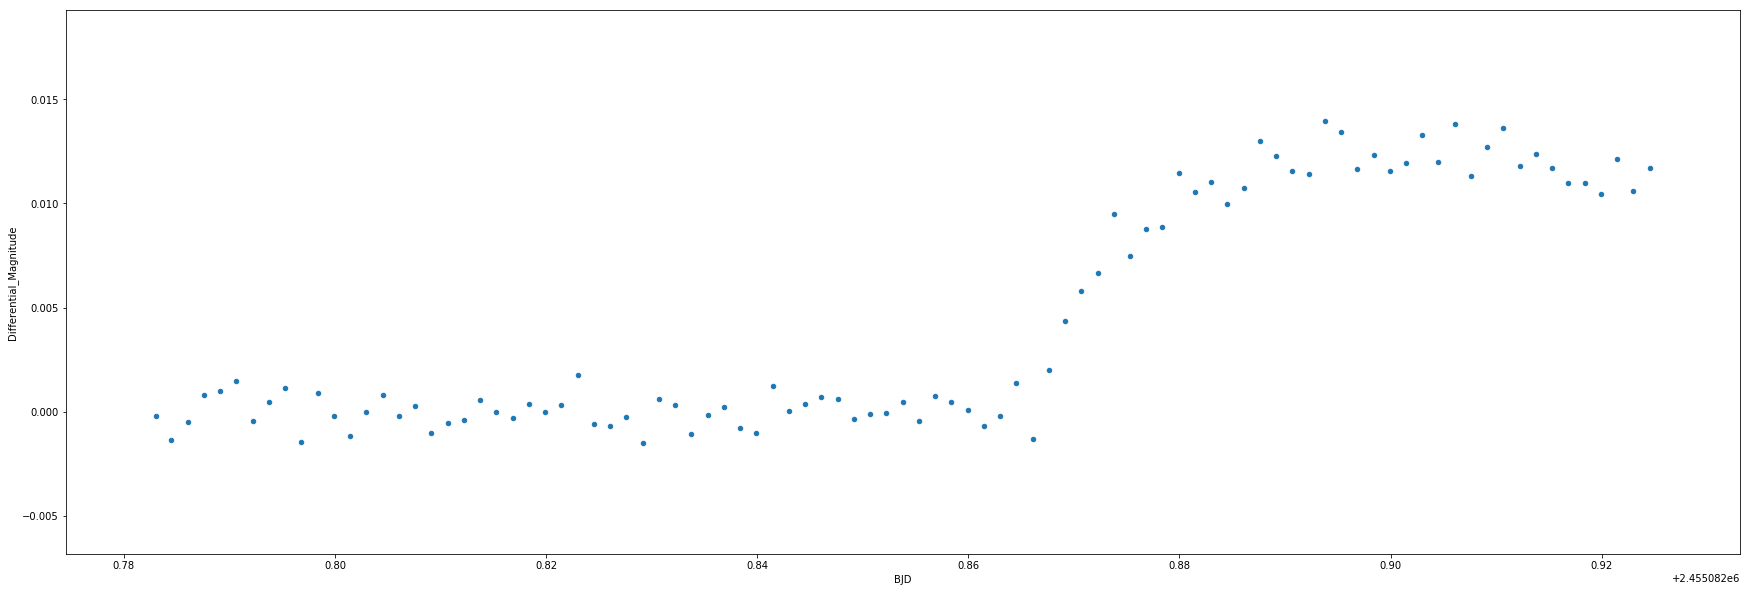

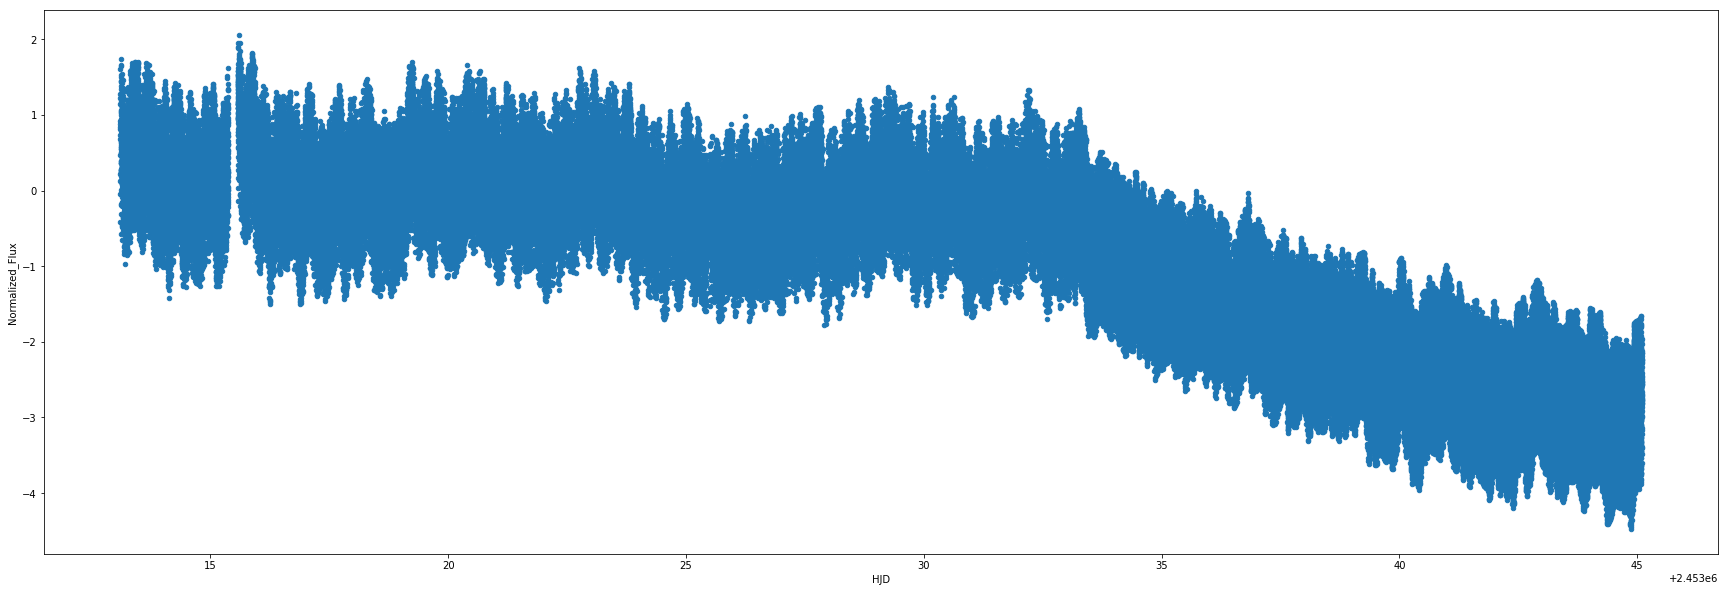

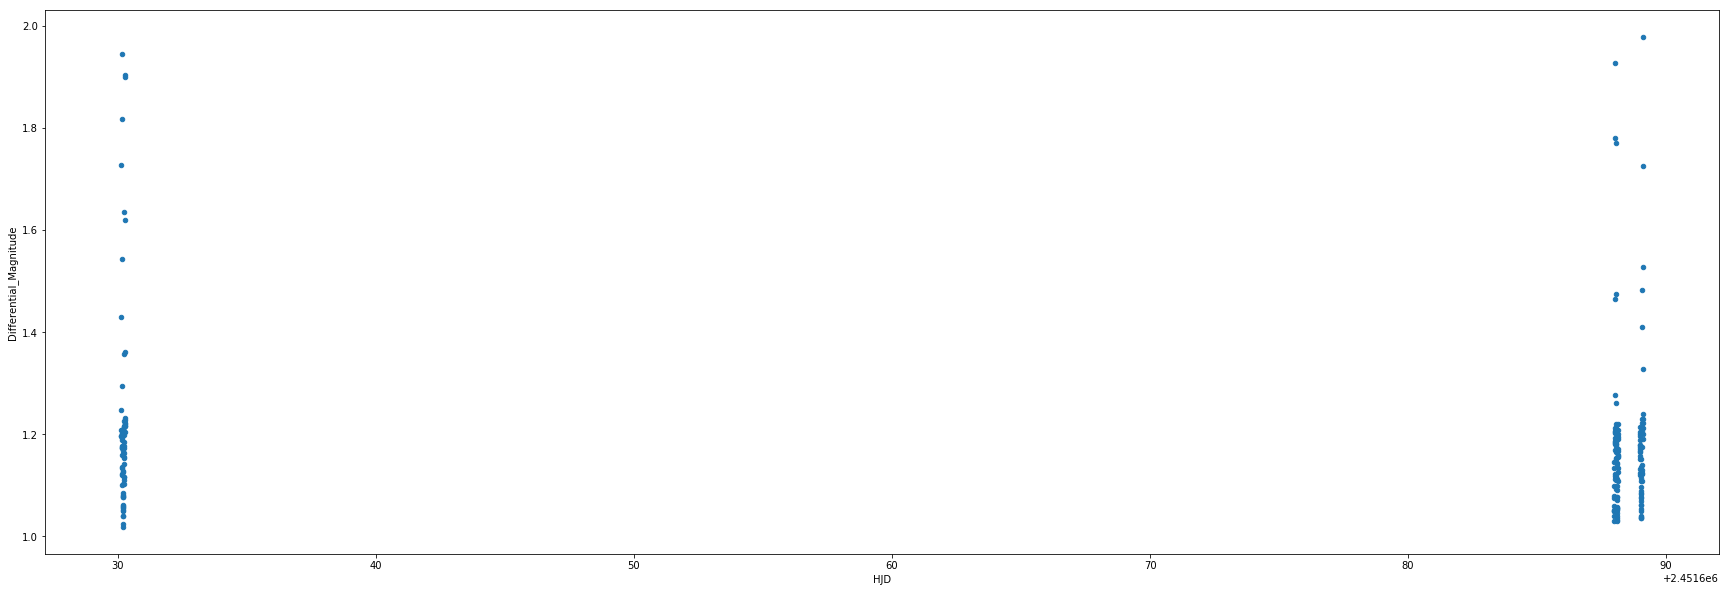

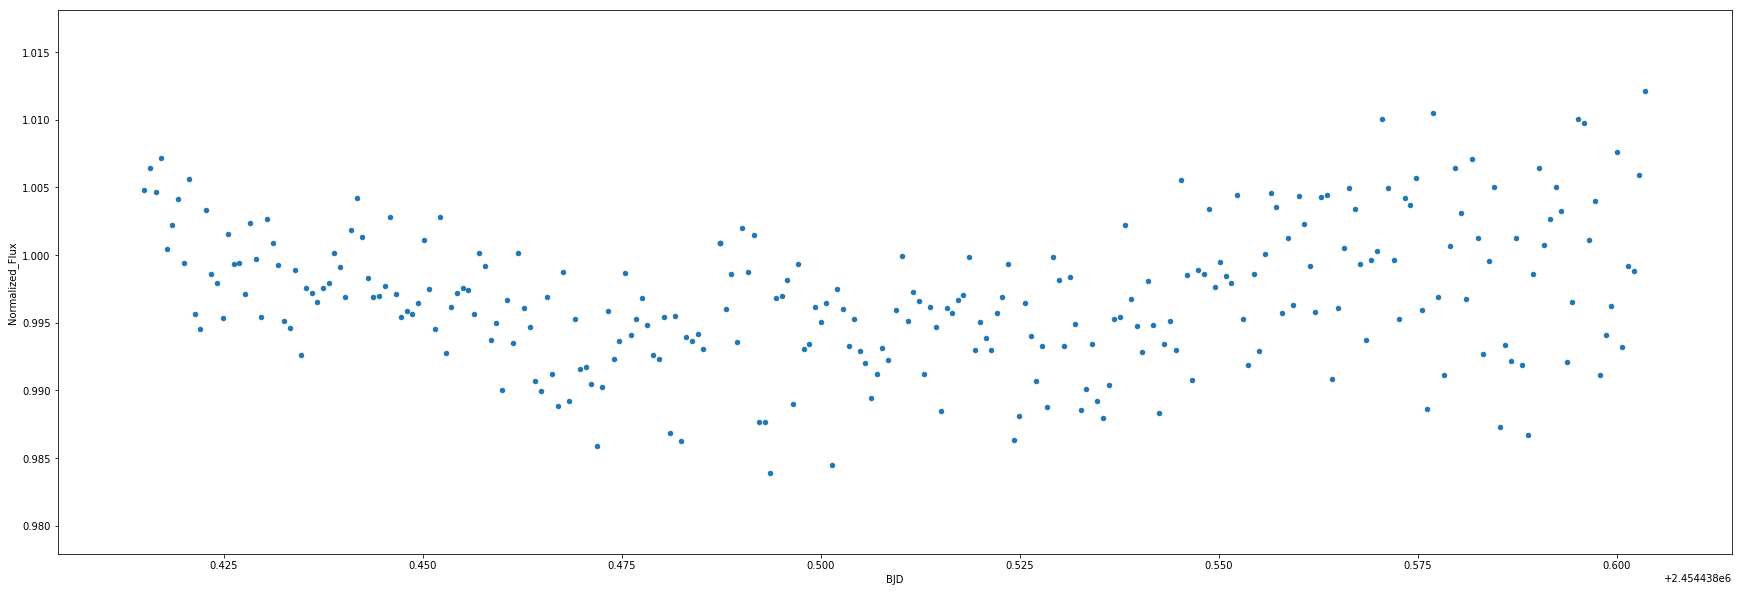

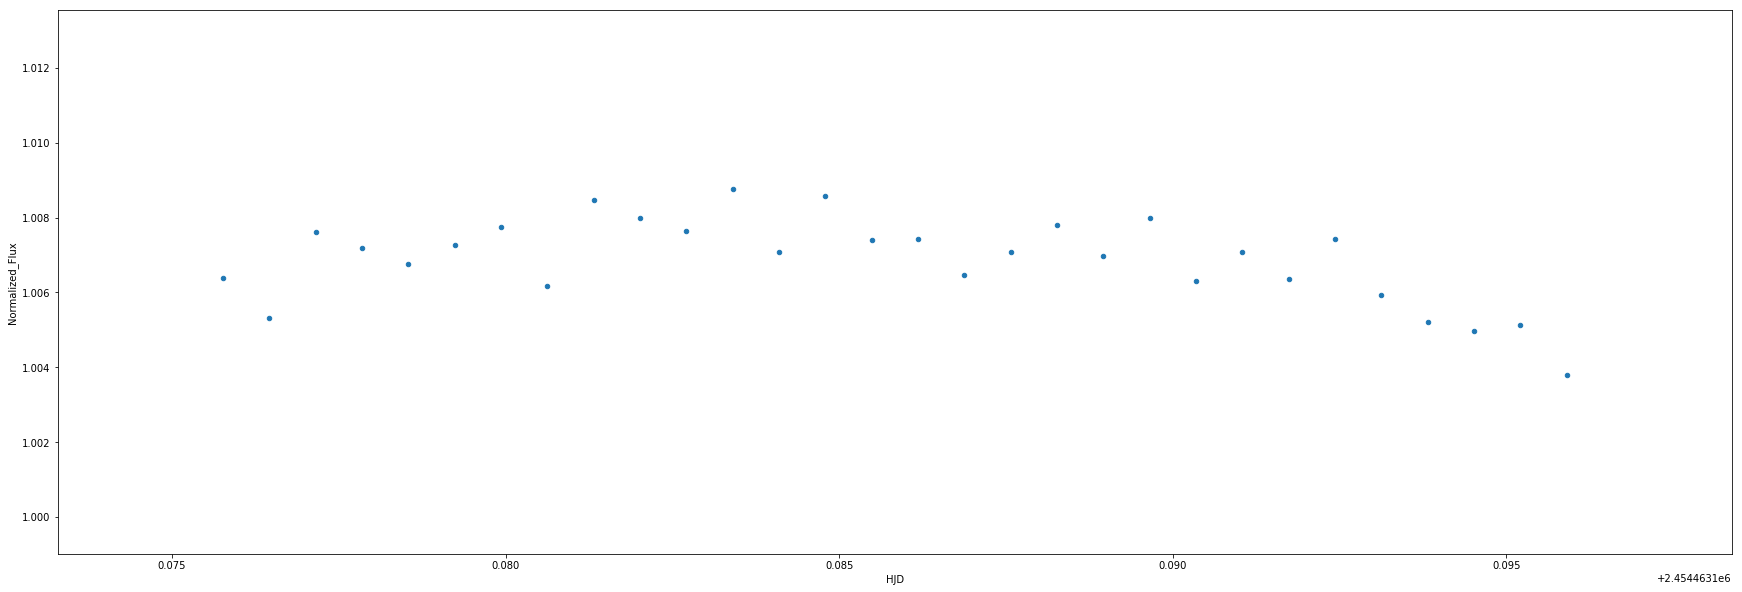

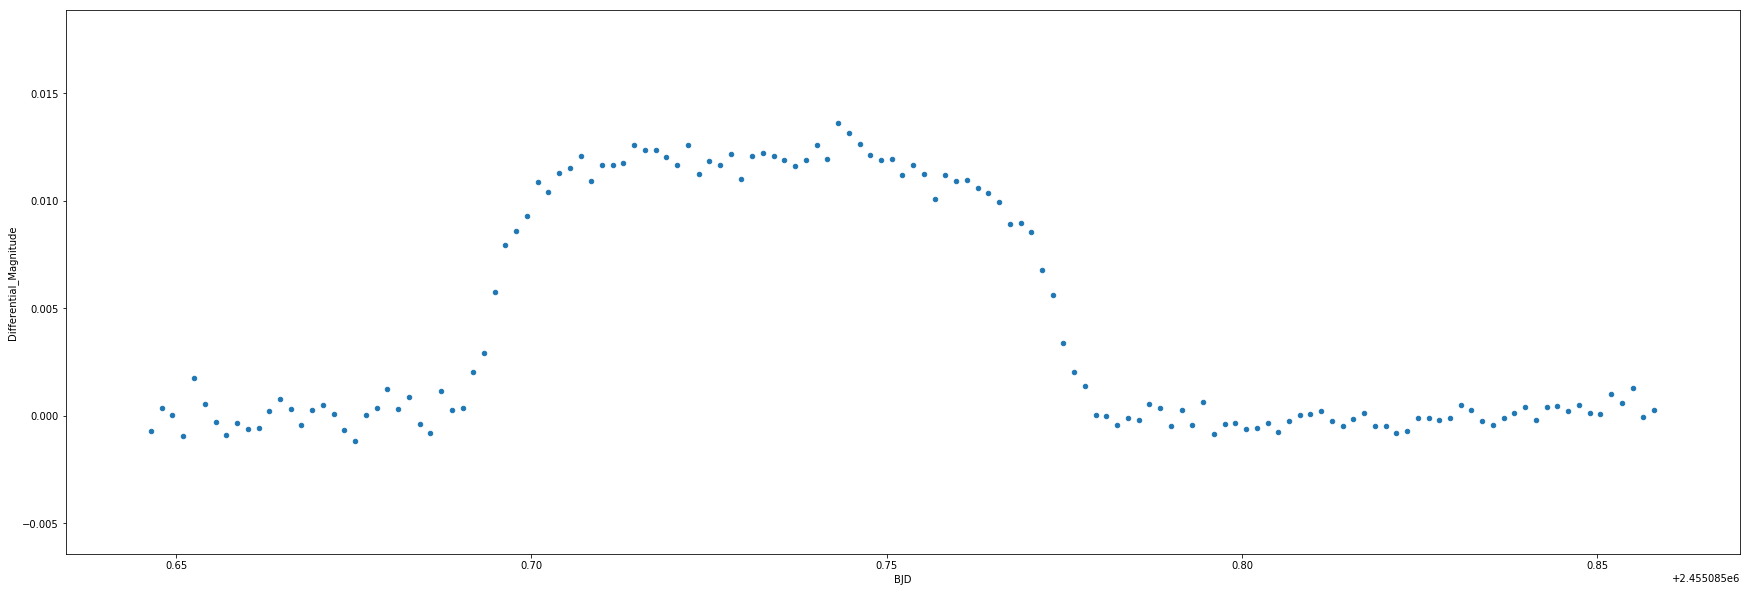

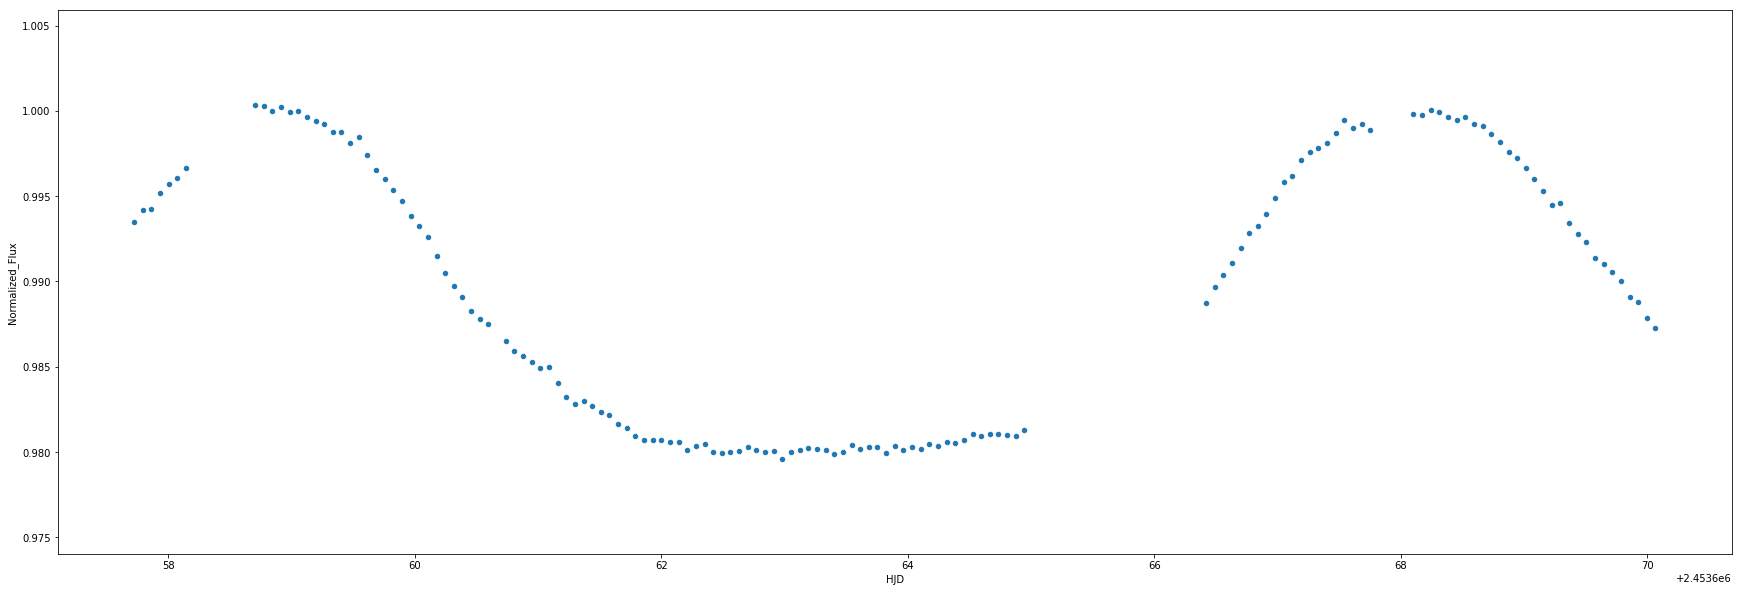

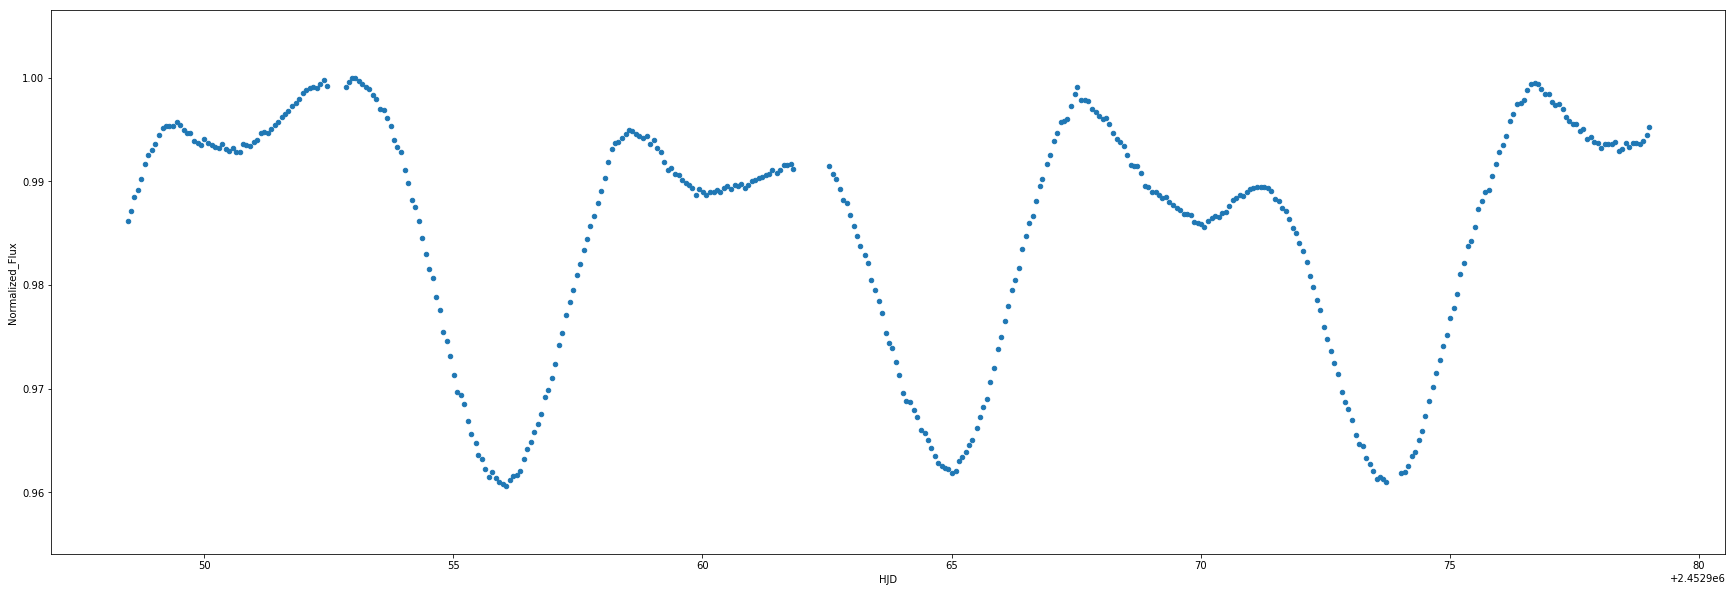

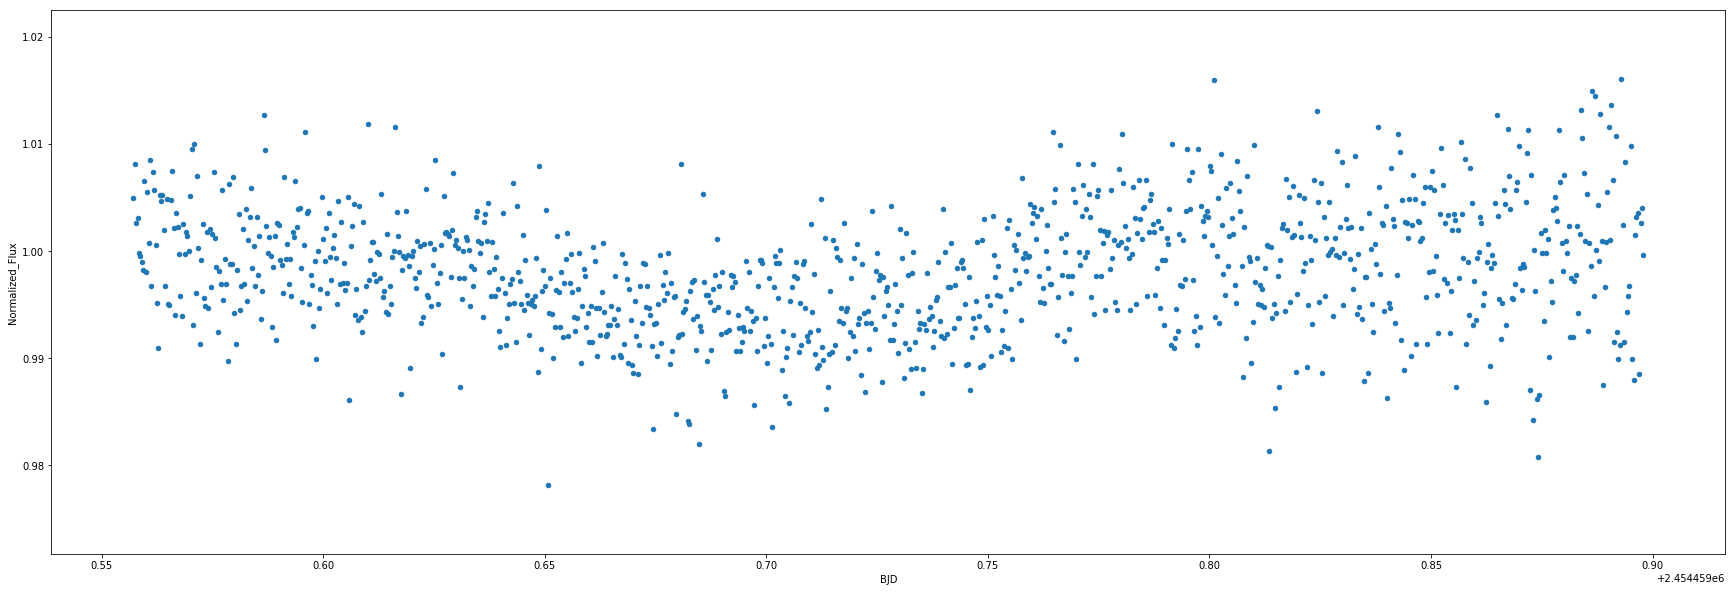

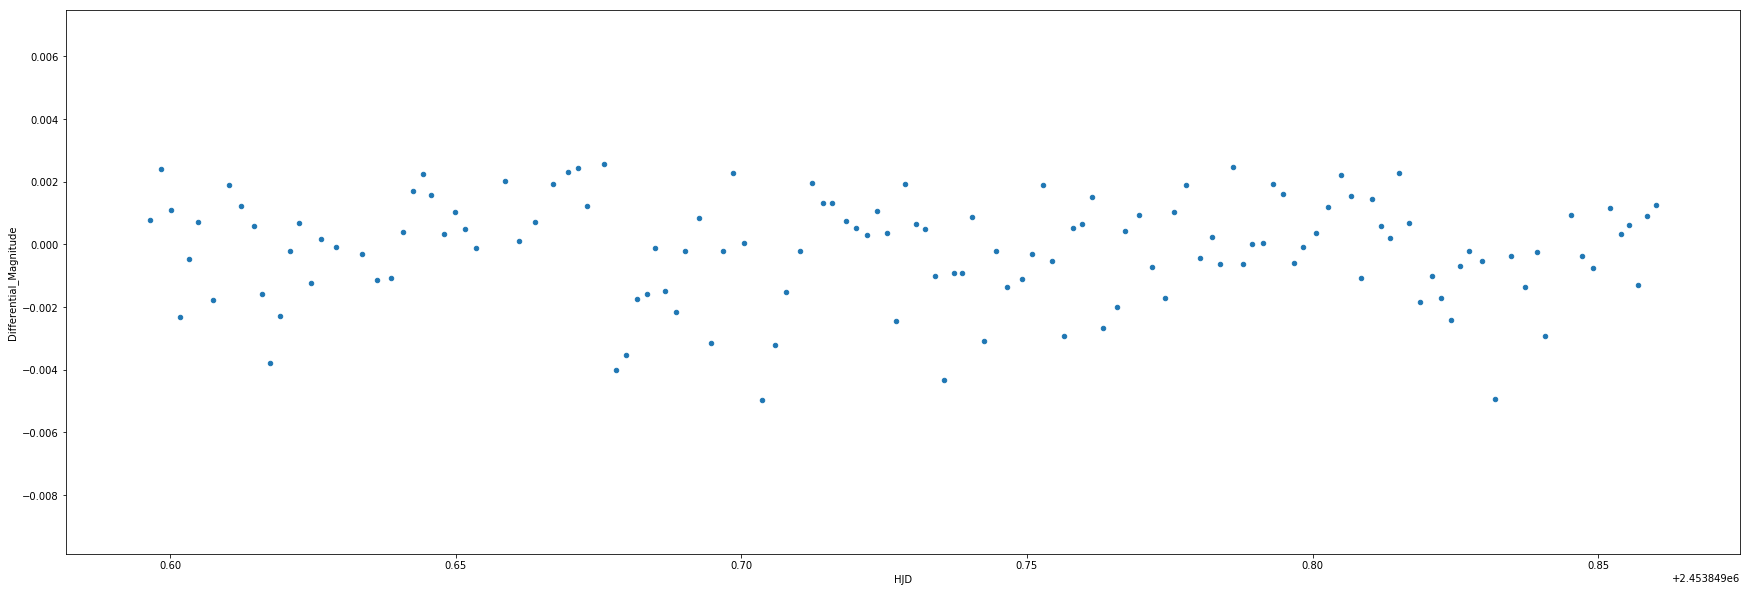

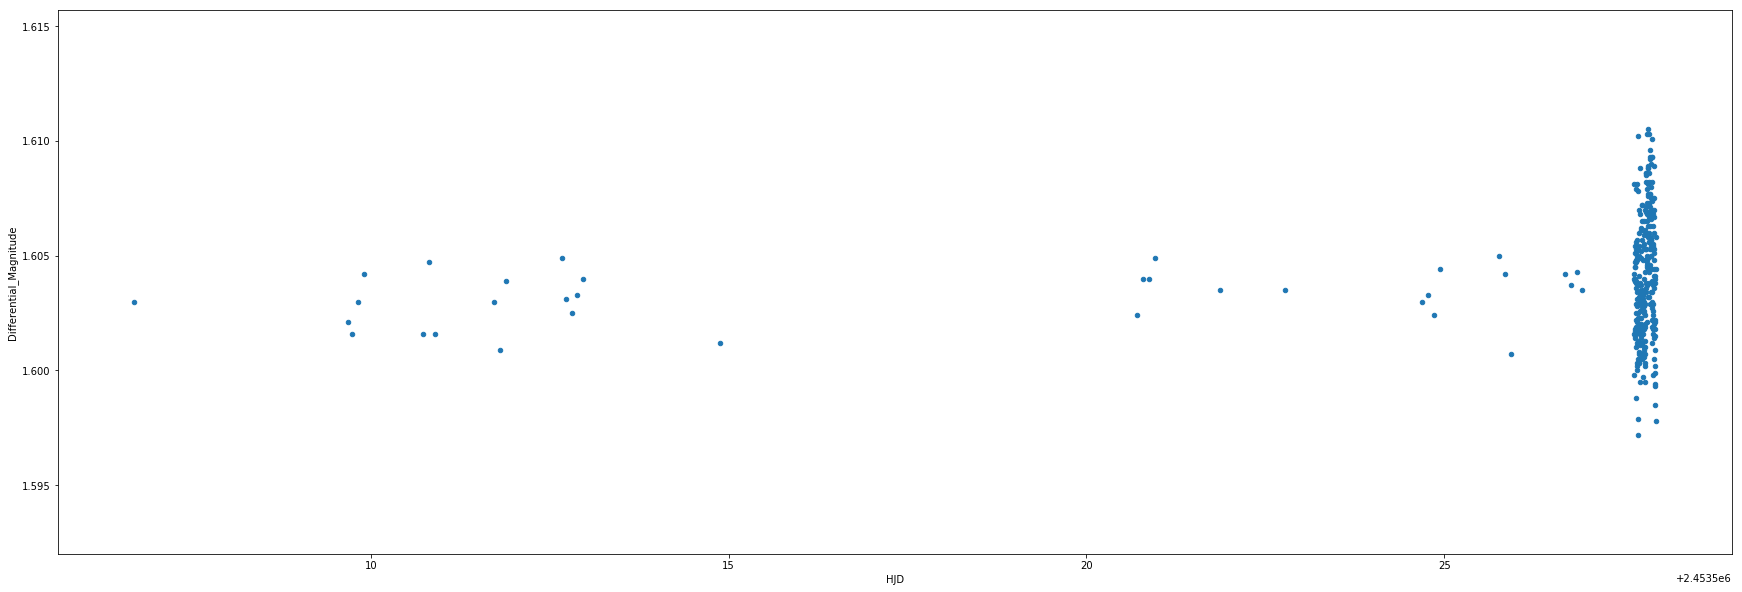

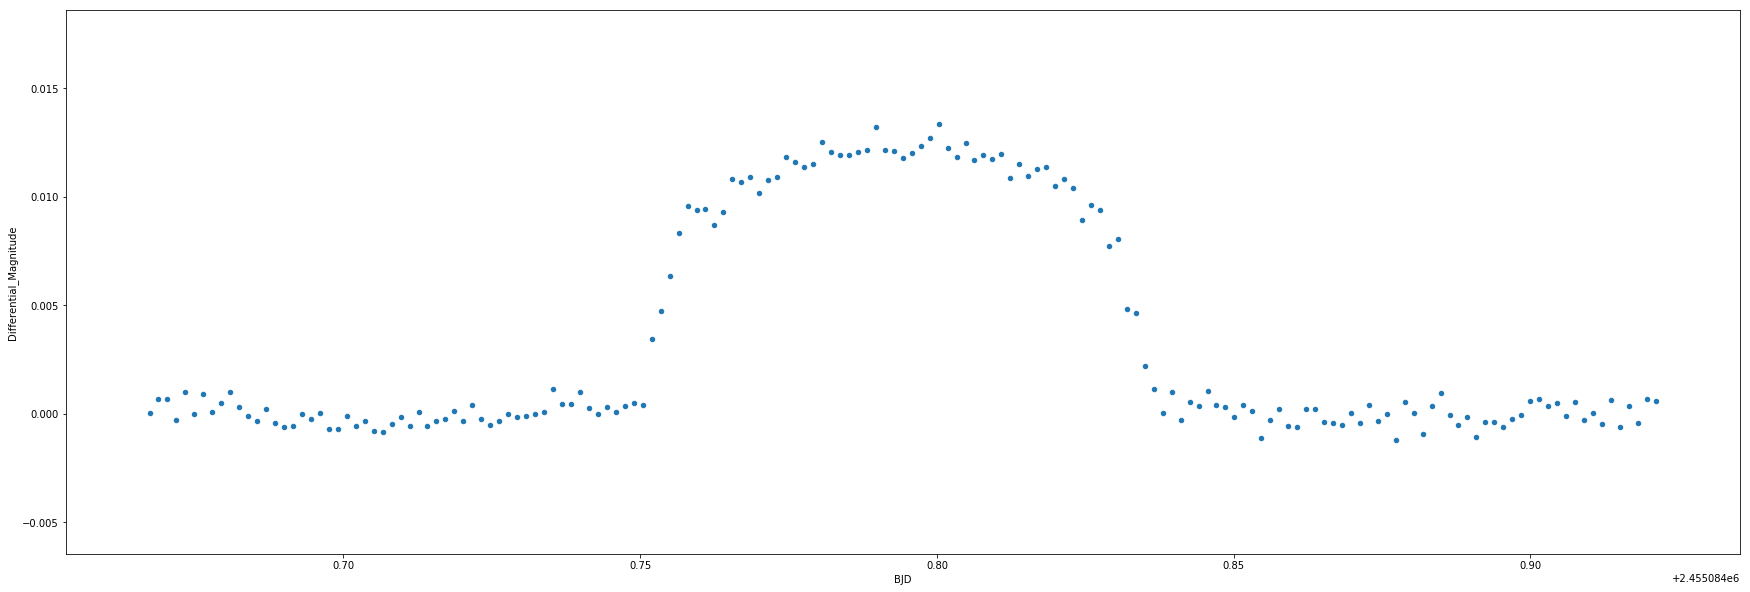

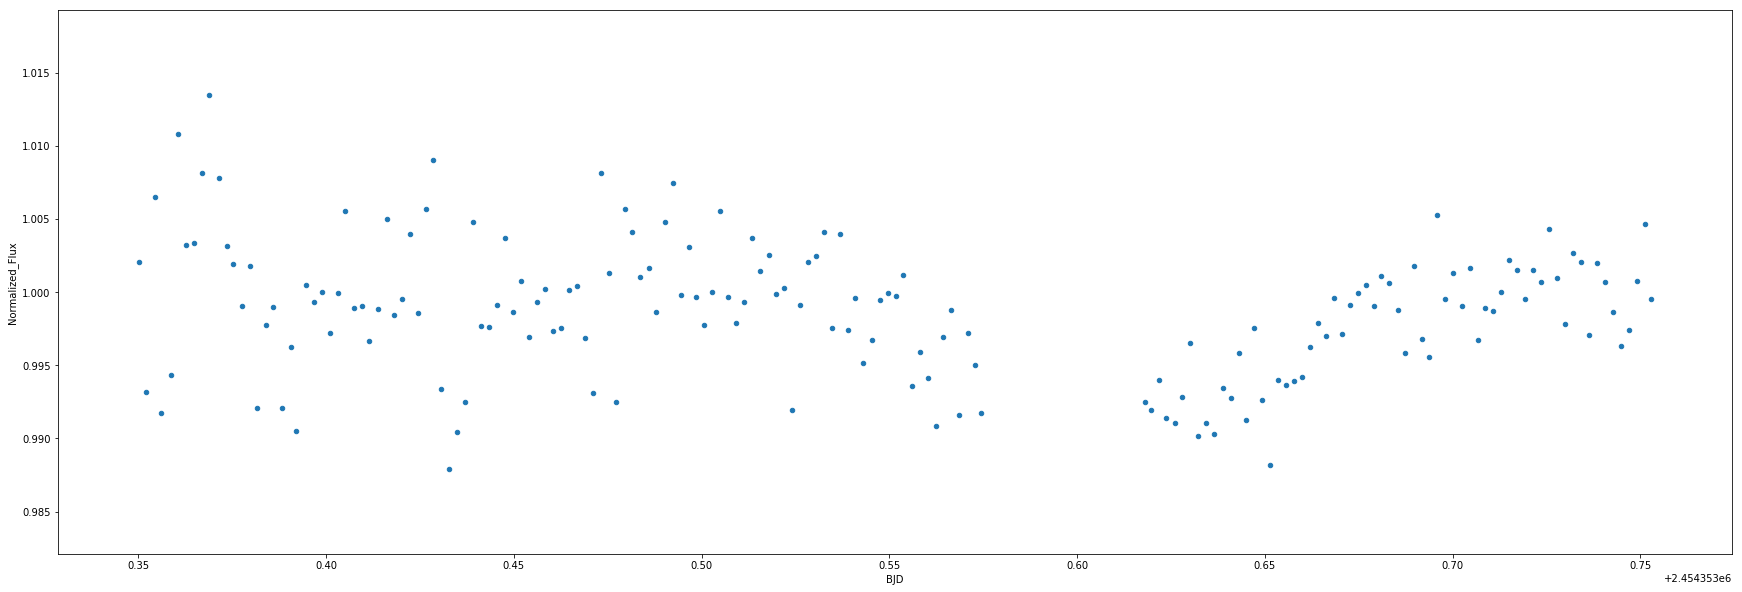

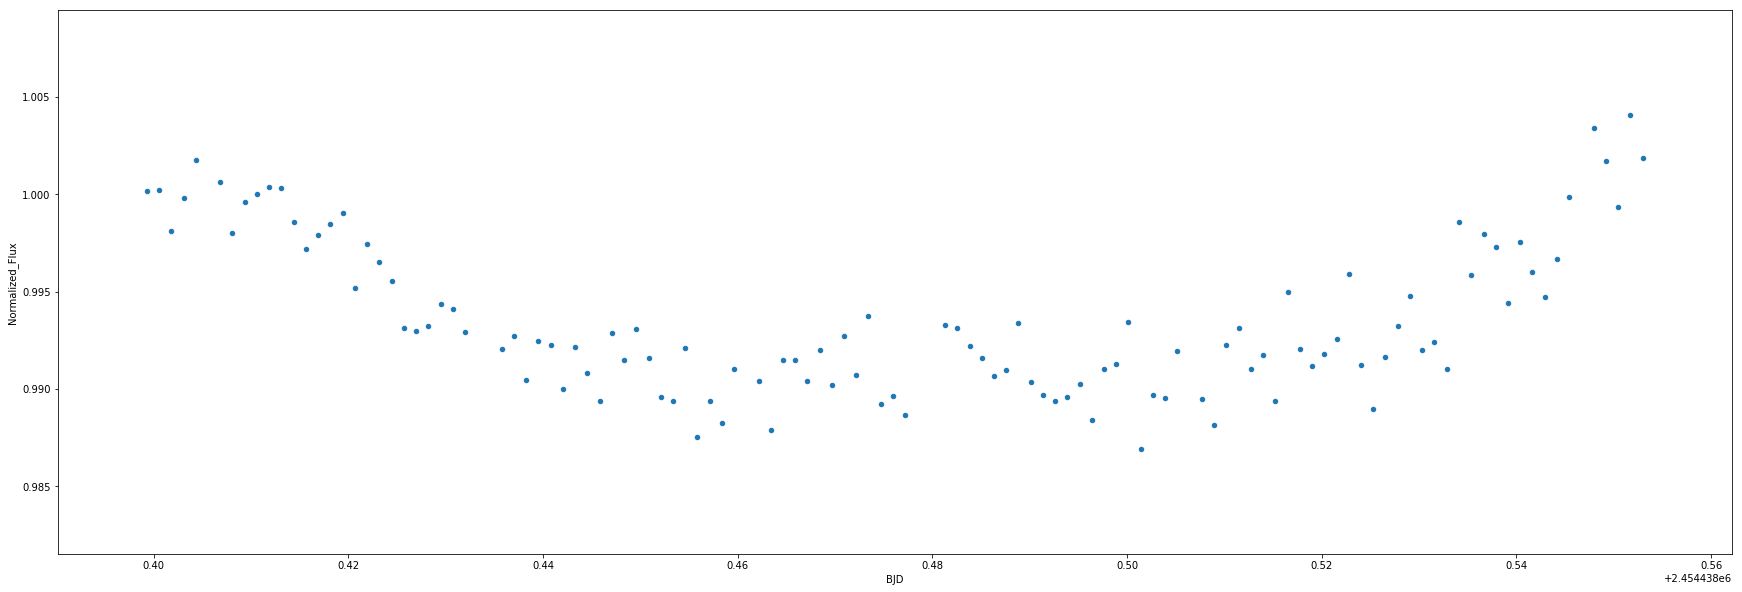

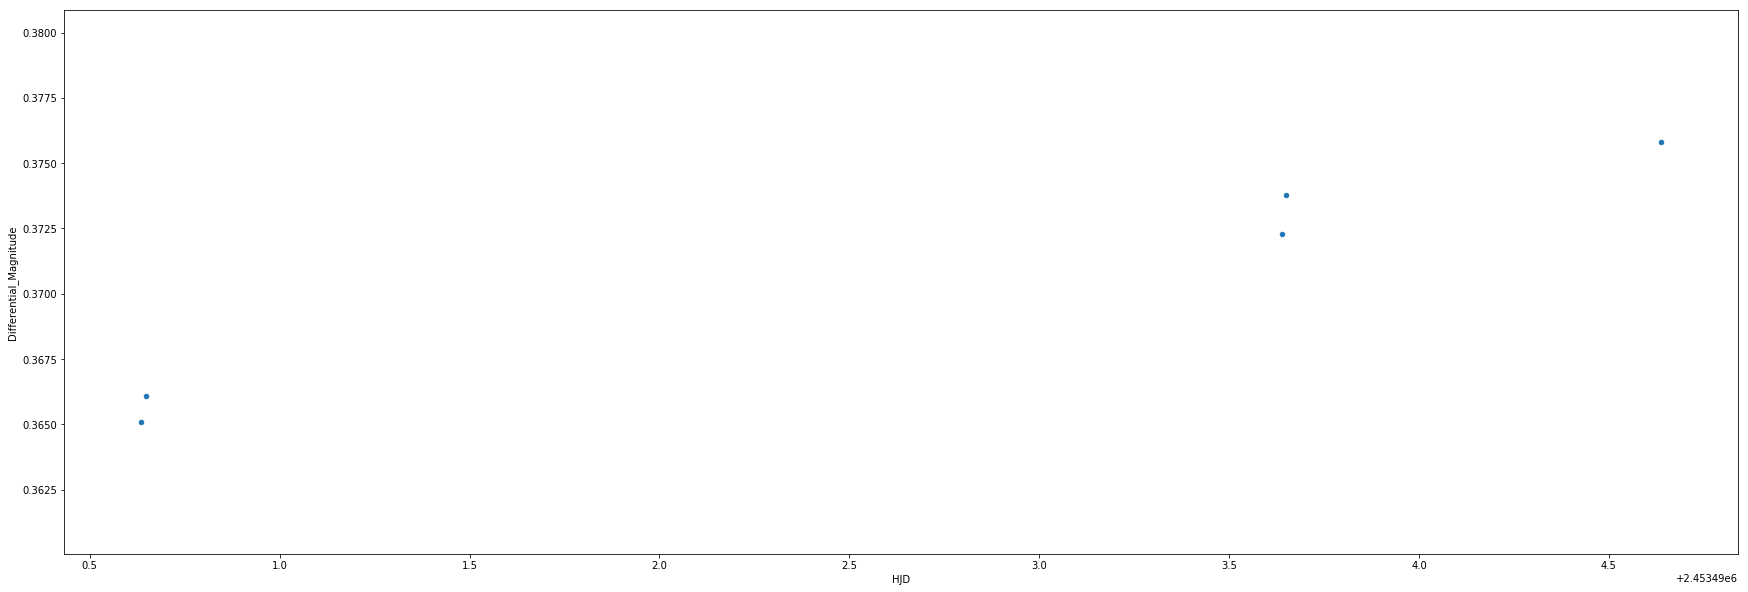

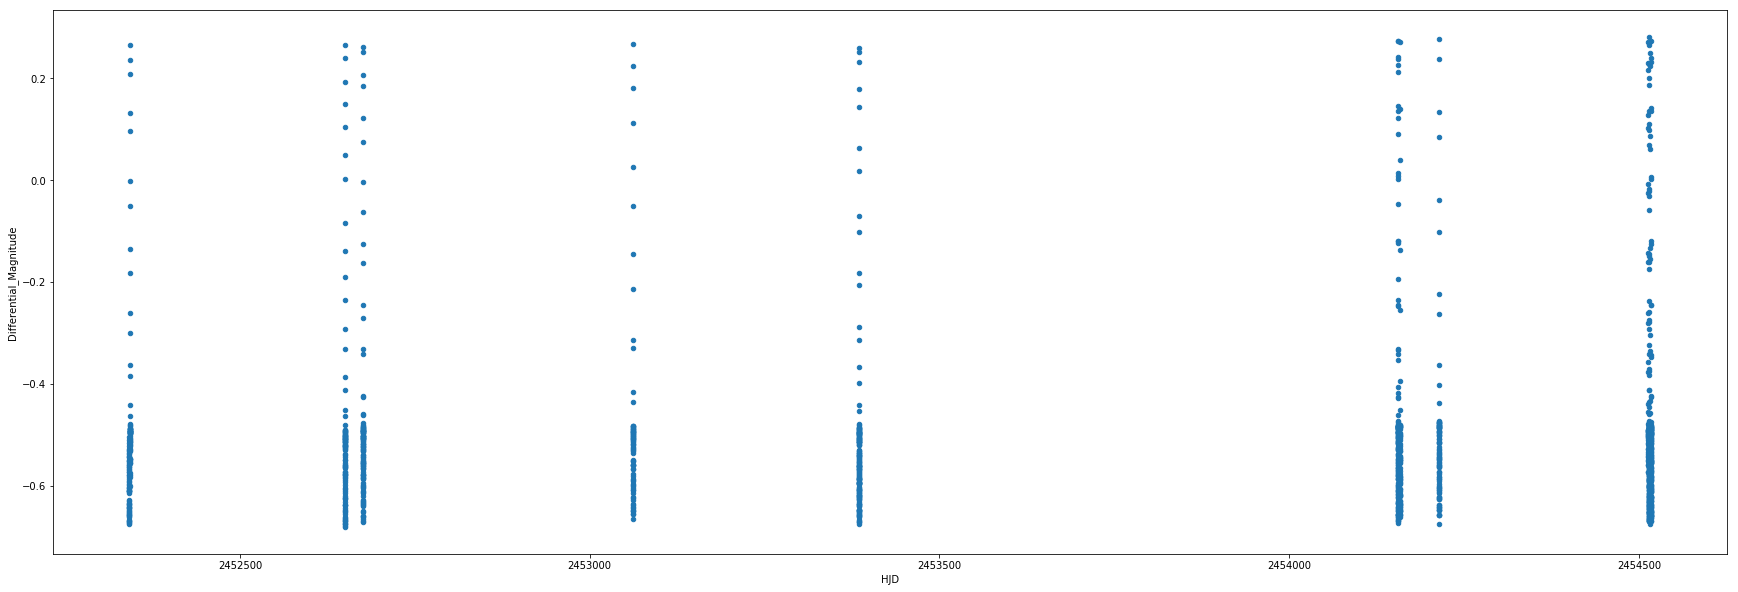

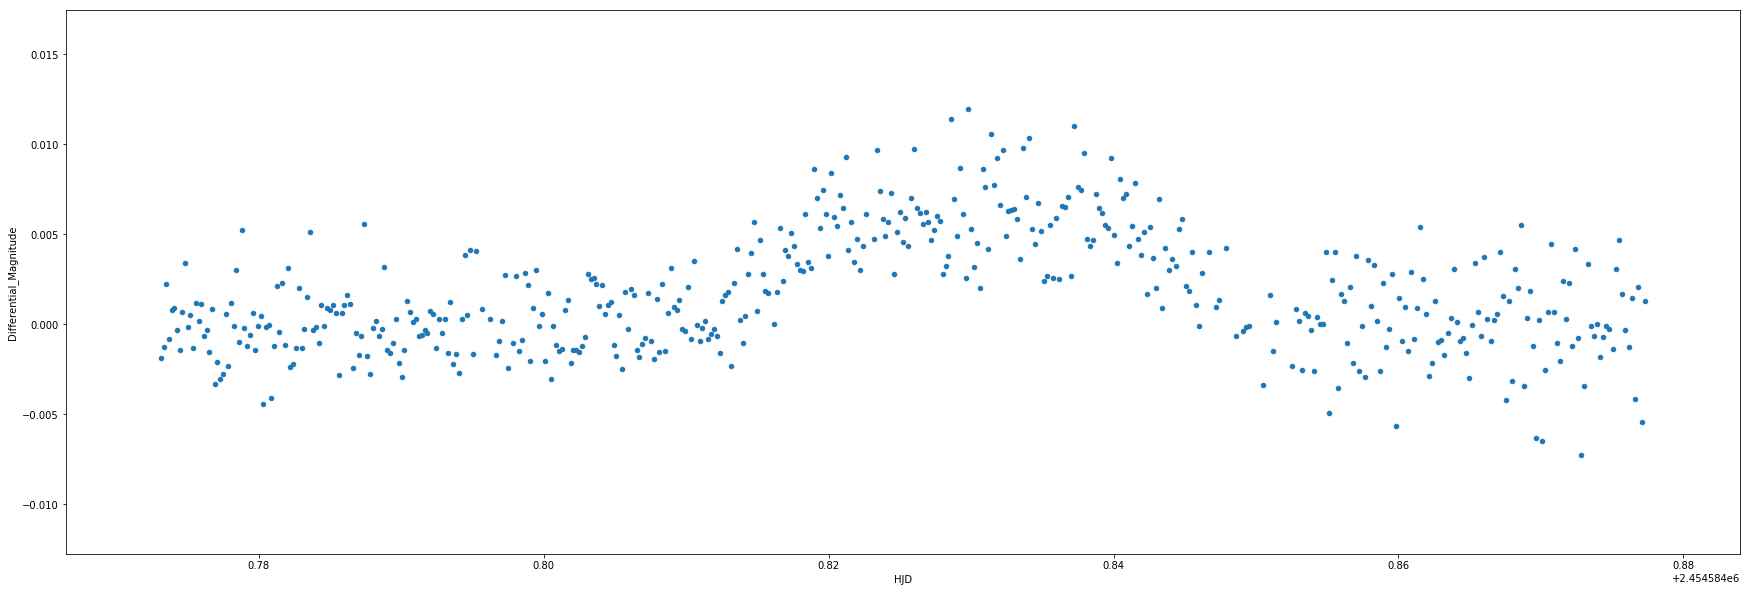

In [113]:
#PLOT EVERYTHINGGGGGGGGGGGGG
from astropy.io import ascii
path_list = generate_path_list('./PHOTOMETRIC/','tbl')
for tbl in path_list:
    dat = ascii.read(tbl)  
    df = dat.to_pandas()
    if 'BJD' in df.columns:
        if 'Differential_Magnitude' in df.columns:
            df.plot.scatter(x='BJD',y='Differential_Magnitude',figsize=(30,10))
            plt.show()
        elif 'Normalized_Flux' in df.columns:
            df.plot.scatter(x='BJD',y='Normalized_Flux',figsize=(30,10))
            plt.show()
    elif 'HJD' in df.columns:
        if 'Differential_Magnitude' in df.columns:
            df.plot.scatter(x='HJD',y='Differential_Magnitude',figsize=(30,10))
            plt.show()
        elif 'Normalized_Flux' in df.columns:
            df.plot.scatter(x='HJD',y='Normalized_Flux',figsize=(30,10))
            plt.show()
            
        
    

In [123]:
dat = ascii.read(path_list[8])  
df = dat.to_pandas()
df.head()

BJD  Normalized_Flux  Accepted
0  2.454438e+06         0.995022         1
1  2.454438e+06         0.997446         1
2  2.454438e+06         1.004681         1
3  2.454438e+06         0.999163         1
4  2.454438e+06         1.009414         1

In [19]:
from astropy.time import TimeDelta, Time

path_list = generate_path_list('./PHOTOMETRIC/','tbl')
file_sample_rate = []
for tbl in path_list:
    dat = ascii.read(tbl)  
    df = dat.to_pandas()
    if 'BJD' in df.columns:
        time = df["BJD"].values #barycentric??

        sample_rate = [ TimeDelta(time[i+1] -time[i], format='jd', scale='tai') for i in range(time.shape[0]-1) if not np.isnan(time[i+1] -time[i]) ]
        sample_rate = [value.sec/60 for value in sample_rate] #in minutes
        file_sample_rate.append(np.median(sample_rate))

        print("Start measurment: ",Time(time[0], format='jd', scale='tai').iso)
        print("End measurment: ",Time(time[-1], format='jd', scale='tai').iso)
print("sample rate (in min): ", np.median(file_sample_rate))
file_sample_rate

Se encontraron 92 tbl
Start measurment:  2007-12-03 21:34:59.952
End measurment:  2007-12-04 01:16:16.954
Start measurment:  2008-10-17 02:13:26.774
End measurment:  2008-10-17 08:40:13.987
Start measurment:  2007-12-03 17:33:54.691
End measurment:  2007-12-04 04:14:54.701
Start measurment:  2007-05-09 23:31:00.077
End measurment:  2007-05-10 03:09:54.173
Start measurment:  2009-09-11 03:30:59.069
End measurment:  2009-09-11 08:35:33.187
Start measurment:  2006-09-03 01:20:51.360
End measurment:  2006-10-19 23:52:58.368
Start measurment:  2009-09-08 06:47:35.174
End measurment:  2009-09-08 10:11:20.342
Start measurment:  2007-09-09 20:24:12.701
End measurment:  2007-09-10 06:03:56.045
Start measurment:  2009-09-12 04:12:59.875
End measurment:  2009-09-12 07:18:01.930
Start measurment:  2007-04-02 19:56:24.144
End measurment:  2007-04-18 22:23:10.896
Start measurment:  2009-09-10 04:01:01.114
End measurment:  2009-09-10 10:06:26.323
Start measurment:  2007-09-09 22:40:17.328
End measurm

[1.8107998743653297,
 0.43199993669986725,
 0.8049604296684265,
 2.210400402545929,
 2.1830398589372635,
 1445.0975999236107,
 2.2161604464054108,
 3.03119994699955,
 2.1830398589372635,
 1.799999624490738,
 2.1830398589372635,
 3.0009593814611435,
 2.1830398589372635,
 1.1001603305339813,
 0.8064001053571701,
 0.5500801652669907,
 1.6502398252487183,
 0.6984002888202667,
 3.134160228073597,
 2.062583863735199,
 1.3248000293970108,
 0.6335994601249695,
 0.49823977053165436,
 1.2844797223806381,
 2.20320001244545,
 0.3888002783060074,
 1.008000299334526,
 0.38447991013526917,
 0.4464000463485718,
 0.721440464258194,
 1.5264002233743668]

# HatNet

In [19]:
HatNet = generate_path_list('./HatNet_play_ground/all-discovery-hatlcs/','gz')

Se encontraron 60 gz


In [27]:
lcd = hatlc.read_csvlc(HatNet[1])

[I 190607 21:09:12 hatlc:1408] reading gzipped HATLC: ./HatNet_play_ground/all-discovery-hatlcs\HAT-P-11b-hatlc.csv.gz


In [9]:
hatlc.describe(lcd)

OBJECT
------

objectid = HAT-213-0001697
hatid = HAT-213-0001697; twomassid = 03092855+3040249
network = HN; stations = HN10; ndet = 3009

ra = 47.368964; decl = 30.673594
pmra = -3.1; pmra_err = 0.9
pmdecl = -40.2; pmdecl_err = 0.7

jmag = 10.015; hmag = 9.56; kmag = 9.421; bmag = 12.834; vmag = 11.871
sdssg = 12.361; sdssr = 11.532; sdssi = 11.219

METADATA
--------

datarelease = 0; lcversion = 0
lastupdated = 1519844503.944; lcserver = be56624
comment = initial HN lightcurve creation
lcbestaperture = {"ap": ["002"], "ism": ["002"]}
lcsortcol = rjd
lcfiltersql = 
lcnormcols = 

CAMFILTERS
----------

11 - I - Bessel I (Omega Optical)

PHOTAPERTURES
-------------

000 - 1.45 px
001 - 1.95 px
002 - 2.35 px

LIGHT CURVE COLUMNS
-------------------

000 - rjd - time of observation in Reduced Julian date (JD = 2400000.0 + RJD)
001 - bjd - time of observation in Baryocentric Julian date (note: this is BJD_TDB)
002 - net - network of telescopes observing this target
003 - stf - station ID

In [28]:
normlcd = hatlc.normalize_lcdict(lcd)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [29]:
times, mags, errs = normlcd['rjd'], normlcd['aep_000'], normlcd['aie_000']

In [30]:
glsp = periodbase.pgen_lsp(times,mags,errs)

[I 190607 21:09:24 zgls:622] using autofreq with 109453 frequency points, start P = 0.100, end P = 2189.158
[I 190607 21:09:24 zgls:629] using 4 workers...


In [32]:
cp = checkplot.checkplot_png(glsp, times, mags, errs, objectinfo=normlcd['objectinfo'])

[I 190607 21:11:40 png:200] adding in object information and finder chart for HAT-155-0000484 at RA: 297.709, DEC: 48.081
[I 190607 21:11:40 plotbase:988] fetched stamp successfully for (297.709, 48.081)
[I 190607 21:11:40 nonphysical:219] spline fit done. nknots = 30,  chisq = 292658.34002, reduced chisq = 14.37771
[I 190607 21:11:40 png:625] plotting phased LC with period 16.660257, epoch 55312.92921
[I 190607 21:11:42 nonphysical:219] spline fit done. nknots = 30,  chisq = 297189.76368, reduced chisq = 14.60033
[I 190607 21:11:42 png:625] plotting phased LC with period 8.330129, epoch 55128.68476
[I 190607 21:11:43 nonphysical:219] spline fit done. nknots = 30,  chisq = 293695.62292, reduced chisq = 14.42867
[I 190607 21:11:43 png:625] plotting phased LC with period 33.320514, epoch 53547.02483
[I 190607 21:11:45 nonphysical:219] spline fit done. nknots = 30,  chisq = 295868.03749, reduced chisq = 14.53540
[I 190607 21:11:45 png:625] plotting phased LC with period 0.940360, epoch 53

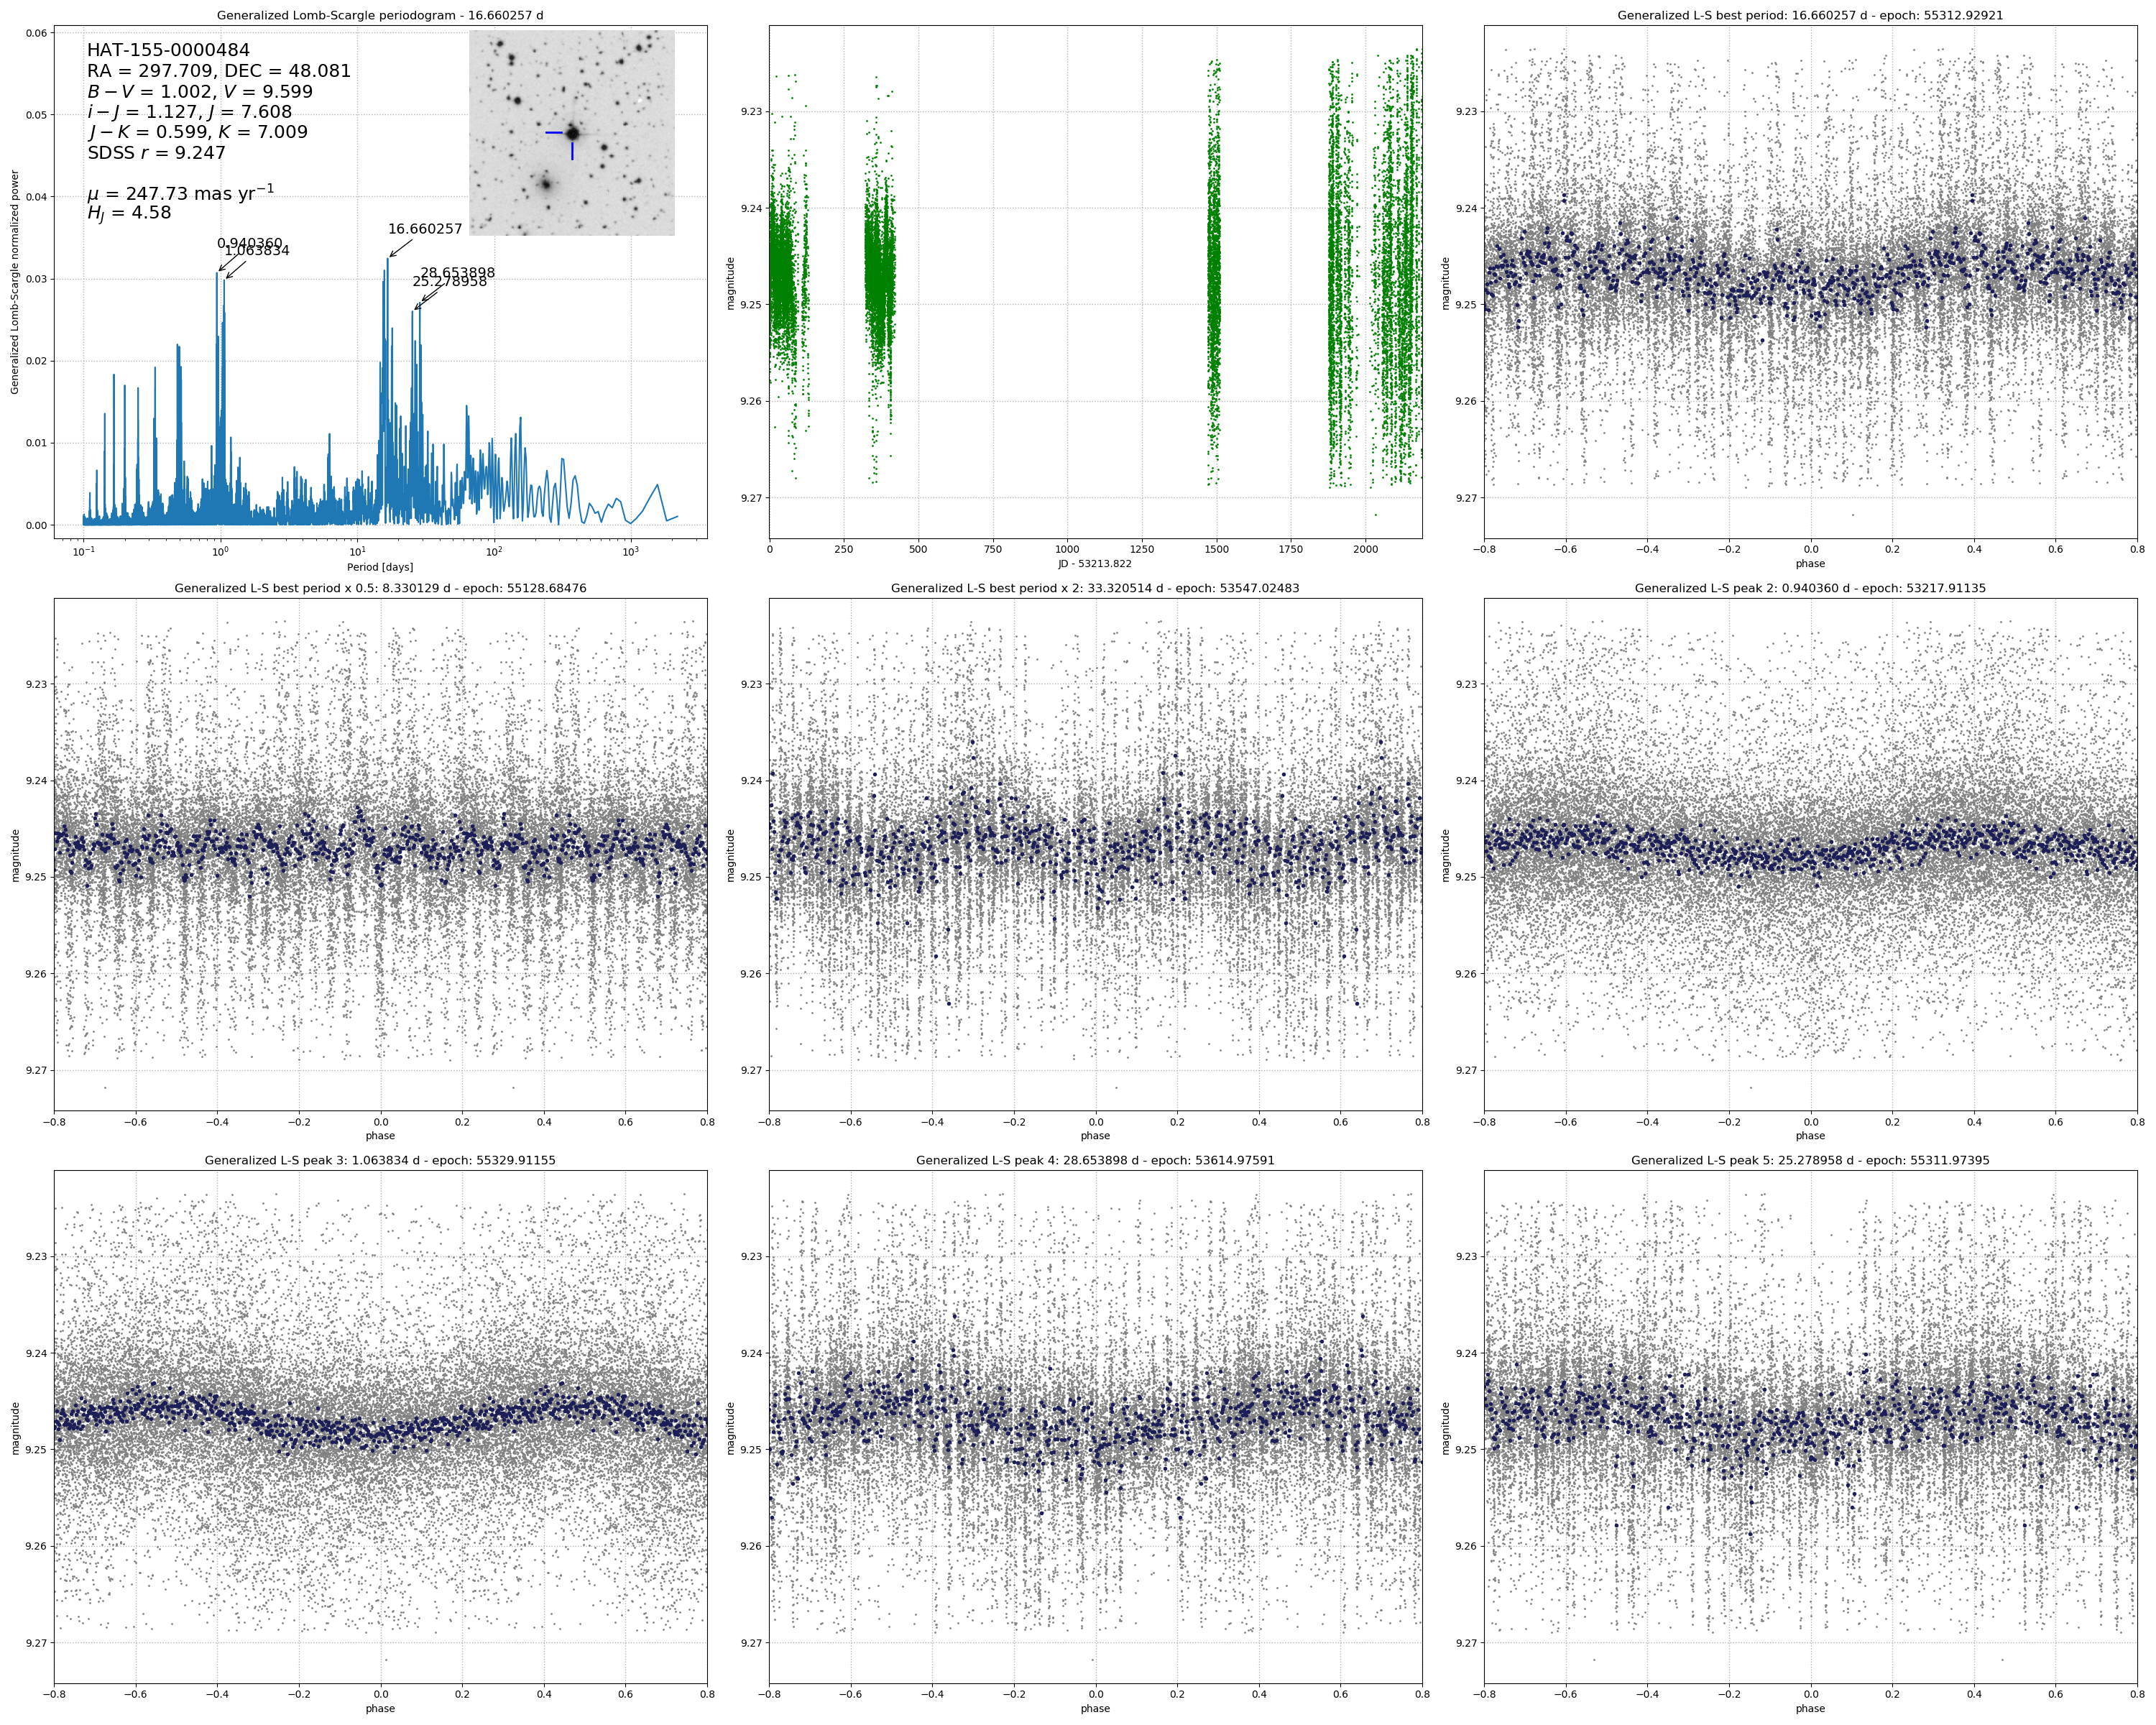

In [33]:
#Plot muy bonito pero no entiendo como demonios paso de la imagen fea verde a la imagen bonita gris
from IPython.display import Image
Image('checkplot.png')